### **Dataset Load and Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import tensorflow_hub as hub
import librosa
import builtins
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Conv1D, Activation, MaxPooling1D, BatchNormalization, Dropout, Flatten, Dense
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
import os

root_folder = '/content/drive/MyDrive/Dataset/B-SER dataset'
folders = [f"Actor {i:02d}" for i in range(1, 35)]

paths = []
labels = []

for folder in folders:
    folder_path = os.path.join(root_folder, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            paths.append(os.path.join(folder_path, filename))
            label = filename.split('-')[2]
            labels.append(label)

print("Dataset is Loaded")

Dataset is Loaded


In [ ]:
emotions=['angry', 'happy', 'sad', 'surprise']

### **Preprocessing the data**

In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
from scipy.io.wavfile import write

def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

root_folder = '/content/drive/MyDrive/Dataset/B-SER dataset'
folders = [f"Actor {i:02d}" for i in range(1, 35)]

cleaned_data_dir = '/content/cleaned_data'

os.makedirs(cleaned_data_dir, exist_ok=True)

threshold_value = 0.005

for folder in folders:
    folder_path = os.path.join(root_folder, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):

            filepath = os.path.join(folder_path, filename)
            y, sr = librosa.load(filepath, sr=None)

            mask = envelope(y, sr, threshold_value)
            cleaned_audio = y[mask]

            cleaned_filepath = os.path.join(cleaned_data_dir, f"cleaned_{folder}_{filename}")
            write(cleaned_filepath, sr, cleaned_audio)

print("Preprocessing completed.")

Preprocessing completed.


###**Data Visualization**

#### **Before Preprocessing**

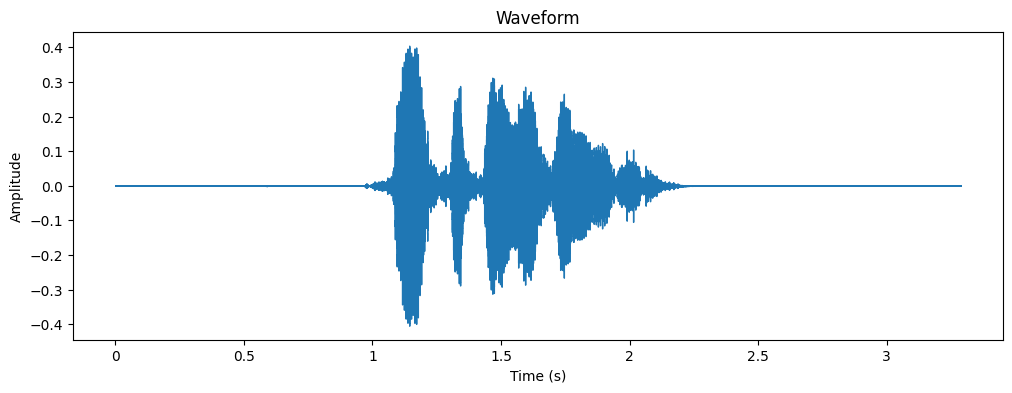

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = '/content/drive/MyDrive/Dataset/B-SER dataset/Actor 01/03-01-01-01-01-01-01.wav'
y, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### **After Preprocessing**

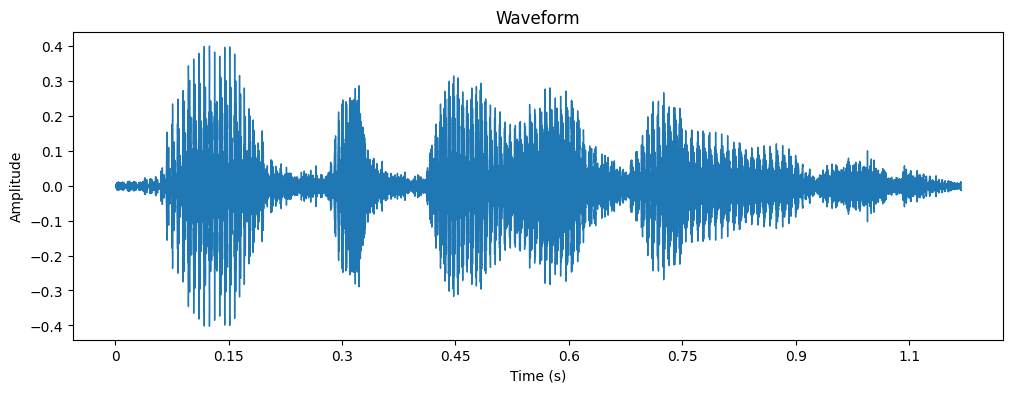

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = '/content/cleaned_data/cleaned_Actor 01_03-01-01-01-01-01-01.wav'
y, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

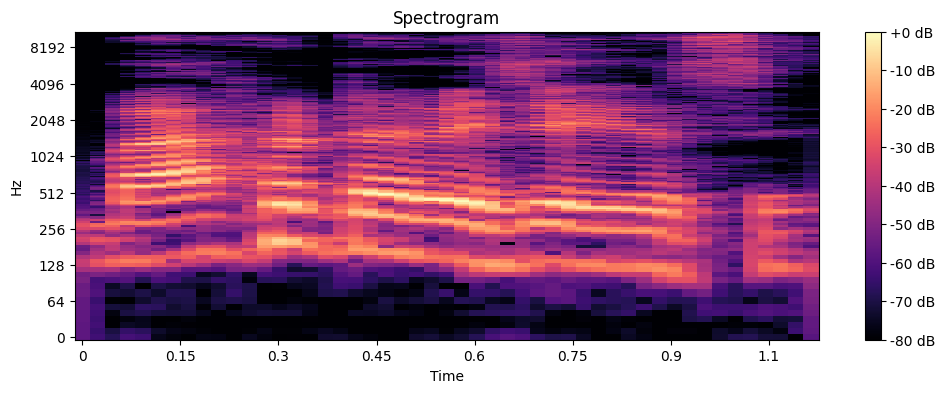

In [ ]:
# Plot the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

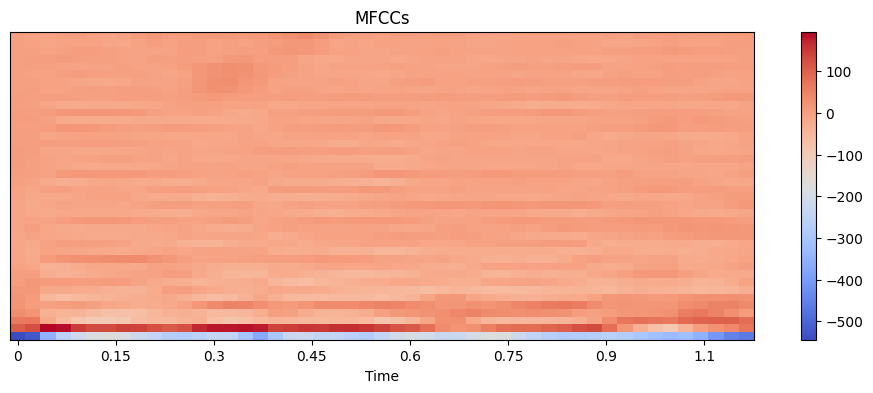

In [ ]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Display the MFCCs as a bar plot
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()

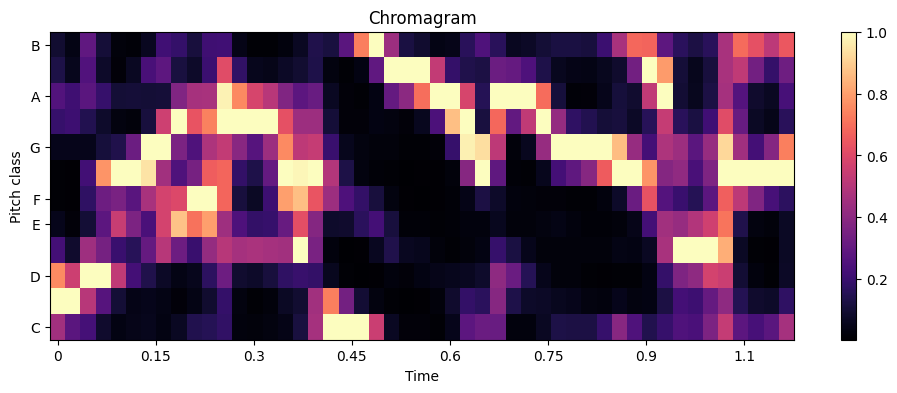

In [ ]:
# Compute chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Display the chromagram
plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()

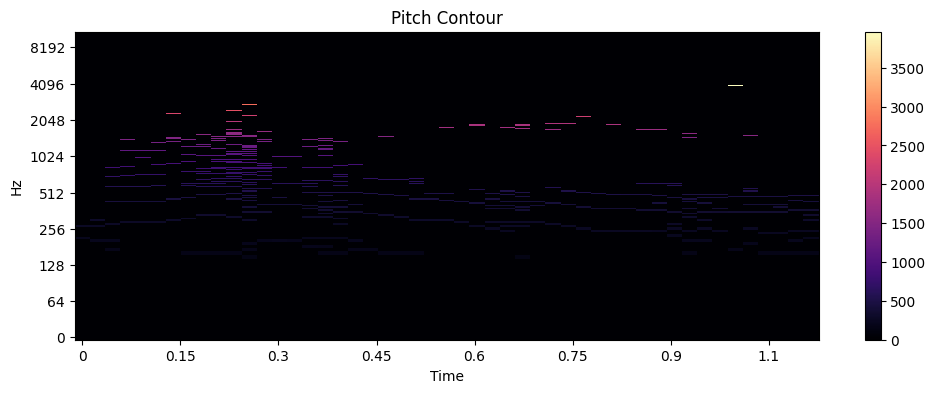

In [ ]:
# Compute pitch
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

# Display pitch contour
plt.figure(figsize=(12, 4))
librosa.display.specshow(pitches, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Pitch Contour')
plt.show()

In [ ]:
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

speech label
0  /content/drive/MyDrive/Dataset/B-SER dataset/A...    04
1  /content/drive/MyDrive/Dataset/B-SER dataset/A...    04
2  /content/drive/MyDrive/Dataset/B-SER dataset/A...    04
3  /content/drive/MyDrive/Dataset/B-SER dataset/A...    04
4  /content/drive/MyDrive/Dataset/B-SER dataset/A...    04

In [ ]:
csv_file_path = "/content/drive/MyDrive/Dataset/Bangla-SER.csv"
df.to_csv(csv_file_path, index=False)
print("Data saved to:", csv_file_path)

Data saved to: /content/drive/MyDrive/Dataset/Bangla-SER.csv


In [ ]:
df['label'].value_counts()

04    306
03    306
02    306
01    306
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

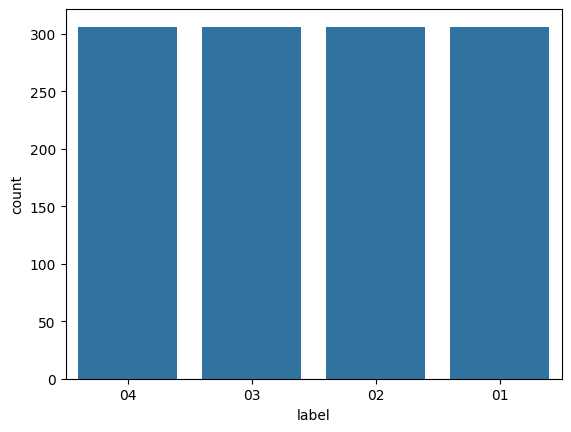

In [ ]:
sns.countplot(x= df['label'])

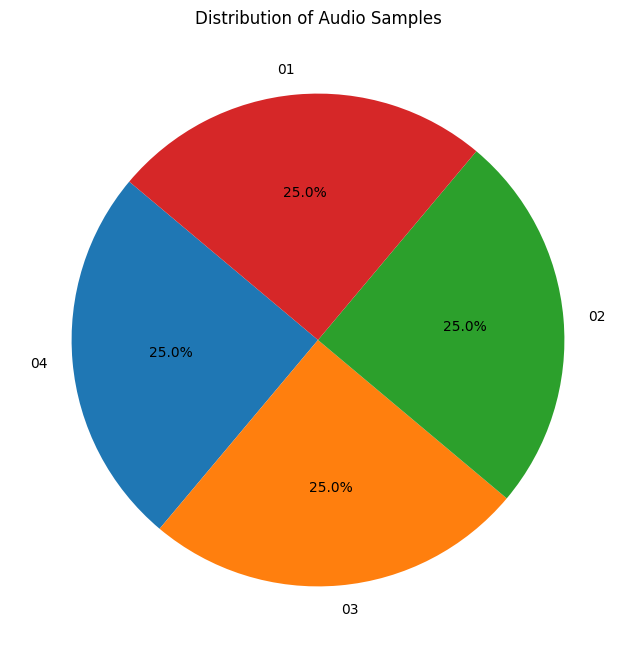

In [ ]:
# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Audio Samples')
plt.show()

### **Performance Measure Declaration**

In [ ]:
def curve():
   plt.figure(figsize=(10, 4))
   plt.subplot(1, 2, 1)
   plt.plot(history.history['loss'], label='Training Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.legend(loc='upper right')
   plt.title('Training & Validation Loss')


   plt.subplot(1, 2, 2)
   plt.plot(history.history['accuracy'], label='Training Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.legend(loc='lower right')
   plt.title('Training & Validation Accuracy')

   plt.show()

def accuracy_curve():
  h = history
  plt.plot(h.history['accuracy'],label='train accuracy')
  plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
  plt.legend()
  plt.show()

def loss_curve():
    h = history
    plt.plot(h.history['loss'],label = 'train loss')
    plt.plot(h.history['val_loss'],label = 'validation loss')
    plt.legend()
    plt.show()

def performance_measure():
  y_pred = model.predict(X_test)
  y_pred_labels = np.argmax(y_pred, axis=1)
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

def confusion_matrices():
  y_pred = model.predict(X_test)
  y_pred_labels = np.argmax(y_pred, axis=1)
  cm = confusion_matrix(y_test, y_pred_labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap = 'Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

def classification_report_custom():
  y_pred = model.predict(X_test)
  y_pred_labels = np.argmax(y_pred, axis=1)
  report = classification_report(y_test, y_pred_labels,target_names = np.unique(emotions))
  print(report)

def Roc_curve():
  y_pred = model.predict(X_test)
  predictions = np.array(list(map(lambda x: np.round(x), y_pred)))

  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
  predictions_bin = label_binarize(predictions, classes=np.unique(y_test))

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  n_classes = len(np.unique(y_test))
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions_bin[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  plt.figure(figsize=(6, 5))

  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label=f' {emotions[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic for each class')
  plt.legend(loc="lower right")
  plt.show()


def results():
  performance_measure()
  print('\n')
  curve()
  print('\n')
  confusion_matrices()
  print('\n')
  classification_report_custom()
  print('\n')
  Roc_curve()

### **Feature Extraction**

In [ ]:
def extract_mfcc_features_from_file(file_name):

    y, sr = librosa.load(file_name)

    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)

    return list(mfccs)

def extract_emotion_from_filename(filename):
    return filename.split('-')[2]

In [ ]:
cleaned_data_dir = '/content/cleaned_data'

features = []
labels = []

for filename in os.listdir(cleaned_data_dir):
    if filename.endswith(".wav"):

        file_path = os.path.join(cleaned_data_dir, filename)
        mfcc_features = extract_mfcc_features_from_file(file_path)

        emotion_label = extract_emotion_from_filename(filename)

        features.append(mfcc_features)
        labels.append(emotion_label)

print("Feature extraction completed.")

Feature extraction completed.


##**Creating CSV File**

In [ ]:
labels

array(['1', '2', '2', ..., '4', '1', '4'], dtype='<U2')

In [ ]:
features = np.array(features)
labels = np.array(labels)

df = pd.DataFrame(features)
df.columns = [f"feature_{i}" for i in range(1, len(df.columns) + 1)]
df['label'] = labels

In [ ]:
df

feature_1   feature_2  feature_3  feature_4  feature_5  feature_6  \
0    -291.784882   80.963593 -71.956879 -24.109463 -24.591084 -40.648380   
1    -412.823090  133.099625 -63.711781  24.546116 -34.889118 -19.024094   
2    -492.429321  130.704880  -7.610953   7.420724  11.229871 -10.305300   
3    -294.326691   92.113457 -26.377565   0.777514  30.666397 -17.996223   
4    -356.979309  118.718544 -27.157560  26.528835 -17.209030  -0.066959   
...          ...         ...        ...        ...        ...        ...   
1219 -165.195084  106.294823 -20.431585  42.687275 -37.919983  -0.468902   
1220 -388.208130  157.057068  -5.260212  13.324644   2.218593  10.108509   
1221 -251.192551  126.263390 -37.590359  10.749812 -53.352032  -7.975054   
1222 -446.250061   79.491051   9.075679  43.993927 -45.523235 -11.022741   
1223 -404.613708   72.587570 -62.609821  55.084858 -28.843275 -92.751099   

      feature_7  feature_8  feature_9  feature_10  ...  feature_32  \
0    -31.677065 -10.226220 -28.793158   -1.366913  ...   -4.324304   
1    -19.982294 -55.736023 -14.624711  -22.072830  ...   -1.085255   
2    -25.400267 -24.662346 -16.994961  -17.042105  ...    4.031295   
3    -18.274368 -39.960930 -29.380445  -17.346209  ...   -1.532256   
4    -14.495484   5.143870 -11.207188  -12.697579  ...    4.587735   
...         ...        ...        ...         ...  ...         ...   
1219 -29.528761  -4.253045 -29.576998   -9.563527  ...   -2.778111   
1220   8.513356 -19.165762 -13.413447   -5.790494  ...   -4.226338   
1221 -35.916782 -17.385468 -21.009598  -31.237062  ...    2.112516   
1222 -36.752373 -13.489767 -26.958681  -35.197693  ...   -1.460898   
1223 -32.126213  12.368722 -22.005535  -12.274156  ...   -3.250595   

      feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  \
0      -4.009121   -7.889606   -0.111221    6.530865    5.288626   10.840232   
1      -6.377069   -4.396551    0.977228   -1.730175   -3.039536   -4.844607   
2      10.060617   23.388321   19.688761   19.461126    6.163109   -4.593485   
3      -8.945754   -1.418553   -7.549965   -2.622396   -6.755284    1.581969   
4      12.727799    1.397744    3.883208    0.697365   -0.229467   -2.165514   
...          ...         ...         ...         ...         ...         ...   
1219   -1.455681   -8.918090   -0.930372   -6.346645   -1.124518   -4.000709   
1220   -7.739534   -3.513114   -7.972556   -5.177773   -6.595037   -3.077650   
1221    2.192696    1.623057    3.950349    5.991791    4.707131    4.192722   
1222   -4.933150   -3.172087    0.498302   -6.217945   -7.833313   -5.688101   
1223    6.689812   -2.268156   -4.577455    0.251403   -4.759988   -7.225174   

      feature_39  feature_40  label  
0       5.853557    4.304941      1  
1      -1.764678    4.746361      2  
2      -2.560534    2.150671      2  
3      -0.688193    2.947834      1  
4      -1.114715   -2.757680      4  
...          ...         ...    ...  
1219   -2.648328   -2.235806      1  
1220   -5.329578   -3.943252      2  
1221    2.390739    0.551699      4  
1222    4.516997   -1.262713      1  
1223    6.669894   -6.689974      4  

[1224 rows x 41 columns]

In [ ]:
df['labels'] = y

In [ ]:
df

feature_1   feature_2  feature_3  feature_4  feature_5  feature_6  \
0    -291.784882   80.963593 -71.956879 -24.109463 -24.591084 -40.648380   
1    -412.823090  133.099625 -63.711781  24.546116 -34.889118 -19.024094   
2    -492.429321  130.704880  -7.610953   7.420724  11.229871 -10.305300   
3    -294.326691   92.113457 -26.377565   0.777514  30.666397 -17.996223   
4    -356.979309  118.718544 -27.157560  26.528835 -17.209030  -0.066959   
...          ...         ...        ...        ...        ...        ...   
1219 -165.195084  106.294823 -20.431585  42.687275 -37.919983  -0.468902   
1220 -388.208130  157.057068  -5.260212  13.324644   2.218593  10.108509   
1221 -251.192551  126.263390 -37.590359  10.749812 -53.352032  -7.975054   
1222 -446.250061   79.491051   9.075679  43.993927 -45.523235 -11.022741   
1223 -404.613708   72.587570 -62.609821  55.084858 -28.843275 -92.751099   

      feature_7  feature_8  feature_9  feature_10  ...  feature_33  \
0    -31.677065 -10.226220 -28.793158   -1.366913  ...   -4.009121   
1    -19.982294 -55.736023 -14.624711  -22.072830  ...   -6.377069   
2    -25.400267 -24.662346 -16.994961  -17.042105  ...   10.060617   
3    -18.274368 -39.960930 -29.380445  -17.346209  ...   -8.945754   
4    -14.495484   5.143870 -11.207188  -12.697579  ...   12.727799   
...         ...        ...        ...         ...  ...         ...   
1219 -29.528761  -4.253045 -29.576998   -9.563527  ...   -1.455681   
1220   8.513356 -19.165762 -13.413447   -5.790494  ...   -7.739534   
1221 -35.916782 -17.385468 -21.009598  -31.237062  ...    2.192696   
1222 -36.752373 -13.489767 -26.958681  -35.197693  ...   -4.933150   
1223 -32.126213  12.368722 -22.005535  -12.274156  ...    6.689812   

      feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  \
0      -7.889606   -0.111221    6.530865    5.288626   10.840232    5.853557   
1      -4.396551    0.977228   -1.730175   -3.039536   -4.844607   -1.764678   
2      23.388321   19.688761   19.461126    6.163109   -4.593485   -2.560534   
3      -1.418553   -7.549965   -2.622396   -6.755284    1.581969   -0.688193   
4       1.397744    3.883208    0.697365   -0.229467   -2.165514   -1.114715   
...          ...         ...         ...         ...         ...         ...   
1219   -8.918090   -0.930372   -6.346645   -1.124518   -4.000709   -2.648328   
1220   -3.513114   -7.972556   -5.177773   -6.595037   -3.077650   -5.329578   
1221    1.623057    3.950349    5.991791    4.707131    4.192722    2.390739   
1222   -3.172087    0.498302   -6.217945   -7.833313   -5.688101    4.516997   
1223   -2.268156   -4.577455    0.251403   -4.759988   -7.225174    6.669894   

      feature_40  label  labels  
0       4.304941      1       1  
1       4.746361      2       2  
2       2.150671      2       2  
3       2.947834      1       1  
4      -2.757680      4       4  
...          ...    ...     ...  
1219   -2.235806      1       1  
1220   -3.943252      2       2  
1221    0.551699      4       4  
1222   -1.262713      1       1  
1223   -6.689974      4       4  

[1224 rows x 42 columns]

In [ ]:
df = df.drop(columns = 'label')

In [ ]:
df

feature_1   feature_2  feature_3  feature_4  feature_5  feature_6  \
0    -291.784882   80.963593 -71.956879 -24.109463 -24.591084 -40.648380   
1    -412.823090  133.099625 -63.711781  24.546116 -34.889118 -19.024094   
2    -492.429321  130.704880  -7.610953   7.420724  11.229871 -10.305300   
3    -294.326691   92.113457 -26.377565   0.777514  30.666397 -17.996223   
4    -356.979309  118.718544 -27.157560  26.528835 -17.209030  -0.066959   
...          ...         ...        ...        ...        ...        ...   
1219 -165.195084  106.294823 -20.431585  42.687275 -37.919983  -0.468902   
1220 -388.208130  157.057068  -5.260212  13.324644   2.218593  10.108509   
1221 -251.192551  126.263390 -37.590359  10.749812 -53.352032  -7.975054   
1222 -446.250061   79.491051   9.075679  43.993927 -45.523235 -11.022741   
1223 -404.613708   72.587570 -62.609821  55.084858 -28.843275 -92.751099   

      feature_7  feature_8  feature_9  feature_10  ...  feature_32  \
0    -31.677065 -10.226220 -28.793158   -1.366913  ...   -4.324304   
1    -19.982294 -55.736023 -14.624711  -22.072830  ...   -1.085255   
2    -25.400267 -24.662346 -16.994961  -17.042105  ...    4.031295   
3    -18.274368 -39.960930 -29.380445  -17.346209  ...   -1.532256   
4    -14.495484   5.143870 -11.207188  -12.697579  ...    4.587735   
...         ...        ...        ...         ...  ...         ...   
1219 -29.528761  -4.253045 -29.576998   -9.563527  ...   -2.778111   
1220   8.513356 -19.165762 -13.413447   -5.790494  ...   -4.226338   
1221 -35.916782 -17.385468 -21.009598  -31.237062  ...    2.112516   
1222 -36.752373 -13.489767 -26.958681  -35.197693  ...   -1.460898   
1223 -32.126213  12.368722 -22.005535  -12.274156  ...   -3.250595   

      feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  \
0      -4.009121   -7.889606   -0.111221    6.530865    5.288626   10.840232   
1      -6.377069   -4.396551    0.977228   -1.730175   -3.039536   -4.844607   
2      10.060617   23.388321   19.688761   19.461126    6.163109   -4.593485   
3      -8.945754   -1.418553   -7.549965   -2.622396   -6.755284    1.581969   
4      12.727799    1.397744    3.883208    0.697365   -0.229467   -2.165514   
...          ...         ...         ...         ...         ...         ...   
1219   -1.455681   -8.918090   -0.930372   -6.346645   -1.124518   -4.000709   
1220   -7.739534   -3.513114   -7.972556   -5.177773   -6.595037   -3.077650   
1221    2.192696    1.623057    3.950349    5.991791    4.707131    4.192722   
1222   -4.933150   -3.172087    0.498302   -6.217945   -7.833313   -5.688101   
1223    6.689812   -2.268156   -4.577455    0.251403   -4.759988   -7.225174   

      feature_39  feature_40  labels  
0       5.853557    4.304941       1  
1      -1.764678    4.746361       2  
2      -2.560534    2.150671       2  
3      -0.688193    2.947834       1  
4      -1.114715   -2.757680       4  
...          ...         ...     ...  
1219   -2.648328   -2.235806       1  
1220   -5.329578   -3.943252       2  
1221    2.390739    0.551699       4  
1222    4.516997   -1.262713       1  
1223    6.669894   -6.689974       4  

[1224 rows x 41 columns]

In [ ]:
csv_file_path = '/content/drive/MyDrive/Dataset/Bangla_SER_features.csv'
df.to_csv(csv_file_path, index=False)

##**Defining Variable**

In [ ]:
X = features
y = labels

In [ ]:
label_map = {'1': 1, '2': 2, '3': 3, '4': 4}
y = np.array([label_map[label] for label in labels])

In [ ]:
X[0]

array([-2.9178488e+02,  8.0963593e+01, -7.1956879e+01, -2.4109463e+01,
       -2.4591084e+01, -4.0648380e+01, -3.1677065e+01, -1.0226220e+01,
       -2.8793158e+01, -1.3669132e+00, -2.2260036e+01, -1.2782288e+01,
       -1.0303205e+01,  7.0421968e+00,  4.1529245e+00,  5.6361718e+00,
        1.0349858e+01,  2.3515724e+01,  8.1815853e+00,  1.6740185e+01,
        4.5113821e+00, -8.9222279e+00, -4.2257962e+00, -8.6733007e+00,
       -1.3615246e+00, -6.6105956e-01, -5.3455963e+00, -5.6637228e-01,
       -5.7161140e+00,  3.6093736e-01, -2.7380729e+00, -4.3243041e+00,
       -4.0091209e+00, -7.8896060e+00, -1.1122111e-01,  6.5308647e+00,
        5.2886262e+00,  1.0840232e+01,  5.8535566e+00,  4.3049412e+00],
      dtype=float32)

In [ ]:
y[0]

1

In [ ]:
df['labels'].unique()

array([1, 2, 4, 3])

In [ ]:
df['labels'].value_counts()

1    306
2    306
4    306
3    306
Name: labels, dtype: int64

##**Reading CSV**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Bangla_SER_features.csv')

In [ ]:
df

feature_1   feature_2  feature_3  feature_4  feature_5  feature_6  \
0    -291.78488   80.963590 -71.956880 -24.109463 -24.591084 -40.648380   
1    -412.82310  133.099620 -63.711780  24.546116 -34.889120 -19.024094   
2    -492.42932  130.704880  -7.610953   7.420724  11.229871 -10.305300   
3    -294.32670   92.113460 -26.377565   0.777514  30.666397 -17.996223   
4    -356.97930  118.718544 -27.157560  26.528835 -17.209030  -0.066959   
...         ...         ...        ...        ...        ...        ...   
1219 -165.19508  106.294820 -20.431585  42.687275 -37.919983  -0.468902   
1220 -388.20813  157.057070  -5.260212  13.324644   2.218593  10.108509   
1221 -251.19255  126.263390 -37.590360  10.749812 -53.352030  -7.975054   
1222 -446.25006   79.491050   9.075679  43.993927 -45.523235 -11.022741   
1223 -404.61370   72.587570 -62.609820  55.084858 -28.843275 -92.751100   

      feature_7  feature_8  feature_9  feature_10  ...  feature_32  \
0    -31.677065 -10.226220 -28.793158   -1.366913  ...   -4.324304   
1    -19.982294 -55.736023 -14.624711  -22.072830  ...   -1.085255   
2    -25.400267 -24.662346 -16.994960  -17.042105  ...    4.031295   
3    -18.274368 -39.960930 -29.380445  -17.346209  ...   -1.532256   
4    -14.495484   5.143870 -11.207188  -12.697579  ...    4.587735   
...         ...        ...        ...         ...  ...         ...   
1219 -29.528760  -4.253045 -29.576998   -9.563527  ...   -2.778110   
1220   8.513356 -19.165762 -13.413447   -5.790494  ...   -4.226338   
1221 -35.916782 -17.385468 -21.009598  -31.237062  ...    2.112516   
1222 -36.752373 -13.489767 -26.958681  -35.197693  ...   -1.460898   
1223 -32.126213  12.368722 -22.005535  -12.274156  ...   -3.250595   

      feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  \
0      -4.009121   -7.889606   -0.111221    6.530865    5.288626   10.840232   
1      -6.377069   -4.396551    0.977228   -1.730175   -3.039536   -4.844607   
2      10.060617   23.388320   19.688760   19.461126    6.163109   -4.593485   
3      -8.945754   -1.418553   -7.549965   -2.622396   -6.755284    1.581969   
4      12.727799    1.397744    3.883208    0.697365   -0.229467   -2.165515   
...          ...         ...         ...         ...         ...         ...   
1219   -1.455681   -8.918090   -0.930372   -6.346645   -1.124518   -4.000709   
1220   -7.739534   -3.513114   -7.972556   -5.177772   -6.595036   -3.077650   
1221    2.192696    1.623057    3.950349    5.991791    4.707131    4.192722   
1222   -4.933150   -3.172087    0.498302   -6.217945   -7.833313   -5.688101   
1223    6.689812   -2.268156   -4.577455    0.251403   -4.759988   -7.225174   

      feature_39  feature_40  labels  
0       5.853557    4.304941       1  
1      -1.764678    4.746361       2  
2      -2.560534    2.150670       2  
3      -0.688193    2.947834       1  
4      -1.114715   -2.757680       4  
...          ...         ...     ...  
1219   -2.648328   -2.235806       1  
1220   -5.329578   -3.943252       2  
1221    2.390739    0.551698       4  
1222    4.516997   -1.262713       1  
1223    6.669894   -6.689974       4  

[1224 rows x 41 columns]

In [ ]:
X = df.drop(columns = 'labels')
y = df['labels']

In [ ]:
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state = 101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)'''

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

##**CNN**

###**60-40**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/150
23/23 [==============================] - 10s 43ms/step - loss: 1.4224 - accuracy: 0.3433 - val_loss: 5.1207 - val_accuracy: 0.2531
Epoch 2/150
23/23 [==============================] - 0s 10ms/step - loss: 1.2410 - accuracy: 0.4046 - val_loss: 4.1456 - val_accuracy: 0.2531
Epoch 3/150
23/23 [==============================] - 0s 11ms/step - loss: 1.1389 - accuracy: 0.4578 - val_loss: 4.0473 - val_accuracy: 0.2531
Epoch 4/150
23/23 [==============================] - 0s 11ms/step - loss: 1.1126 - accuracy: 0.4823 - val_loss: 2.3384 - val_accuracy: 0.2694
Epoch 5/150
23/23 [==============================] - 0s 12ms/step - loss: 1.1266 - accuracy: 0.5041 - val_loss: 1.9955 - val_accuracy: 0.2857
Epoch 6/150
23/23 [==============================] - 0s 10ms/step - loss: 1.0945 - accuracy: 0.4877 - val_loss: 1.6819 - val_accuracy: 0.3041
Epoch 7/150
23/23 [==============================] - 0s 11ms/step - loss: 1.0459 - accuracy: 0.5300 - val_loss: 1.2928 - val_accuracy: 0.3714
Epoch

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.826530612244898
Precision: 0.8304139653662345
Recall: 0.8264357261622465
F1 Score: 0.8260945910653966




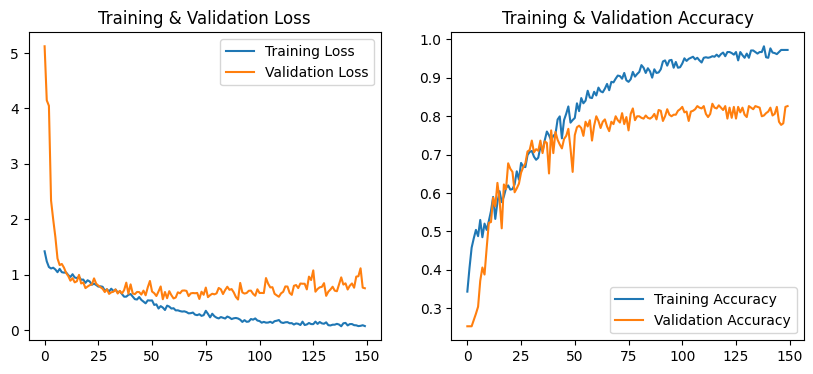



16/16 [==============================] - 0s 2ms/step


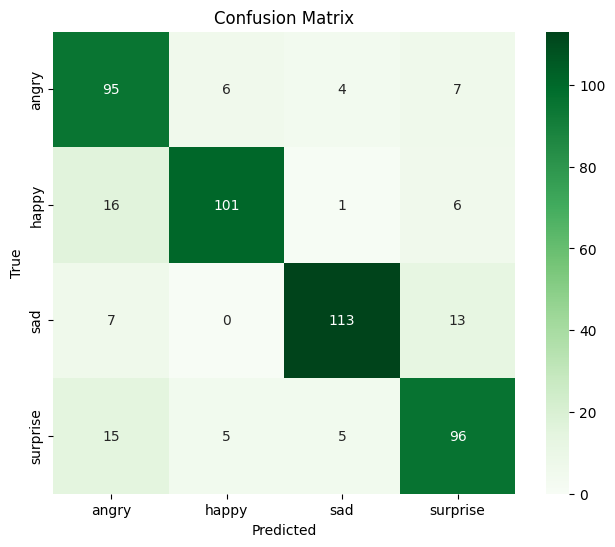



16/16 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       angry       0.71      0.85      0.78       112
       happy       0.90      0.81      0.86       124
         sad       0.92      0.85      0.88       133
    surprise       0.79      0.79      0.79       121

    accuracy                           0.83       490
   macro avg       0.83      0.83      0.83       490
weighted avg       0.84      0.83      0.83       490



16/16 [==============================] - 0s 2ms/step


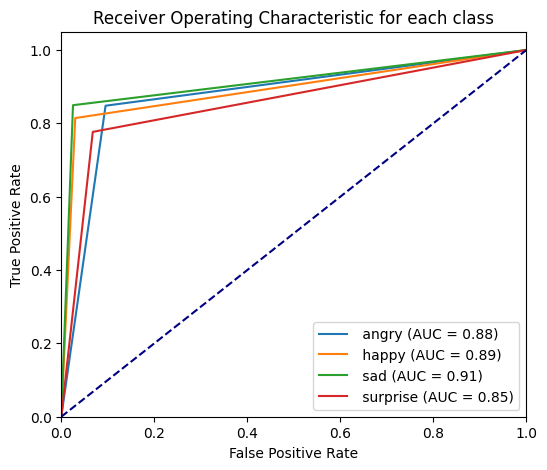

In [ ]:
results()

###**70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/150
27/27 [==============================] - 6s 33ms/step - loss: 1.3865 - accuracy: 0.3575 - val_loss: 6.0332 - val_accuracy: 0.2364
Epoch 2/150
27/27 [==============================] - 0s 17ms/step - loss: 1.1972 - accuracy: 0.4521 - val_loss: 3.6137 - val_accuracy: 0.2364
Epoch 3/150
27/27 [==============================] - 1s 23ms/step - loss: 1.1270 - accuracy: 0.4836 - val_loss: 3.1117 - val_accuracy: 0.2554
Epoch 4/150
27/27 [==============================] - 0s 18ms/step - loss: 1.0869 - accuracy: 0.4871 - val_loss: 1.9209 - val_accuracy: 0.2908
Epoch 5/150
27/27 [==============================] - 1s 22ms/step - loss: 1.0849 - accuracy: 0.5035 - val_loss: 1.6347 - val_accuracy: 0.2853
Epoch 6/150
27/27 [==============================] - 1s 22ms/step - loss: 1.0592 - accuracy: 0.5175 - val_loss: 1.5900 - val_accuracy: 0.2908
Epoch 7/150
27/27 [==============================] - 1s 24ms/step - loss: 1.0945 - accuracy: 0.5047 - val_loss: 1.2698 - val_accuracy: 0.4212
Epoch 

12/12 [==============================] - 1s 11ms/step
Accuracy: 0.8260869565217391
Precision: 0.8331615149313008
Recall: 0.8273483990502588
F1 Score: 0.8268896097209351




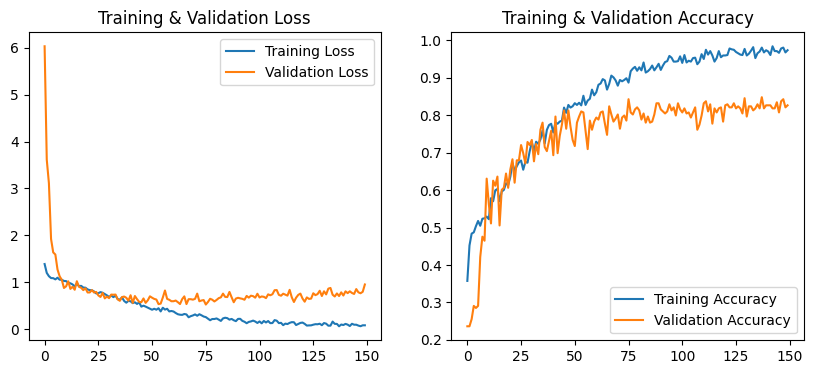



12/12 [==============================] - 0s 4ms/step


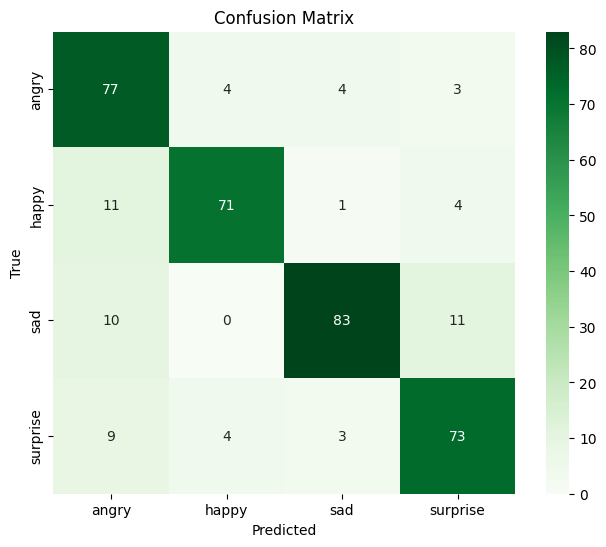



12/12 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.72      0.88      0.79        88
       happy       0.90      0.82      0.86        87
         sad       0.91      0.80      0.85       104
    surprise       0.80      0.82      0.81        89

    accuracy                           0.83       368
   macro avg       0.83      0.83      0.83       368
weighted avg       0.84      0.83      0.83       368



12/12 [==============================] - 0s 10ms/step


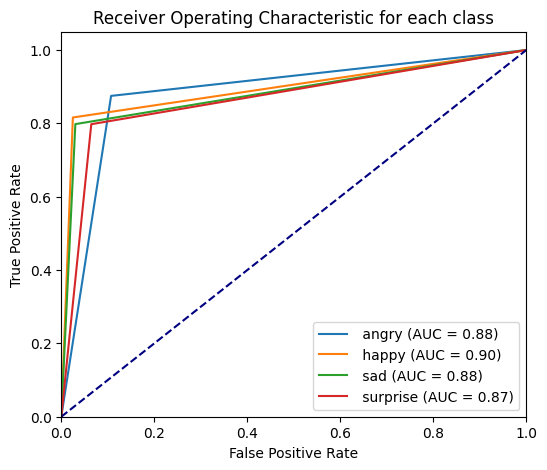

In [ ]:
results()

###**80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
num_classes = len(np.unique(y_train))

model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 512)           3072      
                                                                 
 activation (Activation)     (None, 40, 512)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 512)           0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 20, 512)           2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 20, 512)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 256)           6

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),batch_size=64)

Epoch 1/100
16/16 [==============================] - 11s 55ms/step - loss: 1.4491 - accuracy: 0.3269 - val_loss: 8.9416 - val_accuracy: 0.2286
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 1.2491 - accuracy: 0.4402 - val_loss: 8.7687 - val_accuracy: 0.2286
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 1.1325 - accuracy: 0.4597 - val_loss: 5.8423 - val_accuracy: 0.2286
Epoch 4/100
16/16 [==============================] - 0s 12ms/step - loss: 1.1104 - accuracy: 0.4883 - val_loss: 5.0188 - val_accuracy: 0.2286
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 1.0985 - accuracy: 0.4872 - val_loss: 3.4470 - val_accuracy: 0.2286
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 1.0623 - accuracy: 0.5179 - val_loss: 3.2201 - val_accuracy: 0.2327
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 1.0542 - accuracy: 0.5158 - val_loss: 2.5349 - val_accuracy: 0.2490
Epoch

8/8 [==============================] - 1s 19ms/step
Accuracy: 0.8571428571428571
Precision: 0.8570000664574701
Recall: 0.85501287037505
F1 Score: 0.8553528343002027




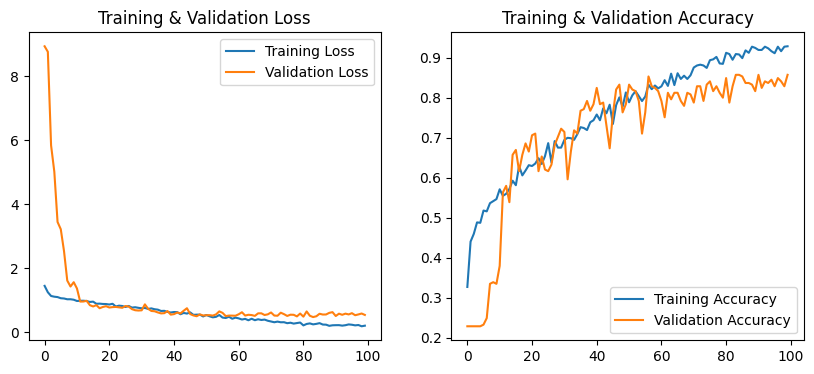



8/8 [==============================] - 0s 3ms/step


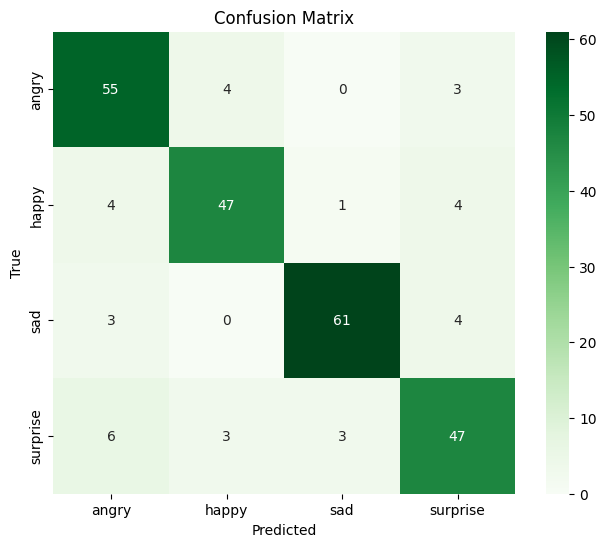



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.81      0.89      0.85        62
       happy       0.87      0.84      0.85        56
         sad       0.94      0.90      0.92        68
    surprise       0.81      0.80      0.80        59

    accuracy                           0.86       245
   macro avg       0.86      0.86      0.86       245
weighted avg       0.86      0.86      0.86       245



8/8 [==============================] - 0s 3ms/step


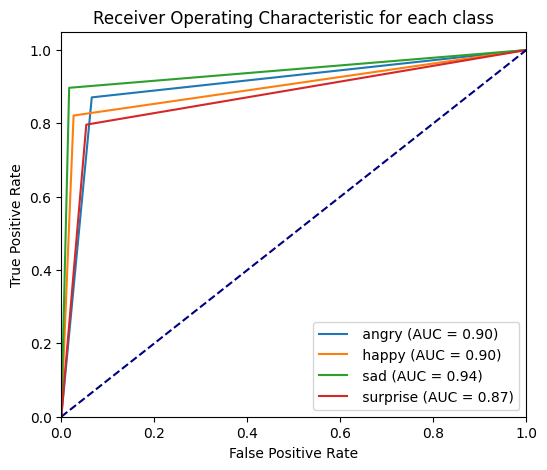

In [ ]:
results()

In [ ]:
num_classes = len(np.unique(y_train))

model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 40, 512)           3072      
                                                                 
 activation_4 (Activation)   (None, 40, 512)           0         
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 20, 512)           0         
 g1D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 20, 512)           2048      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 20, 512)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 20, 256)          

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/150
31/31 [==============================] - 5s 19ms/step - loss: 1.4017 - accuracy: 0.3207 - val_loss: 6.1865 - val_accuracy: 0.2286
Epoch 2/150
31/31 [==============================] - 0s 10ms/step - loss: 1.2175 - accuracy: 0.4658 - val_loss: 3.3812 - val_accuracy: 0.2327
Epoch 3/150
31/31 [==============================] - 0s 11ms/step - loss: 1.1155 - accuracy: 0.4862 - val_loss: 2.6683 - val_accuracy: 0.2490
Epoch 4/150
31/31 [==============================] - 0s 11ms/step - loss: 1.0983 - accuracy: 0.5056 - val_loss: 1.5438 - val_accuracy: 0.2816
Epoch 5/150
31/31 [==============================] - 0s 9ms/step - loss: 1.0525 - accuracy: 0.5199 - val_loss: 1.5750 - val_accuracy: 0.3020
Epoch 6/150
31/31 [==============================] - 0s 11ms/step - loss: 1.0593 - accuracy: 0.5230 - val_loss: 1.2714 - val_accuracy: 0.4041
Epoch 7/150
31/31 [==============================] - 0s 11ms/step - loss: 1.0733 - accuracy: 0.5189 - val_loss: 1.0273 - val_accuracy: 0.5592
Epoch 8

8/8 [==============================] - 0s 3ms/step
Accuracy: 0.8285714285714286
Precision: 0.8312446115528307
Recall: 0.8247471008633086
F1 Score: 0.82577539945961




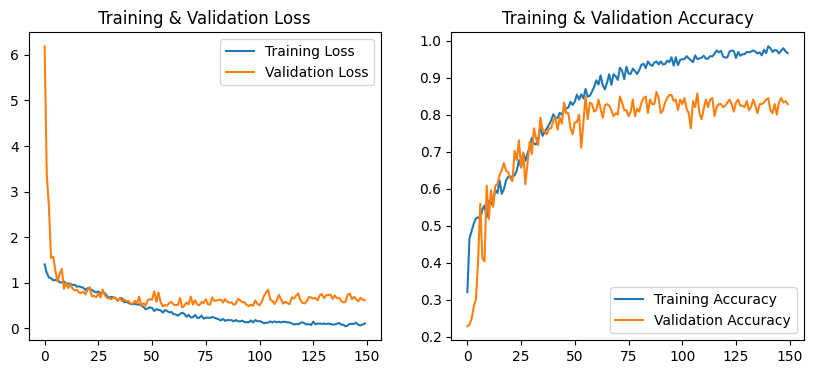



8/8 [==============================] - 0s 3ms/step


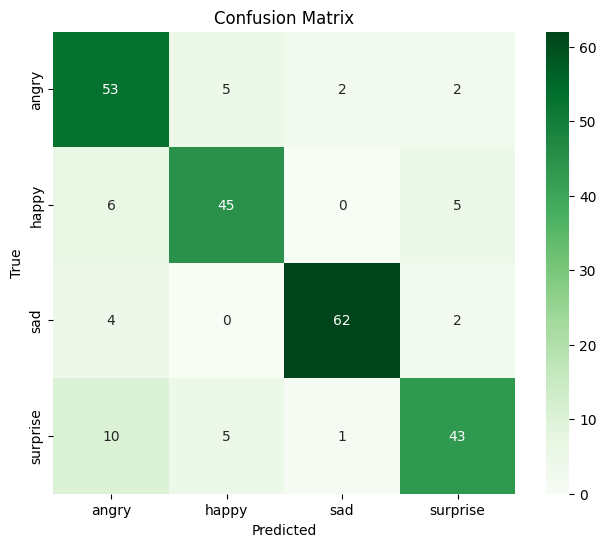



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.73      0.85      0.79        62
       happy       0.82      0.80      0.81        56
         sad       0.95      0.91      0.93        68
    surprise       0.83      0.73      0.77        59

    accuracy                           0.83       245
   macro avg       0.83      0.82      0.83       245
weighted avg       0.83      0.83      0.83       245



8/8 [==============================] - 0s 3ms/step


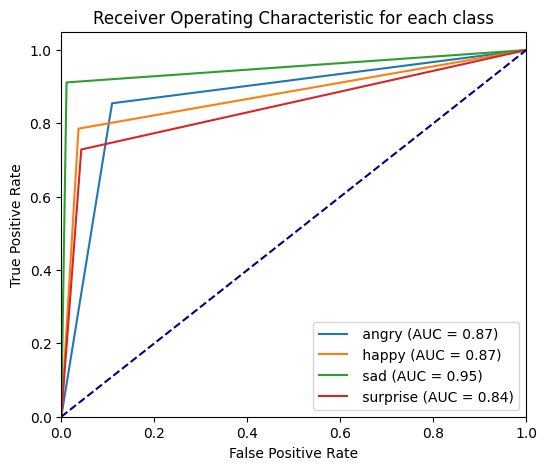

In [ ]:
results()

In [ ]:
model = Sequential()

model.add(Conv1D(64, 5, padding='same', input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 40, 64)            384       
                                                                 
 activation_19 (Activation)  (None, 40, 64)            0         
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 20, 64)            0         
 ng1D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 20, 64)            0         
                                                                 
 flatten_12 (Flatten)        (None, 1280)              0         
                                                                 
 dense_33 (Dense)            (None, 64)                81984     
                                                     

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/150
31/31 [==============================] - 3s 28ms/step - loss: 5.0061 - accuracy: 0.3258 - val_loss: 1.5345 - val_accuracy: 0.5102
Epoch 2/150
31/31 [==============================] - 0s 5ms/step - loss: 2.0997 - accuracy: 0.4045 - val_loss: 1.2021 - val_accuracy: 0.5347
Epoch 3/150
31/31 [==============================] - 0s 5ms/step - loss: 1.3031 - accuracy: 0.4331 - val_loss: 1.1451 - val_accuracy: 0.4571
Epoch 4/150
31/31 [==============================] - 0s 5ms/step - loss: 1.2273 - accuracy: 0.4556 - val_loss: 1.1554 - val_accuracy: 0.4939
Epoch 5/150
31/31 [==============================] - 0s 5ms/step - loss: 1.1770 - accuracy: 0.4525 - val_loss: 1.1064 - val_accuracy: 0.4694
Epoch 6/150
31/31 [==============================] - 0s 5ms/step - loss: 1.1429 - accuracy: 0.4791 - val_loss: 1.0758 - val_accuracy: 0.4898
Epoch 7/150
31/31 [==============================] - 0s 5ms/step - loss: 1.1457 - accuracy: 0.4586 - val_loss: 1.0666 - val_accuracy: 0.4898
Epoch 8/150


8/8 [==============================] - 0s 2ms/step
Accuracy: 0.7918367346938775
Precision: 0.7954490560868039
Recall: 0.7920926161607342
F1 Score: 0.7907767213265353




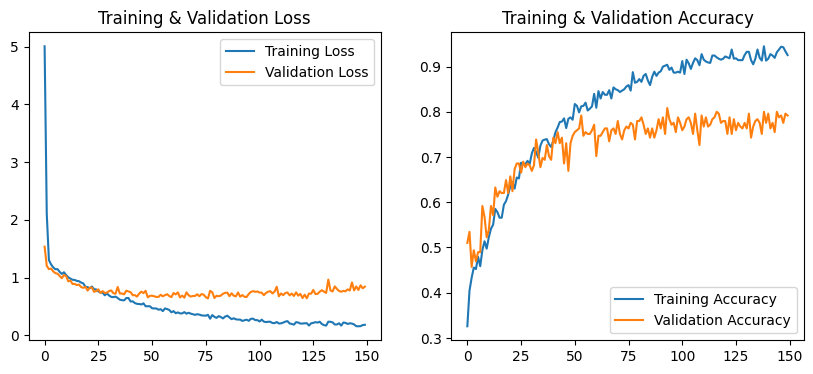



8/8 [==============================] - 0s 2ms/step


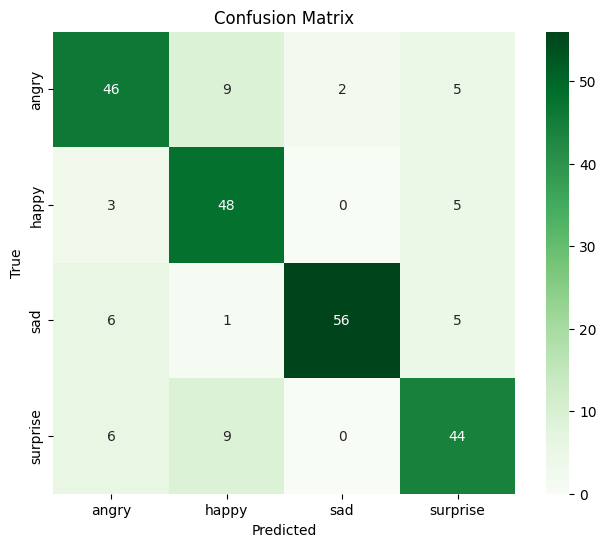



8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       angry       0.75      0.74      0.75        62
       happy       0.72      0.86      0.78        56
         sad       0.97      0.82      0.89        68
    surprise       0.75      0.75      0.75        59

    accuracy                           0.79       245
   macro avg       0.80      0.79      0.79       245
weighted avg       0.80      0.79      0.79       245



8/8 [==============================] - 0s 2ms/step


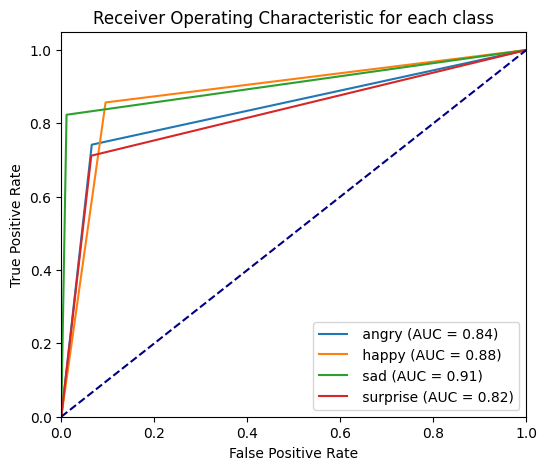

In [ ]:
results()

In [ ]:
num_classes = len(np.unique(y_train))

model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 9s 30ms/step - loss: 1.3754 - accuracy: 0.3524 - val_loss: 7.3369 - val_accuracy: 0.2286
Epoch 2/200
31/31 [==============================] - 0s 9ms/step - loss: 1.1786 - accuracy: 0.4525 - val_loss: 3.9356 - val_accuracy: 0.2286
Epoch 3/200
31/31 [==============================] - 0s 9ms/step - loss: 1.1235 - accuracy: 0.4627 - val_loss: 2.4302 - val_accuracy: 0.2449
Epoch 4/200
31/31 [==============================] - 0s 9ms/step - loss: 1.0986 - accuracy: 0.5036 - val_loss: 1.7040 - val_accuracy: 0.2571
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.0862 - accuracy: 0.5352 - val_loss: 1.5401 - val_accuracy: 0.3224
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 1.0847 - accuracy: 0.5117 - val_loss: 1.1760 - val_accuracy: 0.4571
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 1.0468 - accuracy: 0.5230 - val_loss: 1.0977 - val_accuracy: 0.4531
Epoch 8/200


8/8 [==============================] - 1s 7ms/step
Accuracy: 0.8734693877551021
Precision: 0.8748052386210281
Recall: 0.8717264106298616
F1 Score: 0.8721490193300265




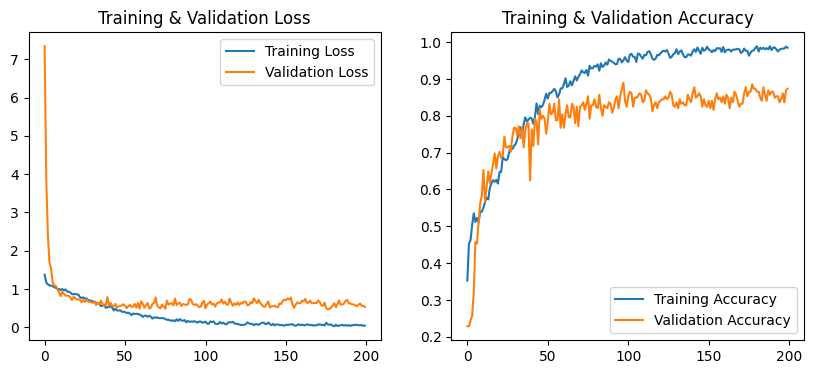



8/8 [==============================] - 0s 5ms/step


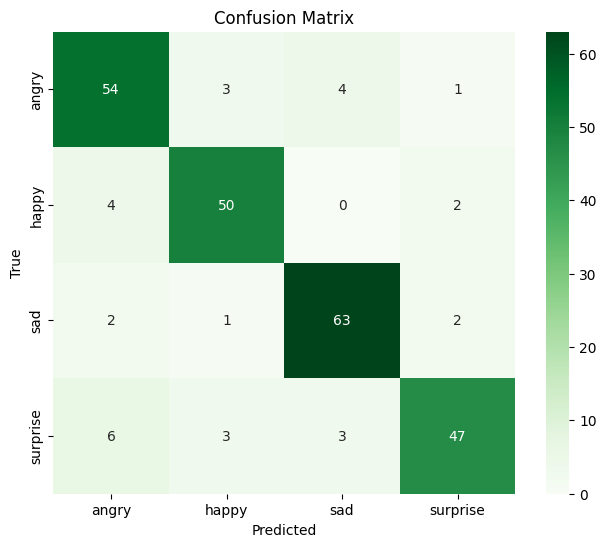



8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       angry       0.82      0.87      0.84        62
       happy       0.88      0.89      0.88        56
         sad       0.90      0.93      0.91        68
    surprise       0.90      0.80      0.85        59

    accuracy                           0.87       245
   macro avg       0.87      0.87      0.87       245
weighted avg       0.88      0.87      0.87       245



8/8 [==============================] - 0s 8ms/step


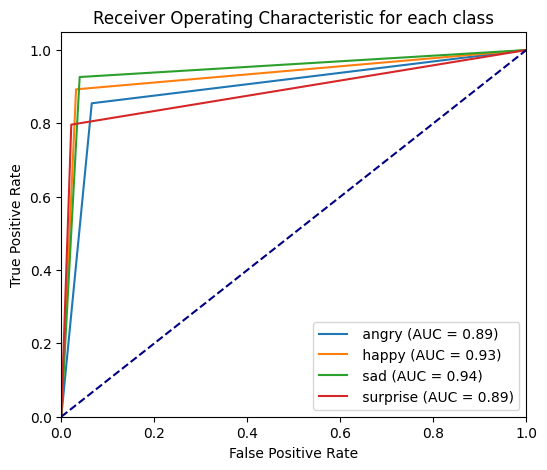

In [ ]:
results()

####**Highest Acc of CNN**

In [ ]:
num_classes = len(np.unique(y_train))

model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/150
31/31 [==============================] - 7s 28ms/step - loss: 1.3701 - accuracy: 0.3636 - val_loss: 7.1587 - val_accuracy: 0.2286
Epoch 2/150
31/31 [==============================] - 0s 15ms/step - loss: 1.1893 - accuracy: 0.4545 - val_loss: 5.0718 - val_accuracy: 0.2286
Epoch 3/150
31/31 [==============================] - 0s 15ms/step - loss: 1.1316 - accuracy: 0.4699 - val_loss: 2.2414 - val_accuracy: 0.2367
Epoch 4/150
31/31 [==============================] - 0s 16ms/step - loss: 1.0700 - accuracy: 0.5240 - val_loss: 1.9764 - val_accuracy: 0.2531
Epoch 5/150
31/31 [==============================] - 0s 15ms/step - loss: 1.0669 - accuracy: 0.5015 - val_loss: 1.8250 - val_accuracy: 0.3143
Epoch 6/150
31/31 [==============================] - 0s 11ms/step - loss: 1.0888 - accuracy: 0.4791 - val_loss: 1.4488 - val_accuracy: 0.3551
Epoch 7/150
31/31 [==============================] - 0s 11ms/step - loss: 1.0464 - accuracy: 0.5230 - val_loss: 1.3277 - val_accuracy: 0.3796
Epoch 

8/8 [==============================] - 0s 5ms/step
Accuracy: 0.8734693877551021
Precision: 0.877985478520018
Recall: 0.8724379855824232
F1 Score: 0.8729664797060122




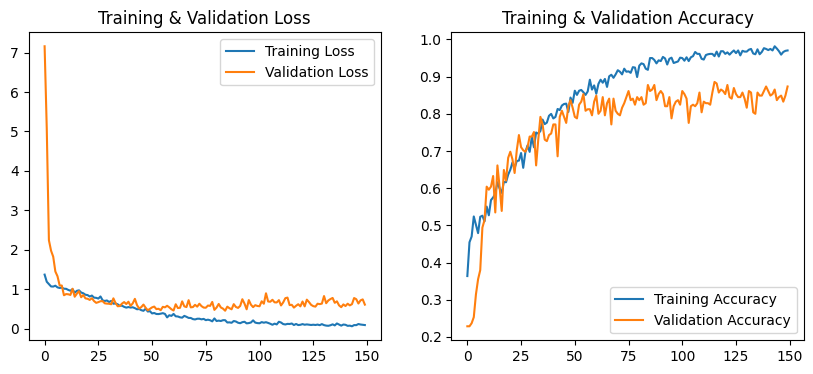



8/8 [==============================] - 0s 4ms/step


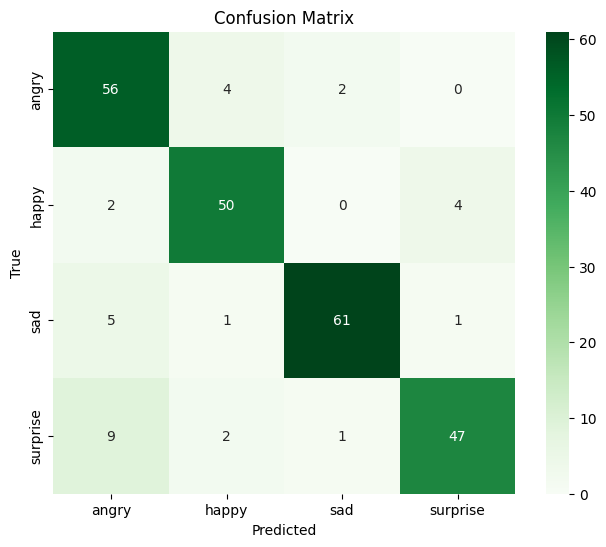



8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       angry       0.78      0.90      0.84        62
       happy       0.88      0.89      0.88        56
         sad       0.95      0.90      0.92        68
    surprise       0.90      0.80      0.85        59

    accuracy                           0.87       245
   macro avg       0.88      0.87      0.87       245
weighted avg       0.88      0.87      0.87       245



8/8 [==============================] - 0s 4ms/step


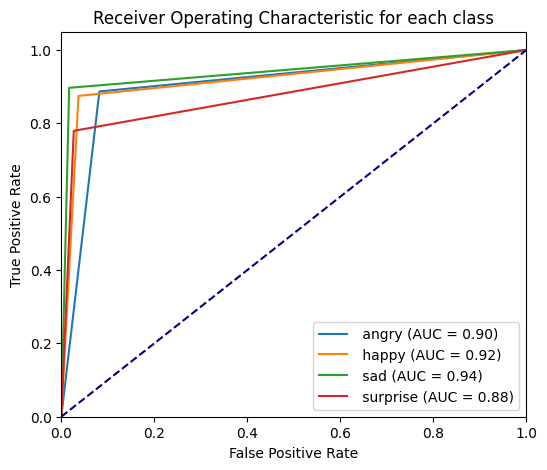

In [ ]:
results()

In [ ]:
num_classes = len(np.unique(y_train))

model = Sequential()

model.add(Conv1D(512, 5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv1D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 4s 20ms/step - loss: 1.2307 - accuracy: 0.4311 - val_loss: 11.0995 - val_accuracy: 0.2286
Epoch 2/200
31/31 [==============================] - 0s 14ms/step - loss: 1.0959 - accuracy: 0.5015 - val_loss: 4.8351 - val_accuracy: 0.2327
Epoch 3/200
31/31 [==============================] - 0s 13ms/step - loss: 1.0667 - accuracy: 0.5383 - val_loss: 2.5796 - val_accuracy: 0.2531
Epoch 4/200
31/31 [==============================] - 0s 12ms/step - loss: 1.0121 - accuracy: 0.5516 - val_loss: 1.8534 - val_accuracy: 0.2531
Epoch 5/200
31/31 [==============================] - 0s 13ms/step - loss: 0.9651 - accuracy: 0.5649 - val_loss: 1.3588 - val_accuracy: 0.3633
Epoch 6/200
31/31 [==============================] - 0s 13ms/step - loss: 0.9406 - accuracy: 0.5802 - val_loss: 1.5609 - val_accuracy: 0.3918
Epoch 7/200
31/31 [==============================] - 0s 14ms/step - loss: 0.9262 - accuracy: 0.6016 - val_loss: 0.9267 - val_accuracy: 0.5388
Epoch

8/8 [==============================] - 1s 4ms/step
Accuracy: 0.8448979591836735
Precision: 0.8446426231656184
Recall: 0.8413947385952741
F1 Score: 0.8424813696253665




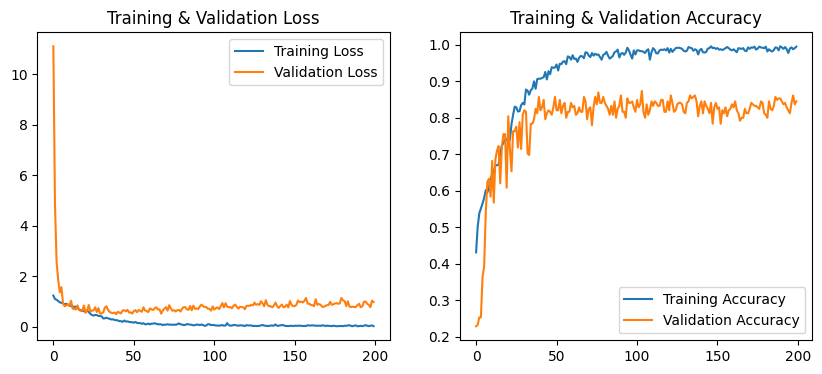



8/8 [==============================] - 0s 4ms/step


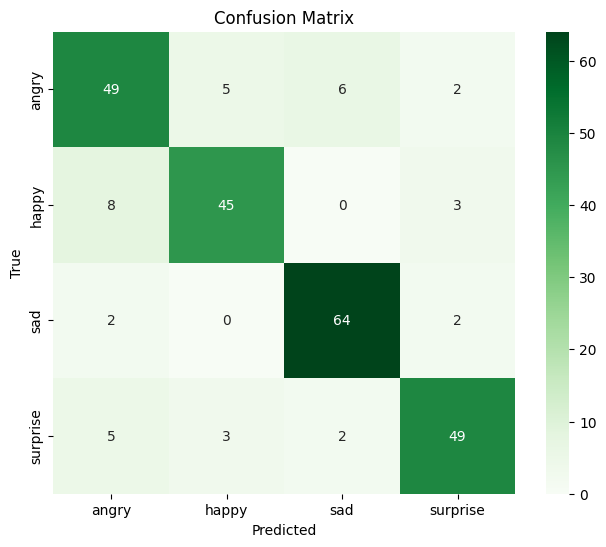



8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       angry       0.77      0.79      0.78        62
       happy       0.85      0.80      0.83        56
         sad       0.89      0.94      0.91        68
    surprise       0.88      0.83      0.85        59

    accuracy                           0.84       245
   macro avg       0.84      0.84      0.84       245
weighted avg       0.85      0.84      0.84       245



8/8 [==============================] - 0s 3ms/step


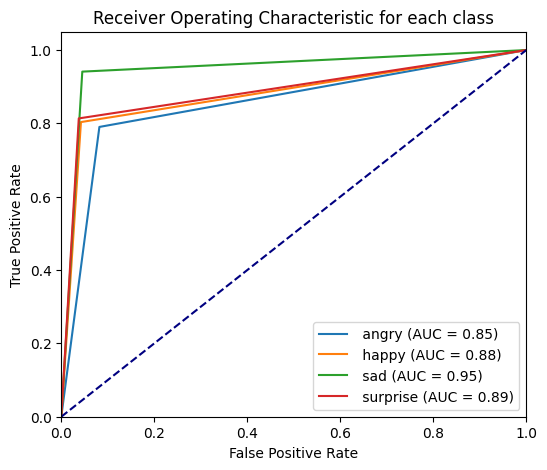

In [ ]:
results()

##**ANN**

###**60-40**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
23/23 [==============================] - 5s 22ms/step - loss: 1.2947 - accuracy: 0.5000 - val_loss: 10.7919 - val_accuracy: 0.2592
Epoch 2/200
23/23 [==============================] - 0s 11ms/step - loss: 0.9513 - accuracy: 0.6185 - val_loss: 8.5778 - val_accuracy: 0.2735
Epoch 3/200
23/23 [==============================] - 0s 11ms/step - loss: 0.8165 - accuracy: 0.6757 - val_loss: 4.6667 - val_accuracy: 0.3041
Epoch 4/200
23/23 [==============================] - 0s 11ms/step - loss: 0.7686 - accuracy: 0.6839 - val_loss: 2.5407 - val_accuracy: 0.3592
Epoch 5/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7088 - accuracy: 0.7289 - val_loss: 1.6582 - val_accuracy: 0.4776
Epoch 6/200
23/23 [==============================] - 0s 11ms/step - loss: 0.6113 - accuracy: 0.7493 - val_loss: 1.1051 - val_accuracy: 0.5796
Epoch 7/200
23/23 [==============================] - 0s 14ms/step - loss: 0.6200 - accuracy: 0.7548 - val_loss: 0.9834 - val_accuracy: 0.6510
Epoch 

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.8673469387755102
Precision: 0.8666378555126688
Recall: 0.8663717557523508
F1 Score: 0.8655958363014032




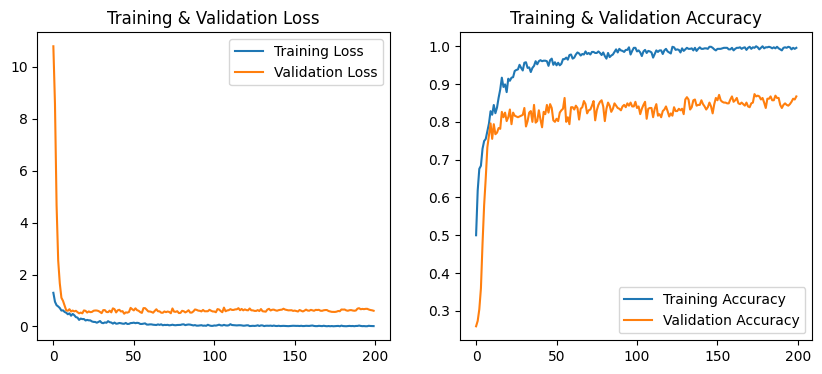



16/16 [==============================] - 0s 2ms/step


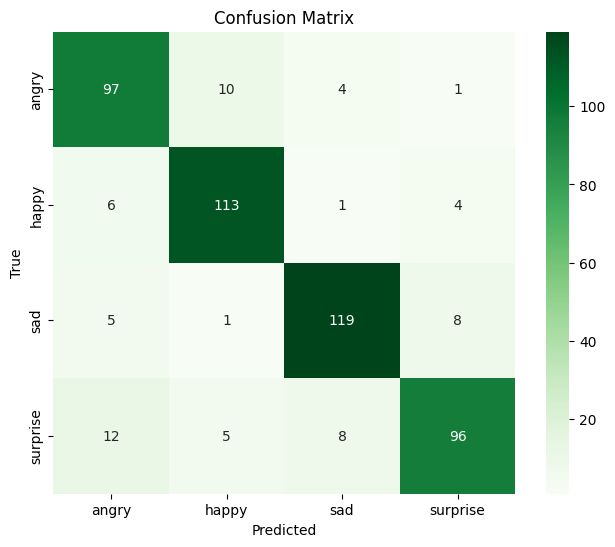



16/16 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       angry       0.81      0.87      0.84       112
       happy       0.88      0.91      0.89       124
         sad       0.90      0.89      0.90       133
    surprise       0.88      0.79      0.83       121

    accuracy                           0.87       490
   macro avg       0.87      0.87      0.87       490
weighted avg       0.87      0.87      0.87       490



16/16 [==============================] - 0s 2ms/step


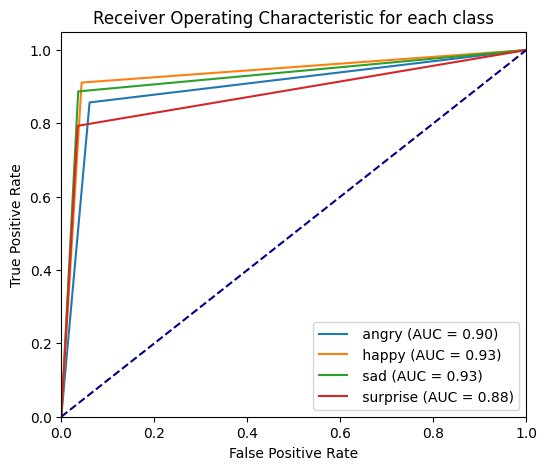

In [ ]:
results()

###**70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
27/27 [==============================] - 5s 20ms/step - loss: 1.3045 - accuracy: 0.4965 - val_loss: 8.3234 - val_accuracy: 0.2473
Epoch 2/200
27/27 [==============================] - 0s 11ms/step - loss: 0.9768 - accuracy: 0.6086 - val_loss: 5.1446 - val_accuracy: 0.2799
Epoch 3/200
27/27 [==============================] - 0s 9ms/step - loss: 0.8854 - accuracy: 0.6379 - val_loss: 3.2834 - val_accuracy: 0.3587
Epoch 4/200
27/27 [==============================] - 0s 10ms/step - loss: 0.7776 - accuracy: 0.6822 - val_loss: 1.8078 - val_accuracy: 0.4293
Epoch 5/200
27/27 [==============================] - 0s 11ms/step - loss: 0.6618 - accuracy: 0.7418 - val_loss: 1.4669 - val_accuracy: 0.5000
Epoch 6/200
27/27 [==============================] - 0s 11ms/step - loss: 0.6216 - accuracy: 0.7582 - val_loss: 0.8047 - val_accuracy: 0.6739
Epoch 7/200
27/27 [==============================] - 0s 9ms/step - loss: 0.5514 - accuracy: 0.7944 - val_loss: 0.6663 - val_accuracy: 0.7228
Epoch 8/

12/12 [==============================] - 0s 3ms/step
Accuracy: 0.8559782608695652
Precision: 0.8563437531460787
Recall: 0.8554581557535839
F1 Score: 0.854875775305139




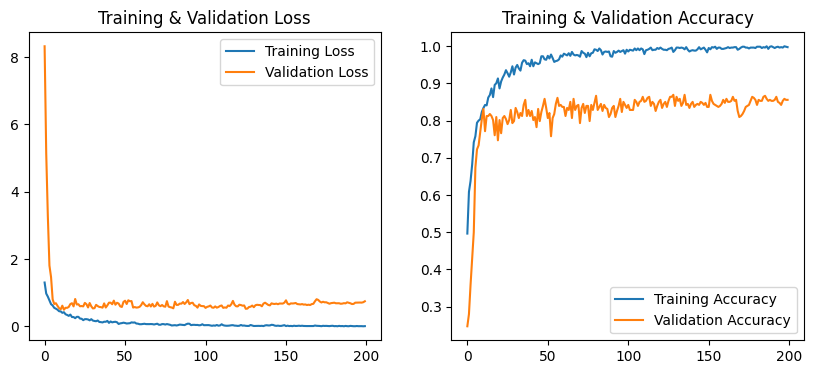



12/12 [==============================] - 0s 3ms/step


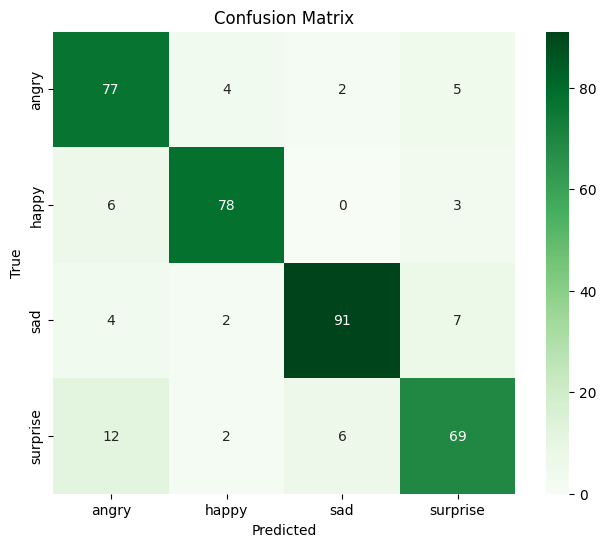



12/12 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.78      0.88      0.82        88
       happy       0.91      0.90      0.90        87
         sad       0.92      0.88      0.90       104
    surprise       0.82      0.78      0.80        89

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.85       368
weighted avg       0.86      0.86      0.86       368



12/12 [==============================] - 0s 3ms/step


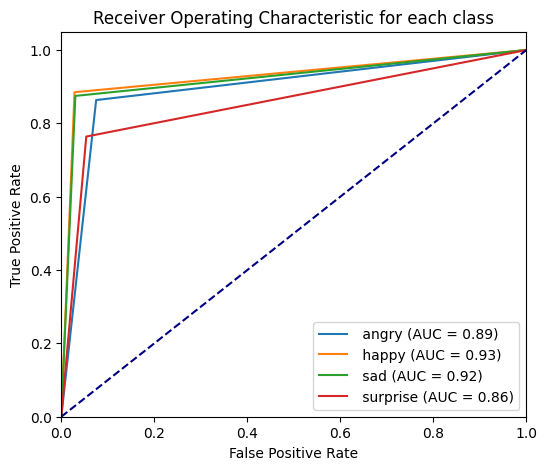

In [ ]:
results()

###**80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/150
31/31 [==============================] - 5s 18ms/step - loss: 1.2895 - accuracy: 0.4852 - val_loss: 12.5576 - val_accuracy: 0.2327
Epoch 2/150
31/31 [==============================] - 0s 9ms/step - loss: 0.9476 - accuracy: 0.6221 - val_loss: 4.0716 - val_accuracy: 0.3184
Epoch 3/150
31/31 [==============================] - 0s 9ms/step - loss: 0.8506 - accuracy: 0.6660 - val_loss: 2.8819 - val_accuracy: 0.3551
Epoch 4/150
31/31 [==============================] - 0s 10ms/step - loss: 0.7402 - accuracy: 0.7150 - val_loss: 1.2415 - val_accuracy: 0.5061
Epoch 5/150
31/31 [==============================] - 0s 11ms/step - loss: 0.6541 - accuracy: 0.7457 - val_loss: 0.9508 - val_accuracy: 0.6163
Epoch 6/150
31/31 [==============================] - 0s 15ms/step - loss: 0.6312 - accuracy: 0.7559 - val_loss: 0.6931 - val_accuracy: 0.7388
Epoch 7/150
31/31 [==============================] - 0s 14ms/step - loss: 0.5511 - accuracy: 0.7937 - val_loss: 0.7145 - val_accuracy: 0.7306
Epoch 8

8/8 [==============================] - 0s 3ms/step
Accuracy: 0.8653061224489796
Precision: 0.8704954418397814
Recall: 0.8641684393823139
F1 Score: 0.8654656910253925




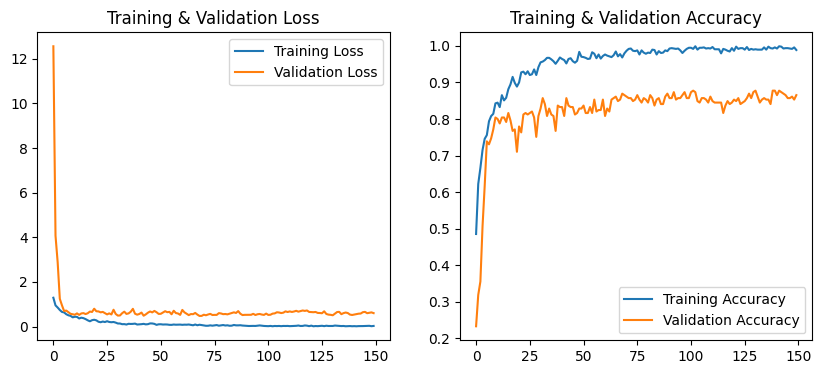



8/8 [==============================] - 0s 5ms/step


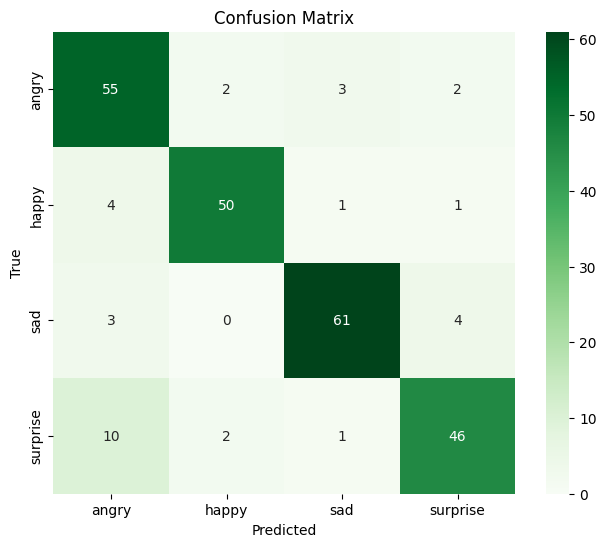



8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       angry       0.76      0.89      0.82        62
       happy       0.93      0.89      0.91        56
         sad       0.92      0.90      0.91        68
    surprise       0.87      0.78      0.82        59

    accuracy                           0.87       245
   macro avg       0.87      0.86      0.87       245
weighted avg       0.87      0.87      0.87       245



8/8 [==============================] - 0s 4ms/step


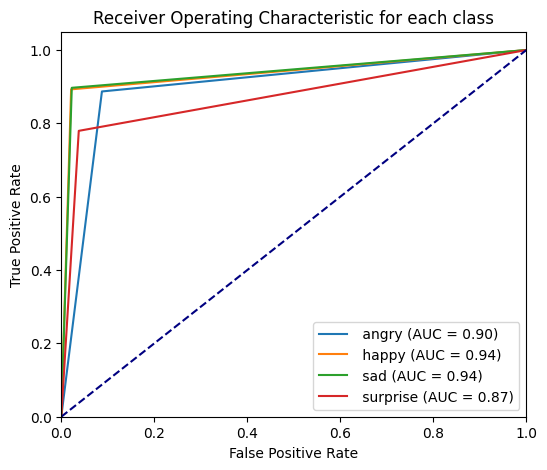

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 4s 35ms/step - loss: 2.9392 - accuracy: 0.3105 - val_loss: 1.4653 - val_accuracy: 0.3184
Epoch 2/200
31/31 [==============================] - 0s 9ms/step - loss: 1.4739 - accuracy: 0.3463 - val_loss: 1.1661 - val_accuracy: 0.4163
Epoch 3/200
31/31 [==============================] - 0s 10ms/step - loss: 1.2502 - accuracy: 0.4351 - val_loss: 1.0985 - val_accuracy: 0.4653
Epoch 4/200
31/31 [==============================] - 0s 9ms/step - loss: 1.1794 - accuracy: 0.4525 - val_loss: 1.0459 - val_accuracy: 0.5184
Epoch 5/200
31/31 [==============================] - 0s 8ms/step - loss: 1.1116 - accuracy: 0.4719 - val_loss: 1.0314 - val_accuracy: 0.4857
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 1.0489 - accuracy: 0.5015 - val_loss: 0.9502 - val_accuracy: 0.5878
Epoch 7/200
31/31 [==============================] - 0s 6ms/step - loss: 1.0308 - accuracy: 0.5383 - val_loss: 0.9925 - val_accuracy: 0.5918
Epoch 8/200

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.8571428571428571
Precision: 0.8561553030303031
Recall: 0.8560380207304353
F1 Score: 0.8556237986182427




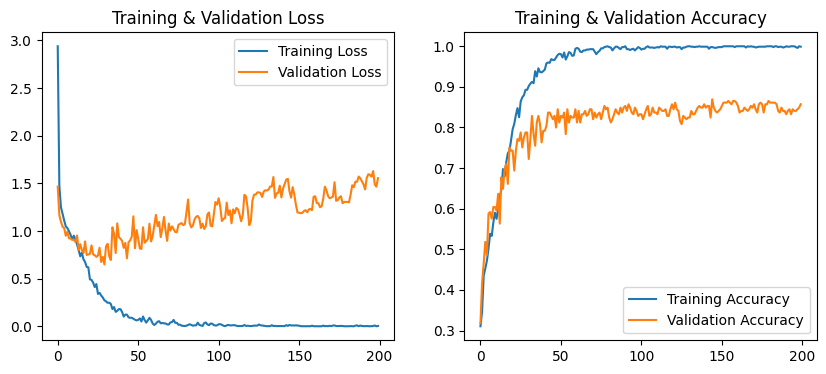



8/8 [==============================] - 0s 4ms/step


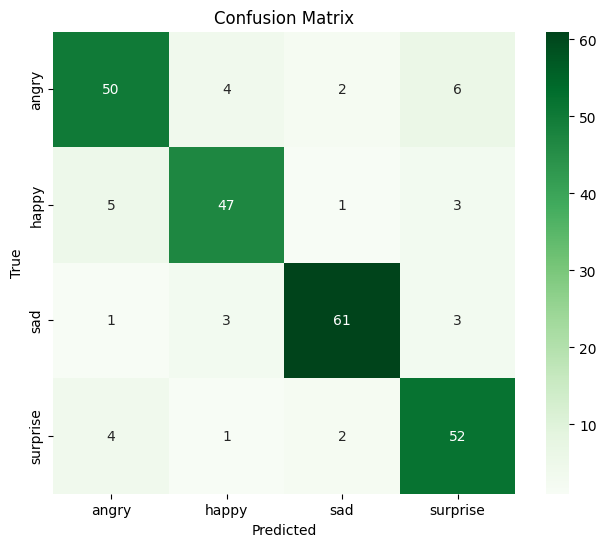



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.83      0.81      0.82        62
       happy       0.85      0.84      0.85        56
         sad       0.92      0.90      0.91        68
    surprise       0.81      0.88      0.85        59

    accuracy                           0.86       245
   macro avg       0.86      0.86      0.86       245
weighted avg       0.86      0.86      0.86       245



8/8 [==============================] - 0s 3ms/step


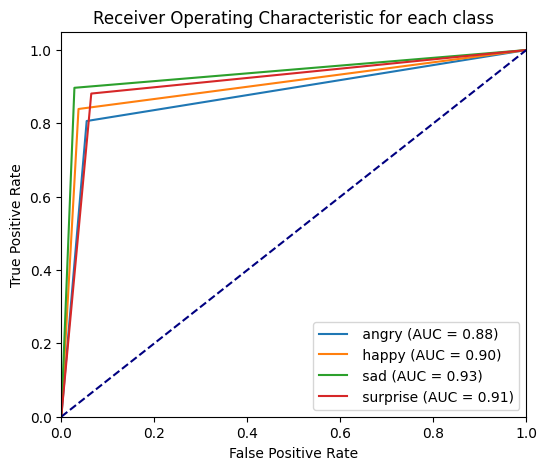

In [ ]:
results()

####**Highest Acc of ANN**

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 9s 30ms/step - loss: 1.3052 - accuracy: 0.4842 - val_loss: 17.4794 - val_accuracy: 0.2327
Epoch 2/200
31/31 [==============================] - 1s 18ms/step - loss: 0.9332 - accuracy: 0.6027 - val_loss: 8.6557 - val_accuracy: 0.2735
Epoch 3/200
31/31 [==============================] - 1s 19ms/step - loss: 0.8170 - accuracy: 0.6793 - val_loss: 5.5191 - val_accuracy: 0.3265
Epoch 4/200
31/31 [==============================] - 1s 21ms/step - loss: 0.7190 - accuracy: 0.7365 - val_loss: 2.2276 - val_accuracy: 0.4531
Epoch 5/200
31/31 [==============================] - 1s 24ms/step - loss: 0.6252 - accuracy: 0.7579 - val_loss: 1.2003 - val_accuracy: 0.5918
Epoch 6/200
31/31 [==============================] - 1s 23ms/step - loss: 0.5860 - accuracy: 0.7651 - val_loss: 1.0338 - val_accuracy: 0.6000
Epoch 7/200
31/31 [==============================] - 1s 21ms/step - loss: 0.5362 - accuracy: 0.7896 - val_loss: 0.7216 - val_accuracy: 0.7184
Epoch

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.9061224489795918
Precision: 0.9100403794924251
Recall: 0.9065852557534768
F1 Score: 0.9075970418432421




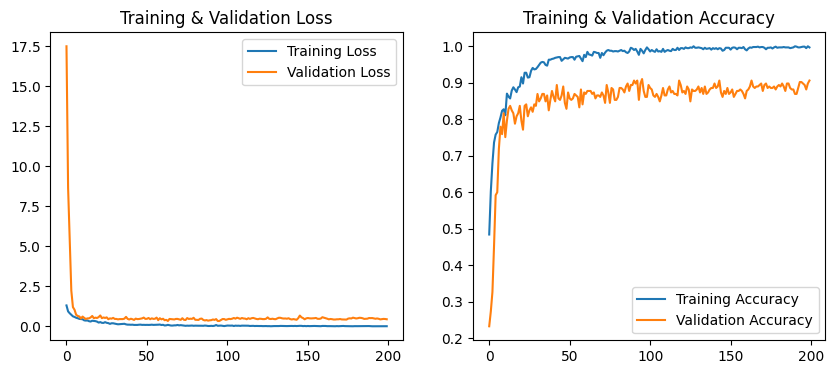



8/8 [==============================] - 0s 2ms/step


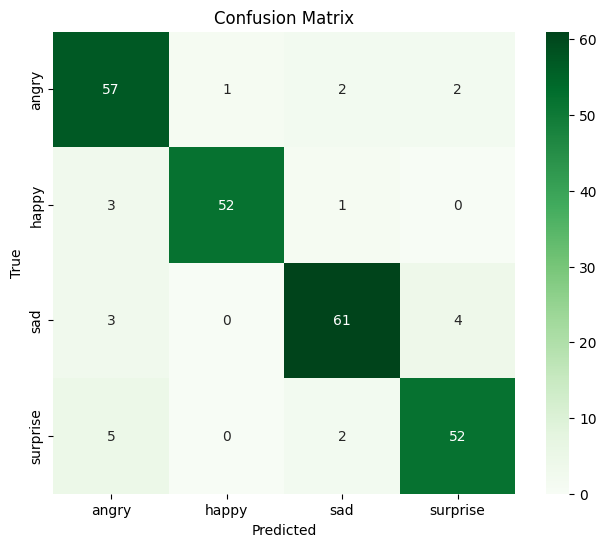



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.84      0.92      0.88        62
       happy       0.98      0.93      0.95        56
         sad       0.92      0.90      0.91        68
    surprise       0.90      0.88      0.89        59

    accuracy                           0.91       245
   macro avg       0.91      0.91      0.91       245
weighted avg       0.91      0.91      0.91       245



8/8 [==============================] - 0s 3ms/step


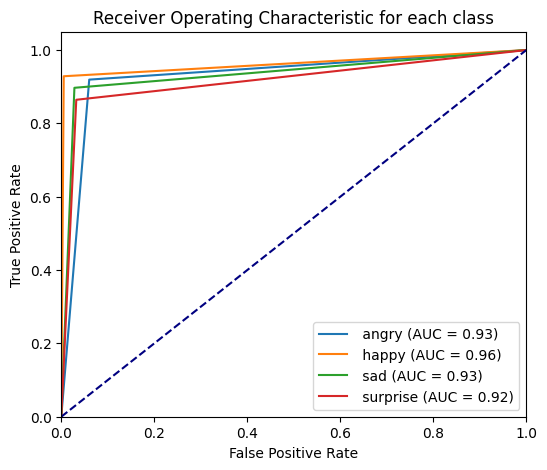

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/250
31/31 [==============================] - 10s 31ms/step - loss: 1.2877 - accuracy: 0.4934 - val_loss: 9.2206 - val_accuracy: 0.2367
Epoch 2/250
31/31 [==============================] - 0s 15ms/step - loss: 0.9007 - accuracy: 0.6353 - val_loss: 5.6130 - val_accuracy: 0.2612
Epoch 3/250
31/31 [==============================] - 1s 19ms/step - loss: 0.7929 - accuracy: 0.6956 - val_loss: 2.2095 - val_accuracy: 0.3837
Epoch 4/250
31/31 [==============================] - 1s 21ms/step - loss: 0.6994 - accuracy: 0.7283 - val_loss: 1.3674 - val_accuracy: 0.4776
Epoch 5/250
31/31 [==============================] - 1s 16ms/step - loss: 0.6343 - accuracy: 0.7487 - val_loss: 1.0799 - val_accuracy: 0.5837
Epoch 6/250
31/31 [==============================] - 1s 18ms/step - loss: 0.5451 - accuracy: 0.7814 - val_loss: 0.9972 - val_accuracy: 0.6327
Epoch 7/250
31/31 [==============================] - 0s 16ms/step - loss: 0.5301 - accuracy: 0.7937 - val_loss: 0.7796 - val_accuracy: 0.6980
Epoch

8/8 [==============================] - 0s 2ms/step
Accuracy: 0.8979591836734694
Precision: 0.8992505921751204
Recall: 0.8966332569112937
F1 Score: 0.8970626293995859




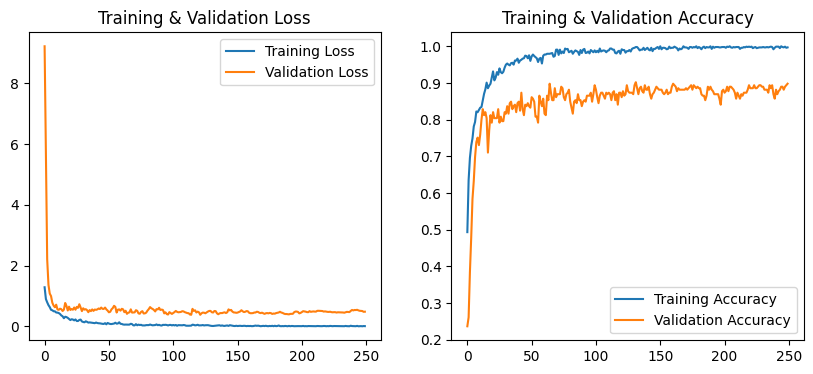



8/8 [==============================] - 0s 3ms/step


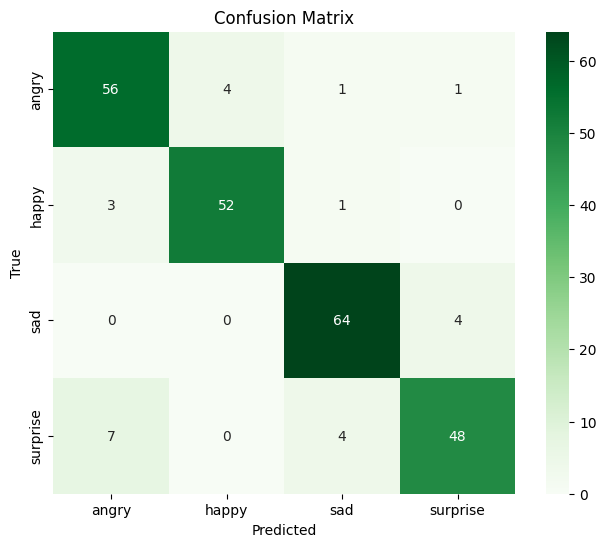



8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       angry       0.85      0.90      0.88        62
       happy       0.93      0.93      0.93        56
         sad       0.91      0.94      0.93        68
    surprise       0.91      0.81      0.86        59

    accuracy                           0.90       245
   macro avg       0.90      0.90      0.90       245
weighted avg       0.90      0.90      0.90       245



8/8 [==============================] - 0s 4ms/step


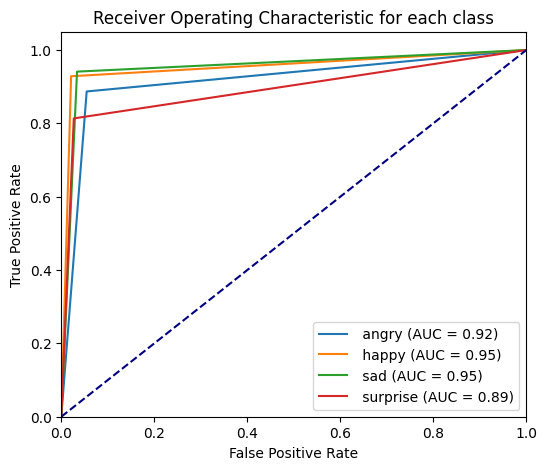

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/1000
31/31 [==============================] - 6s 49ms/step - loss: 1.6022 - accuracy: 0.3626 - val_loss: 2.6891 - val_accuracy: 0.3184
Epoch 2/1000
31/31 [==============================] - 1s 25ms/step - loss: 1.2371 - accuracy: 0.5158 - val_loss: 2.3356 - val_accuracy: 0.3184
Epoch 3/1000
31/31 [==============================] - 1s 26ms/step - loss: 1.0555 - accuracy: 0.5761 - val_loss: 1.8747 - val_accuracy: 0.3224
Epoch 4/1000
31/31 [==============================] - 1s 30ms/step - loss: 1.0108 - accuracy: 0.5894 - val_loss: 1.5031 - val_accuracy: 0.3592
Epoch 5/1000
31/31 [==============================] - 1s 27ms/step - loss: 0.9380 - accuracy: 0.6282 - val_loss: 1.1919 - val_accuracy: 0.4653
Epoch 6/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.8521 - accuracy: 0.6404 - val_loss: 1.0071 - val_accuracy: 0.5633
Epoch 7/1000
31/31 [==============================] - 1s 39ms/step - loss: 0.8016 - accuracy: 0.6782 - val_loss: 0.8903 - val_accuracy: 0.6000

8/8 [==============================] - 0s 3ms/step
Accuracy: 0.8816326530612245
Precision: 0.8813582251082251
Recall: 0.8815496195744563
F1 Score: 0.8813745453405243




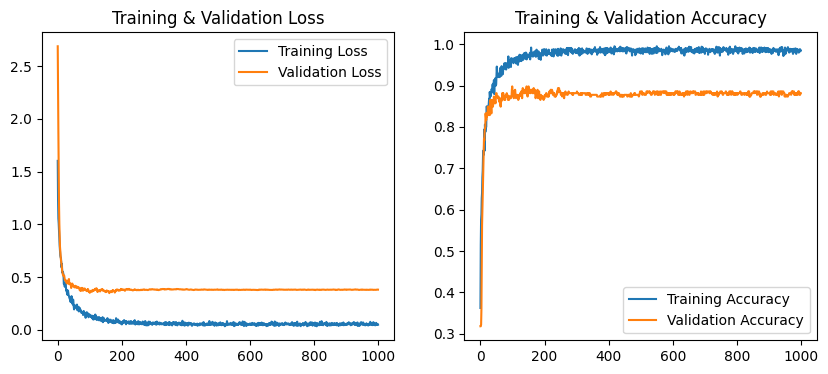



8/8 [==============================] - 0s 2ms/step


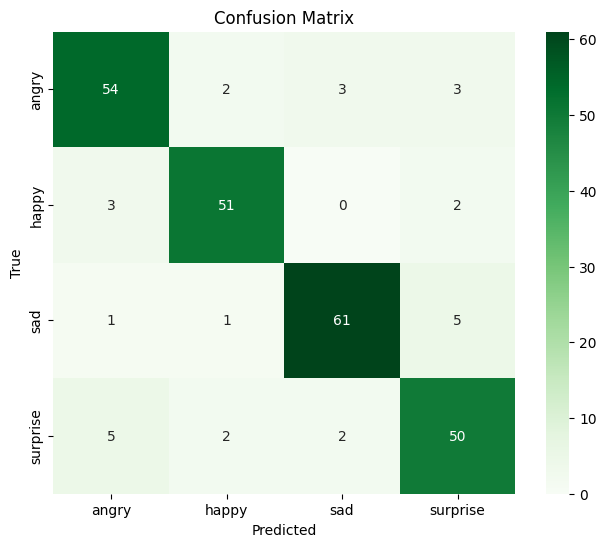



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.86      0.87      0.86        62
       happy       0.91      0.91      0.91        56
         sad       0.92      0.90      0.91        68
    surprise       0.83      0.85      0.84        59

    accuracy                           0.88       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.88      0.88      0.88       245



8/8 [==============================] - 0s 3ms/step


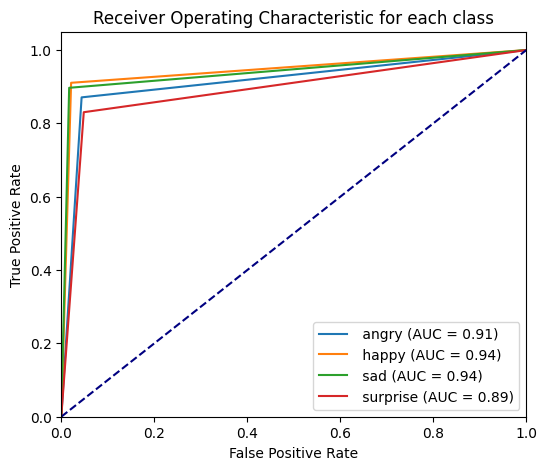

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/300
31/31 [==============================] - 6s 17ms/step - loss: 1.3223 - accuracy: 0.4872 - val_loss: 15.1881 - val_accuracy: 0.2327
Epoch 2/300
31/31 [==============================] - 0s 9ms/step - loss: 1.1235 - accuracy: 0.5424 - val_loss: 8.2235 - val_accuracy: 0.2653
Epoch 3/300
31/31 [==============================] - 0s 9ms/step - loss: 0.9855 - accuracy: 0.6057 - val_loss: 3.0281 - val_accuracy: 0.3959
Epoch 4/300
31/31 [==============================] - 0s 9ms/step - loss: 0.8921 - accuracy: 0.6323 - val_loss: 1.7618 - val_accuracy: 0.5061
Epoch 5/300
31/31 [==============================] - 0s 9ms/step - loss: 0.8259 - accuracy: 0.6588 - val_loss: 1.2804 - val_accuracy: 0.5469
Epoch 6/300
31/31 [==============================] - 0s 9ms/step - loss: 0.8211 - accuracy: 0.6691 - val_loss: 0.7953 - val_accuracy: 0.6776
Epoch 7/300
31/31 [==============================] - 0s 8ms/step - loss: 0.7472 - accuracy: 0.6946 - val_loss: 0.6995 - val_accuracy: 0.7469
Epoch 8/300

8/8 [==============================] - 0s 2ms/step
Accuracy: 0.8857142857142857
Precision: 0.8848882730293839
Recall: 0.8846652726153338
F1 Score: 0.8847492236134218




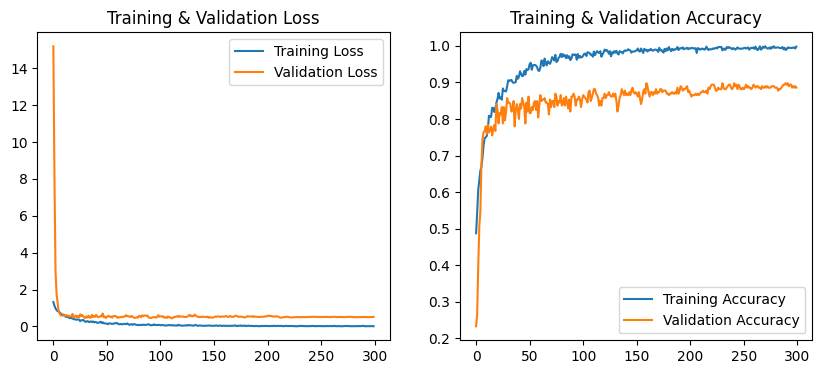



8/8 [==============================] - 0s 2ms/step


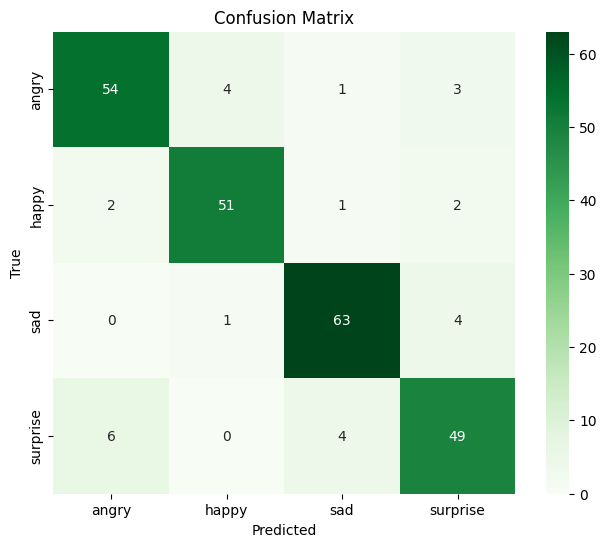



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.87      0.87      0.87        62
       happy       0.91      0.91      0.91        56
         sad       0.91      0.93      0.92        68
    surprise       0.84      0.83      0.84        59

    accuracy                           0.89       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.89      0.89      0.89       245



8/8 [==============================] - 0s 2ms/step


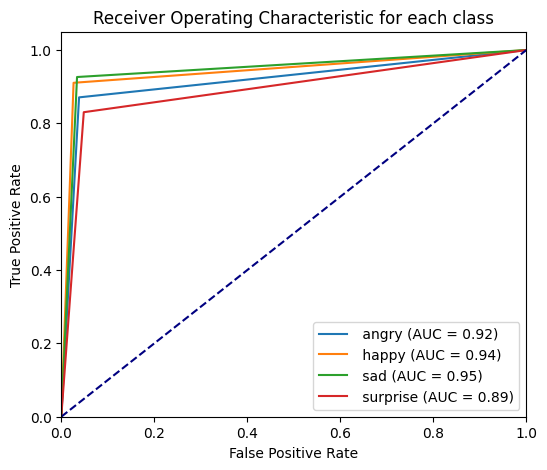

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=64)

Epoch 1/200
16/16 [==============================] - 6s 36ms/step - loss: 1.3745 - accuracy: 0.4413 - val_loss: 14.1221 - val_accuracy: 0.2327
Epoch 2/200
16/16 [==============================] - 0s 15ms/step - loss: 1.0292 - accuracy: 0.5771 - val_loss: 10.3095 - val_accuracy: 0.2327
Epoch 3/200
16/16 [==============================] - 0s 17ms/step - loss: 0.9012 - accuracy: 0.6272 - val_loss: 6.4376 - val_accuracy: 0.2490
Epoch 4/200
16/16 [==============================] - 0s 16ms/step - loss: 0.8873 - accuracy: 0.6272 - val_loss: 3.1998 - val_accuracy: 0.3102
Epoch 5/200
16/16 [==============================] - 0s 15ms/step - loss: 0.8228 - accuracy: 0.6813 - val_loss: 2.9010 - val_accuracy: 0.3388
Epoch 6/200
16/16 [==============================] - 0s 10ms/step - loss: 0.7146 - accuracy: 0.7079 - val_loss: 2.0305 - val_accuracy: 0.4041
Epoch 7/200
16/16 [==============================] - 0s 10ms/step - loss: 0.6869 - accuracy: 0.7303 - val_loss: 1.7047 - val_accuracy: 0.4735
Epoc

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.889795918367347
Precision: 0.8910317752423016
Recall: 0.8897446485428507
F1 Score: 0.8892163151240934




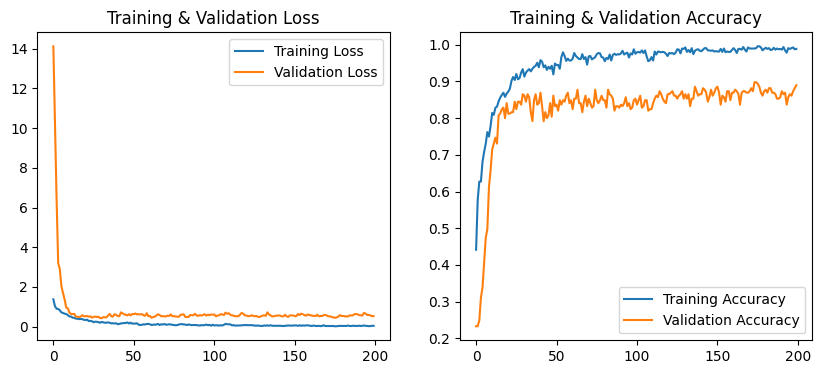



8/8 [==============================] - 0s 4ms/step


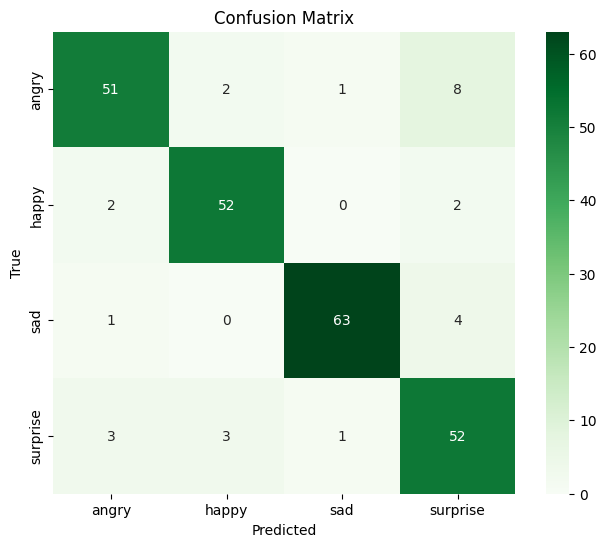



8/8 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       angry       0.89      0.82      0.86        62
       happy       0.91      0.93      0.92        56
         sad       0.97      0.93      0.95        68
    surprise       0.79      0.88      0.83        59

    accuracy                           0.89       245
   macro avg       0.89      0.89      0.89       245
weighted avg       0.89      0.89      0.89       245



8/8 [==============================] - 0s 4ms/step


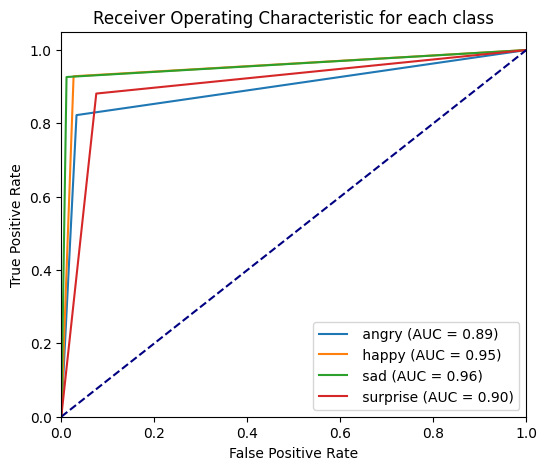

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test),batch_size=64)

Epoch 1/300
16/16 [==============================] - 6s 46ms/step - loss: 1.4166 - accuracy: 0.4300 - val_loss: 17.2780 - val_accuracy: 0.2327
Epoch 2/300
16/16 [==============================] - 0s 13ms/step - loss: 1.0493 - accuracy: 0.5700 - val_loss: 12.1704 - val_accuracy: 0.2408
Epoch 3/300
16/16 [==============================] - 0s 12ms/step - loss: 0.9621 - accuracy: 0.6129 - val_loss: 9.8761 - val_accuracy: 0.2531
Epoch 4/300
16/16 [==============================] - 0s 17ms/step - loss: 0.8663 - accuracy: 0.6435 - val_loss: 6.5585 - val_accuracy: 0.2776
Epoch 5/300
16/16 [==============================] - 0s 16ms/step - loss: 0.8029 - accuracy: 0.6844 - val_loss: 4.7308 - val_accuracy: 0.3224
Epoch 6/300
16/16 [==============================] - 0s 22ms/step - loss: 0.7533 - accuracy: 0.6854 - val_loss: 3.9208 - val_accuracy: 0.3673
Epoch 7/300
16/16 [==============================] - 0s 31ms/step - loss: 0.7045 - accuracy: 0.7201 - val_loss: 2.7279 - val_accuracy: 0.4245
Epoc

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.8734693877551021
Precision: 0.8737260927478319
Recall: 0.8722872281772195
F1 Score: 0.8726163989633835




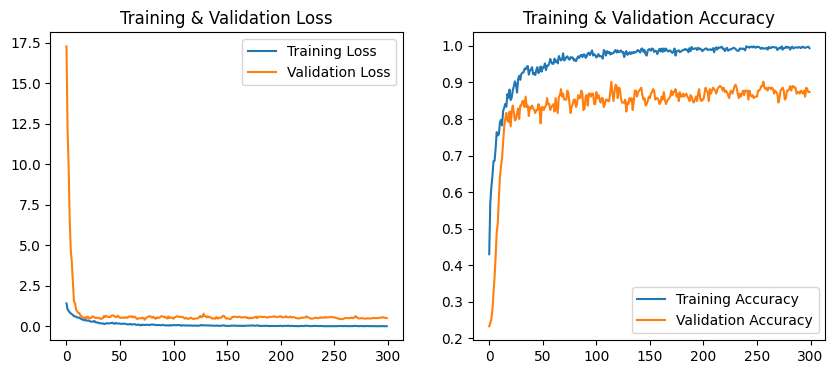



8/8 [==============================] - 0s 2ms/step


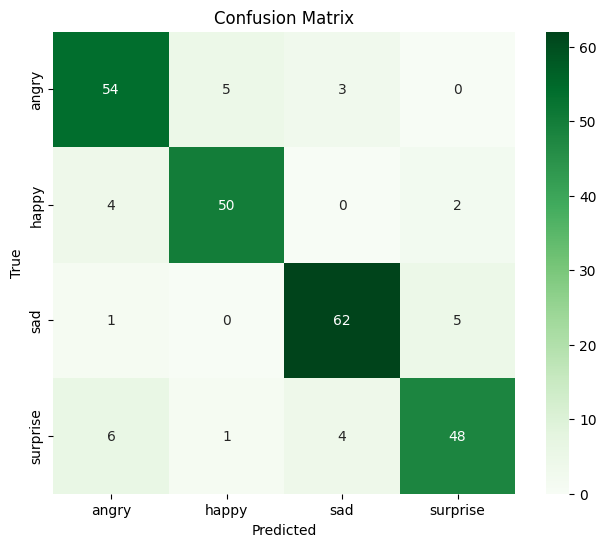



8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       angry       0.83      0.87      0.85        62
       happy       0.89      0.89      0.89        56
         sad       0.90      0.91      0.91        68
    surprise       0.87      0.81      0.84        59

    accuracy                           0.87       245
   macro avg       0.87      0.87      0.87       245
weighted avg       0.87      0.87      0.87       245



8/8 [==============================] - 0s 4ms/step


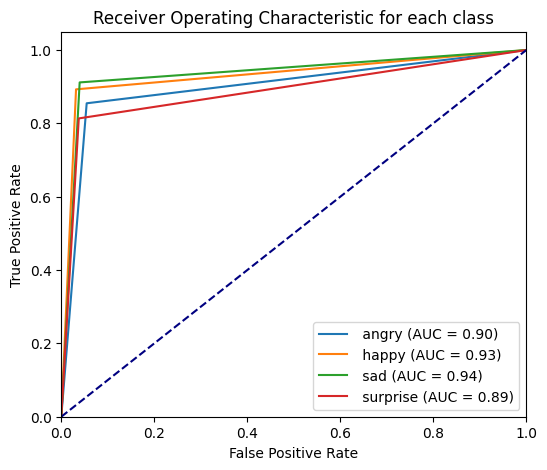

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 7s 29ms/step - loss: 1.3965 - accuracy: 0.4433 - val_loss: 10.4962 - val_accuracy: 0.2327
Epoch 2/200
31/31 [==============================] - 0s 10ms/step - loss: 1.1057 - accuracy: 0.5342 - val_loss: 5.8336 - val_accuracy: 0.2490
Epoch 3/200
31/31 [==============================] - 0s 9ms/step - loss: 1.0002 - accuracy: 0.5720 - val_loss: 2.3649 - val_accuracy: 0.3469
Epoch 4/200
31/31 [==============================] - 0s 10ms/step - loss: 0.9314 - accuracy: 0.6353 - val_loss: 1.6297 - val_accuracy: 0.4571
Epoch 5/200
31/31 [==============================] - 0s 9ms/step - loss: 0.8426 - accuracy: 0.6782 - val_loss: 1.2372 - val_accuracy: 0.5592
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 0.7773 - accuracy: 0.6854 - val_loss: 1.0402 - val_accuracy: 0.6490
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 0.7573 - accuracy: 0.7068 - val_loss: 0.7311 - val_accuracy: 0.7306
Epoch 8/2

8/8 [==============================] - 0s 5ms/step
Accuracy: 0.8775510204081632
Precision: 0.8809283776403642
Recall: 0.8766972412256319
F1 Score: 0.8773491214667686




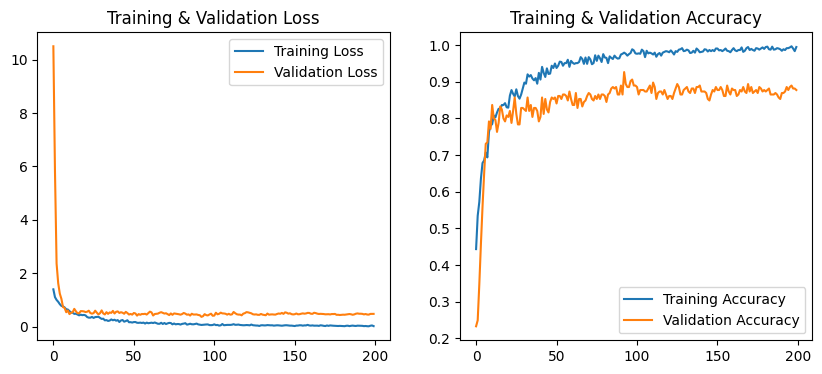



8/8 [==============================] - 0s 2ms/step


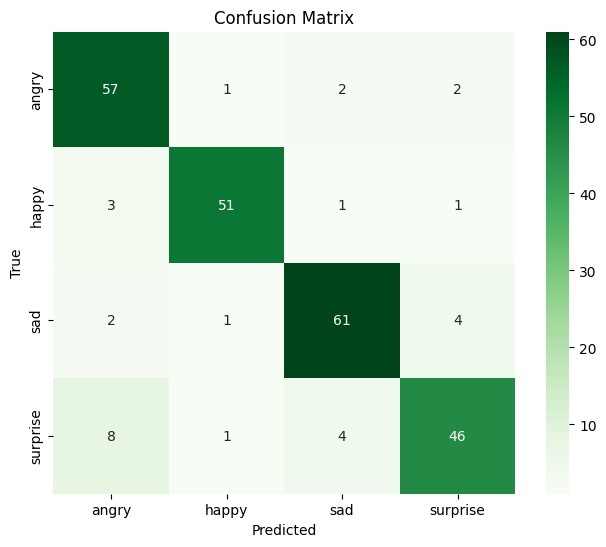



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.81      0.92      0.86        62
       happy       0.94      0.91      0.93        56
         sad       0.90      0.90      0.90        68
    surprise       0.87      0.78      0.82        59

    accuracy                           0.88       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.88      0.88      0.88       245



8/8 [==============================] - 0s 2ms/step


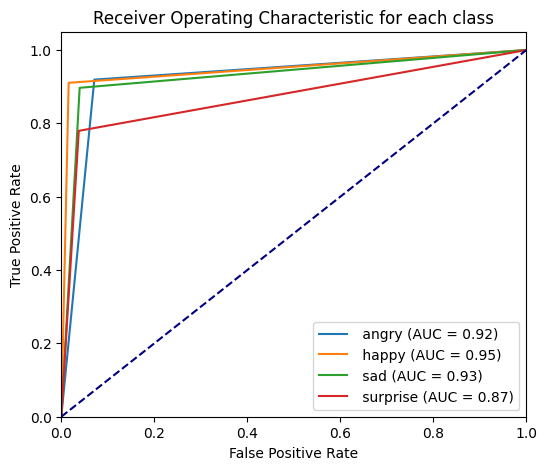

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(4, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 8s 42ms/step - loss: 1.3385 - accuracy: 0.4995 - val_loss: 7.7827 - val_accuracy: 0.2490
Epoch 2/200
31/31 [==============================] - 0s 10ms/step - loss: 0.9566 - accuracy: 0.6261 - val_loss: 6.2195 - val_accuracy: 0.2735
Epoch 3/200
31/31 [==============================] - 0s 9ms/step - loss: 0.8262 - accuracy: 0.6823 - val_loss: 2.2664 - val_accuracy: 0.3796
Epoch 4/200
31/31 [==============================] - 0s 11ms/step - loss: 0.7554 - accuracy: 0.7007 - val_loss: 1.8542 - val_accuracy: 0.4816
Epoch 5/200
31/31 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.7477 - val_loss: 1.1104 - val_accuracy: 0.6163
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 0.6361 - accuracy: 0.7559 - val_loss: 0.7598 - val_accuracy: 0.6898
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 0.6383 - accuracy: 0.7630 - val_loss: 0.5534 - val_accuracy: 0.7878
Epoch 8/2

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.8775510204081632
Precision: 0.8760198926978818
Recall: 0.8772274765565056
F1 Score: 0.8754881594045953




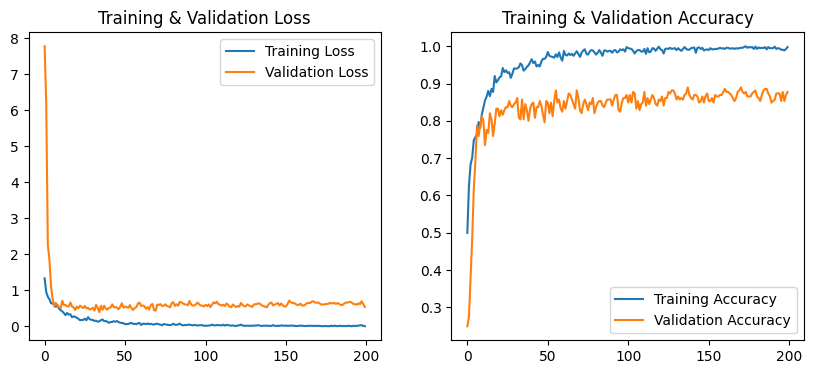



8/8 [==============================] - 0s 2ms/step


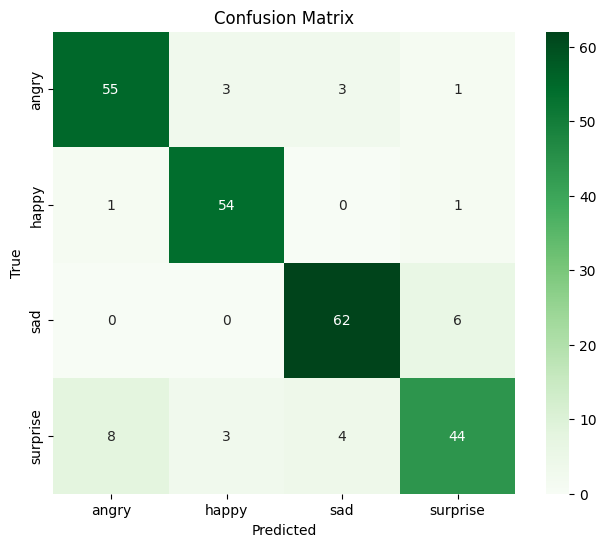



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.86      0.89      0.87        62
       happy       0.90      0.96      0.93        56
         sad       0.90      0.91      0.91        68
    surprise       0.85      0.75      0.79        59

    accuracy                           0.88       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.88      0.88      0.88       245



8/8 [==============================] - 0s 3ms/step


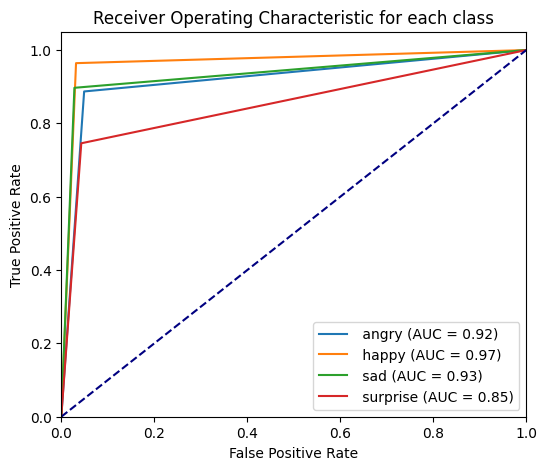

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(4, activation='softmax'))

initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 7s 17ms/step - loss: 1.6800 - accuracy: 0.3463 - val_loss: 3.3750 - val_accuracy: 0.2286
Epoch 2/200
31/31 [==============================] - 0s 8ms/step - loss: 1.2798 - accuracy: 0.4985 - val_loss: 2.8513 - val_accuracy: 0.2531
Epoch 3/200
31/31 [==============================] - 0s 9ms/step - loss: 1.0869 - accuracy: 0.5567 - val_loss: 2.1046 - val_accuracy: 0.3020
Epoch 4/200
31/31 [==============================] - 0s 8ms/step - loss: 0.9939 - accuracy: 0.6057 - val_loss: 1.5558 - val_accuracy: 0.4041
Epoch 5/200
31/31 [==============================] - 0s 9ms/step - loss: 0.9315 - accuracy: 0.6057 - val_loss: 1.1722 - val_accuracy: 0.4898
Epoch 6/200
31/31 [==============================] - 0s 8ms/step - loss: 0.8832 - accuracy: 0.6384 - val_loss: 0.9611 - val_accuracy: 0.5796
Epoch 7/200
31/31 [==============================] - 0s 9ms/step - loss: 0.7998 - accuracy: 0.6823 - val_loss: 0.8254 - val_accuracy: 0.6694
Epoch 8/200


8/8 [==============================] - 0s 2ms/step
Accuracy: 0.8857142857142857
Precision: 0.8883931135695249
Recall: 0.8869305103123808
F1 Score: 0.8871277195722436




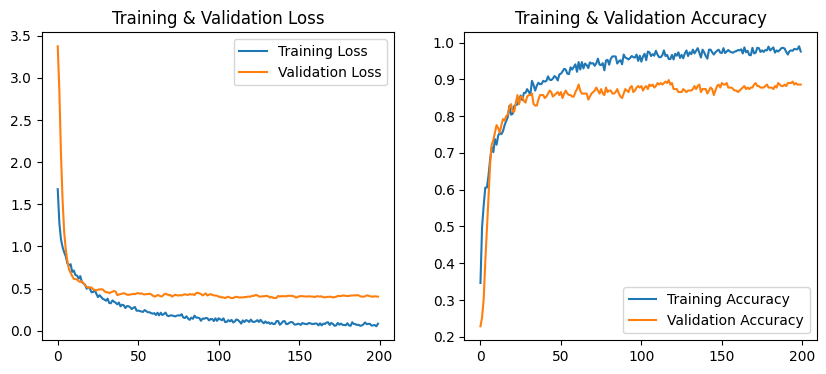



8/8 [==============================] - 0s 2ms/step


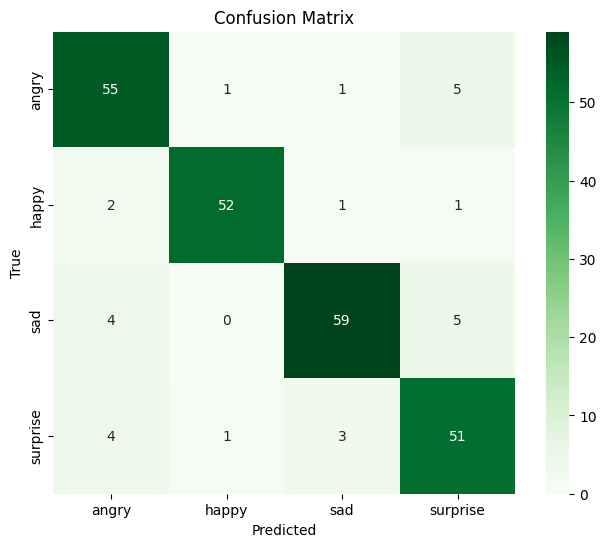



8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       angry       0.85      0.89      0.87        62
       happy       0.96      0.93      0.95        56
         sad       0.92      0.87      0.89        68
    surprise       0.82      0.86      0.84        59

    accuracy                           0.89       245
   macro avg       0.89      0.89      0.89       245
weighted avg       0.89      0.89      0.89       245



8/8 [==============================] - 0s 2ms/step


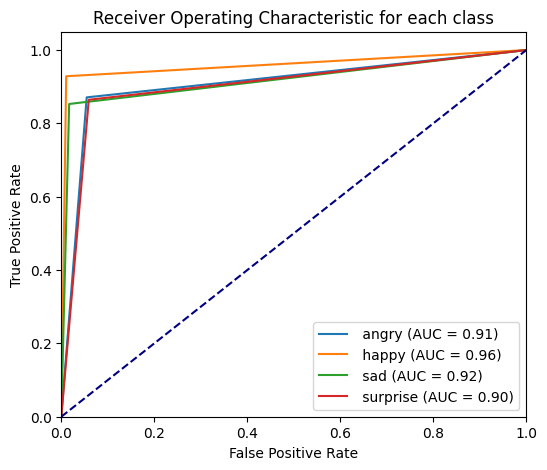

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(4, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 7s 26ms/step - loss: 1.4217 - accuracy: 0.4362 - val_loss: 6.8684 - val_accuracy: 0.2327
Epoch 2/200
31/31 [==============================] - 0s 14ms/step - loss: 1.0592 - accuracy: 0.5444 - val_loss: 4.3551 - val_accuracy: 0.2653
Epoch 3/200
31/31 [==============================] - 1s 31ms/step - loss: 0.9402 - accuracy: 0.6292 - val_loss: 1.8684 - val_accuracy: 0.4041
Epoch 4/200
31/31 [==============================] - 0s 11ms/step - loss: 0.8959 - accuracy: 0.6425 - val_loss: 1.2481 - val_accuracy: 0.4735
Epoch 5/200
31/31 [==============================] - 0s 10ms/step - loss: 0.7839 - accuracy: 0.6864 - val_loss: 1.0231 - val_accuracy: 0.6449
Epoch 6/200
31/31 [==============================] - 0s 9ms/step - loss: 0.7077 - accuracy: 0.7242 - val_loss: 0.8170 - val_accuracy: 0.6694
Epoch 7/200
31/31 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.7242 - val_loss: 0.7486 - val_accuracy: 0.6980
Epoch 8

8/8 [==============================] - 0s 4ms/step
Accuracy: 0.889795918367347
Precision: 0.8889867898913951
Recall: 0.8877809256562111
F1 Score: 0.8878460580076586




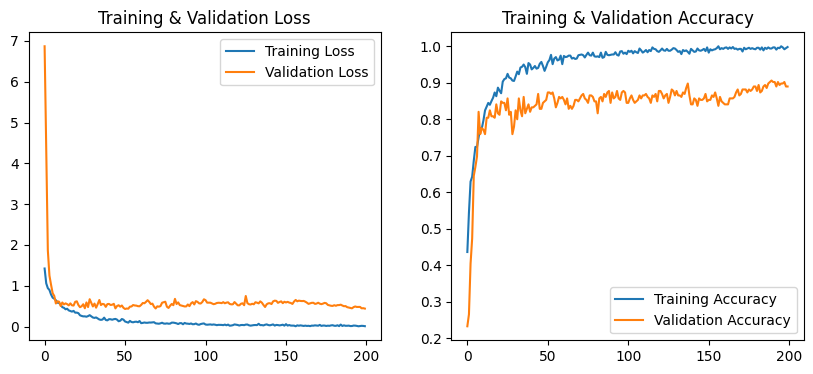



8/8 [==============================] - 0s 5ms/step


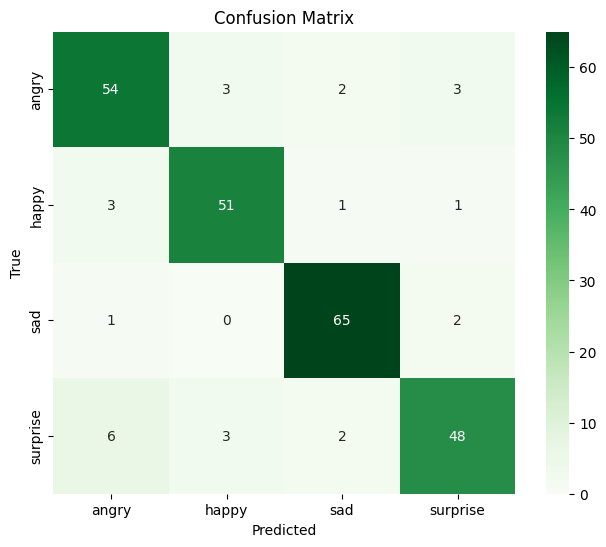



8/8 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

       angry       0.84      0.87      0.86        62
       happy       0.89      0.91      0.90        56
         sad       0.93      0.96      0.94        68
    surprise       0.89      0.81      0.85        59

    accuracy                           0.89       245
   macro avg       0.89      0.89      0.89       245
weighted avg       0.89      0.89      0.89       245



8/8 [==============================] - 0s 6ms/step


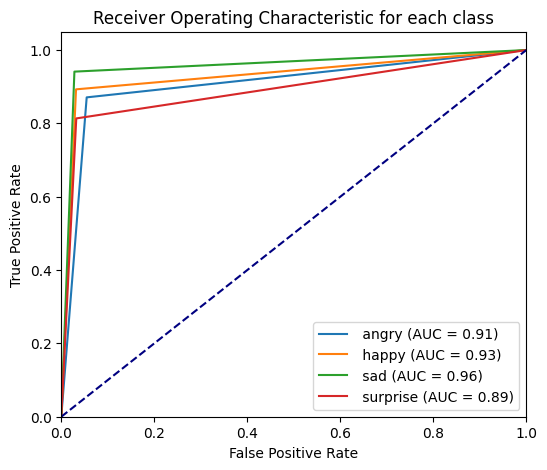

In [ ]:
results()

In [ ]:
model = Sequential()
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(4, activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/200
31/31 [==============================] - 10s 20ms/step - loss: 1.4302 - accuracy: 0.4025 - val_loss: 5.4239 - val_accuracy: 0.1388
Epoch 2/200
31/31 [==============================] - 0s 10ms/step - loss: 1.1453 - accuracy: 0.5199 - val_loss: 3.0707 - val_accuracy: 0.1510
Epoch 3/200
31/31 [==============================] - 0s 11ms/step - loss: 1.0434 - accuracy: 0.5444 - val_loss: 2.5184 - val_accuracy: 0.3061
Epoch 4/200
31/31 [==============================] - 0s 11ms/step - loss: 0.9817 - accuracy: 0.5751 - val_loss: 1.5940 - val_accuracy: 0.4286
Epoch 5/200
31/31 [==============================] - 0s 11ms/step - loss: 0.8855 - accuracy: 0.6415 - val_loss: 1.1472 - val_accuracy: 0.4816
Epoch 6/200
31/31 [==============================] - 0s 11ms/step - loss: 0.8739 - accuracy: 0.6445 - val_loss: 0.9671 - val_accuracy: 0.6327
Epoch 7/200
31/31 [==============================] - 0s 11ms/step - loss: 0.7646 - accuracy: 0.6956 - val_loss: 0.7899 - val_accuracy: 0.6939
Epoch

8/8 [==============================] - 0s 3ms/step
Accuracy: 0.8816326530612245
Precision: 0.8819834448317421
Recall: 0.8801247467275592
F1 Score: 0.8803949394239776




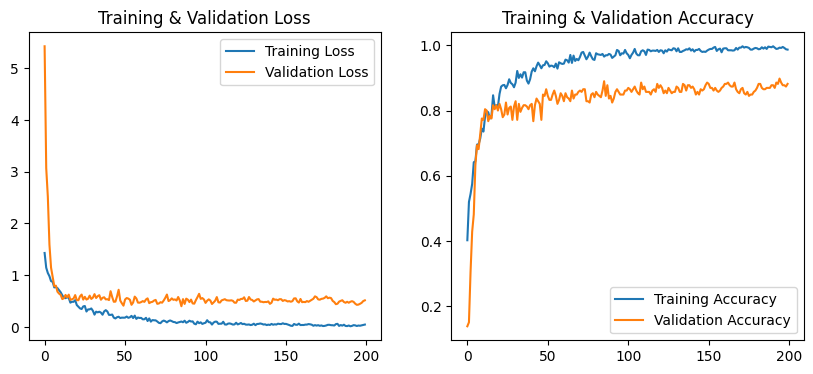



8/8 [==============================] - 0s 2ms/step


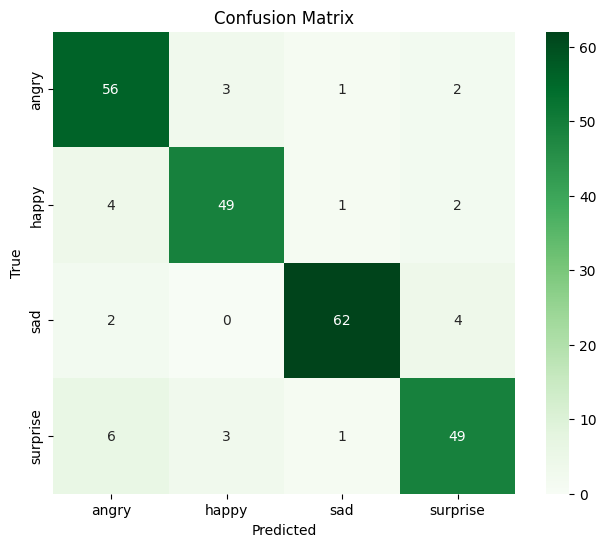



8/8 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.82      0.90      0.86        62
       happy       0.89      0.88      0.88        56
         sad       0.95      0.91      0.93        68
    surprise       0.86      0.83      0.84        59

    accuracy                           0.88       245
   macro avg       0.88      0.88      0.88       245
weighted avg       0.88      0.88      0.88       245



8/8 [==============================] - 0s 3ms/step


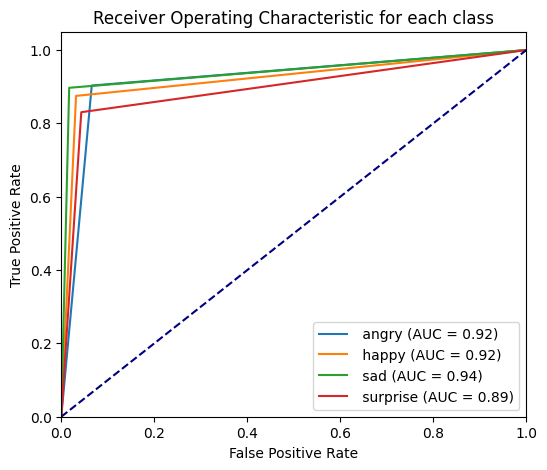

In [ ]:
results()

##**LSTM**

###**60-40**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from keras.layers import LSTM, Dense, Activation, BatchNormalization, Dropout, Flatten, Concatenate
from keras import Input, Model
import tensorflow as tf

inputs = Input(shape=(X_train.shape[1], 1))
lstm_out_1 = LSTM(128, return_sequences=True)(inputs)
lstm_out_1 = Dropout(0.5)(lstm_out_1)
lstm_out_1 = BatchNormalization()(lstm_out_1)

lstm_out_2 = LSTM(128, return_sequences=True)(lstm_out_1)
lstm_out_2 = Dropout(0.5)(lstm_out_2)
lstm_out_2 = BatchNormalization()(lstm_out_2)

context_vector = tf.keras.layers.Attention()([lstm_out_2, lstm_out_2])

flattened = Flatten()(context_vector)

output = Dense(256, activation='relu')(flattened)
output = Dense(128, activation='relu')(output)
output = Dense(64, activation='relu')(output)
output = Dense(4, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
epochs = 100
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/100
23/23 [==============================] - 54s 51ms/step - loss: 1.4625 - accuracy: 0.3406 - val_loss: 1.3558 - val_accuracy: 0.2633
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 1.2121 - accuracy: 0.4469 - val_loss: 1.2921 - val_accuracy: 0.3878
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 1.1986 - accuracy: 0.4523 - val_loss: 1.2376 - val_accuracy: 0.4449
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 1.1327 - accuracy: 0.5068 - val_loss: 1.2328 - val_accuracy: 0.4490
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 1.0438 - accuracy: 0.5409 - val_loss: 1.2137 - val_accuracy: 0.4224
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 0.9810 - accuracy: 0.5477 - val_loss: 1.0669 - val_accuracy: 0.5245
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.9190 - accuracy: 0.6063 - val_loss: 1.0402 - val_accuracy: 0.5653
Epoch

16/16 [==============================] - 1s 4ms/step
Accuracy: 0.6877551020408164
Precision: 0.7231049099544773
Recall: 0.6856261262660784
F1 Score: 0.6836156594054752




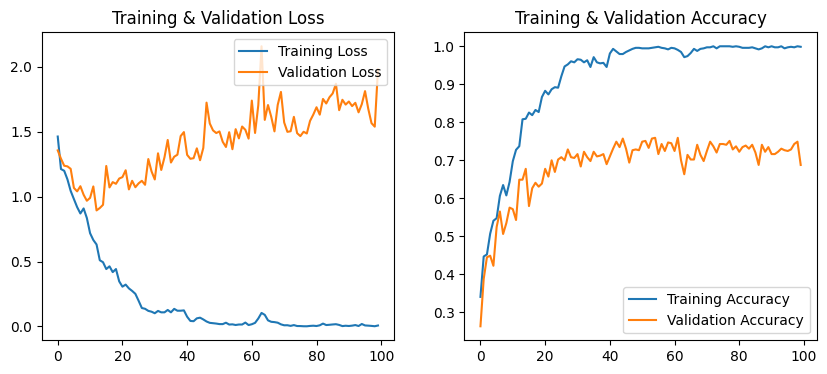



16/16 [==============================] - 0s 4ms/step


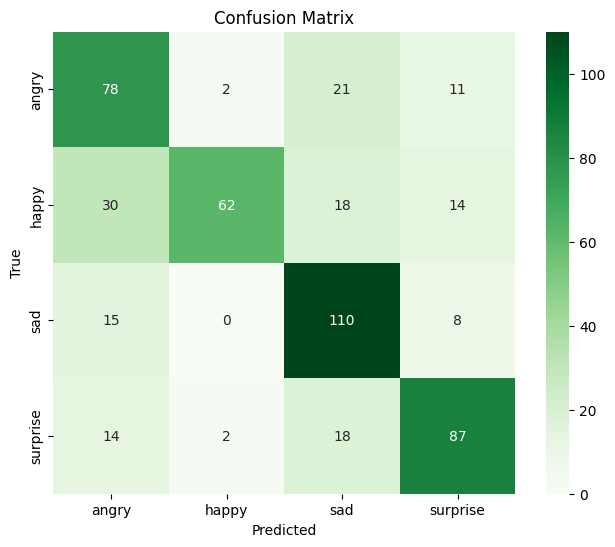



16/16 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       angry       0.57      0.70      0.63       112
       happy       0.94      0.50      0.65       124
         sad       0.66      0.83      0.73       133
    surprise       0.72      0.72      0.72       121

    accuracy                           0.69       490
   macro avg       0.72      0.69      0.68       490
weighted avg       0.73      0.69      0.69       490



16/16 [==============================] - 0s 4ms/step


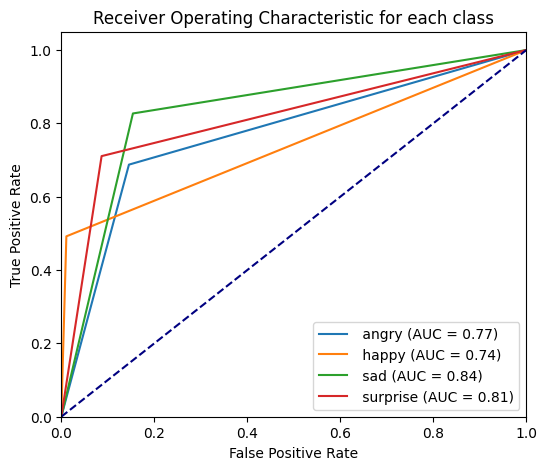

In [ ]:
results()

###**70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from keras.layers import LSTM, Dense, Activation, BatchNormalization, Dropout, Flatten, Concatenate
from keras import Input, Model
import tensorflow as tf

inputs = Input(shape=(X_train.shape[1], 1))
lstm_out_1 = LSTM(128, return_sequences=True)(inputs)
lstm_out_1 = Dropout(0.5)(lstm_out_1)
lstm_out_1 = BatchNormalization()(lstm_out_1)

lstm_out_2 = LSTM(128, return_sequences=True)(lstm_out_1)
lstm_out_2 = Dropout(0.5)(lstm_out_2)
lstm_out_2 = BatchNormalization()(lstm_out_2)

context_vector = tf.keras.layers.Attention()([lstm_out_2, lstm_out_2])

flattened = Flatten()(context_vector)

output = Dense(256, activation='relu')(flattened)
output = Dense(128, activation='relu')(output)
output = Dense(64, activation='relu')(output)
output = Dense(4, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
epochs = 100
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/100
27/27 [==============================] - 7s 60ms/step - loss: 1.3992 - accuracy: 0.3551 - val_loss: 1.3834 - val_accuracy: 0.2935
Epoch 2/100
27/27 [==============================] - 1s 21ms/step - loss: 1.2188 - accuracy: 0.4404 - val_loss: 1.3218 - val_accuracy: 0.3451
Epoch 3/100
27/27 [==============================] - 0s 12ms/step - loss: 1.1461 - accuracy: 0.4930 - val_loss: 1.2832 - val_accuracy: 0.4022
Epoch 4/100
27/27 [==============================] - 0s 12ms/step - loss: 1.1381 - accuracy: 0.4708 - val_loss: 1.1514 - val_accuracy: 0.5272
Epoch 5/100
27/27 [==============================] - 0s 13ms/step - loss: 1.0055 - accuracy: 0.5584 - val_loss: 1.1100 - val_accuracy: 0.4946
Epoch 6/100
27/27 [==============================] - 0s 12ms/step - loss: 0.9456 - accuracy: 0.5888 - val_loss: 1.0806 - val_accuracy: 0.5082
Epoch 7/100
27/27 [==============================] - 0s 12ms/step - loss: 0.9068 - accuracy: 0.6063 - val_loss: 0.9849 - val_accuracy: 0.5571
Epoch 

12/12 [==============================] - 1s 4ms/step
Accuracy: 0.7690217391304348
Precision: 0.7660439968486672
Recall: 0.7677339853095374
F1 Score: 0.7662829710341804




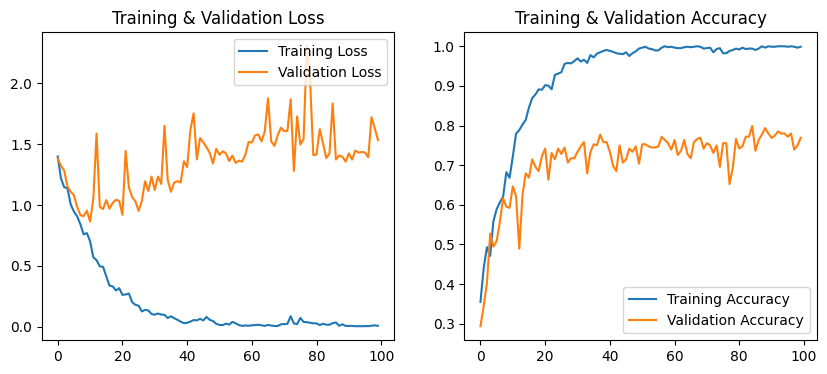



12/12 [==============================] - 0s 5ms/step


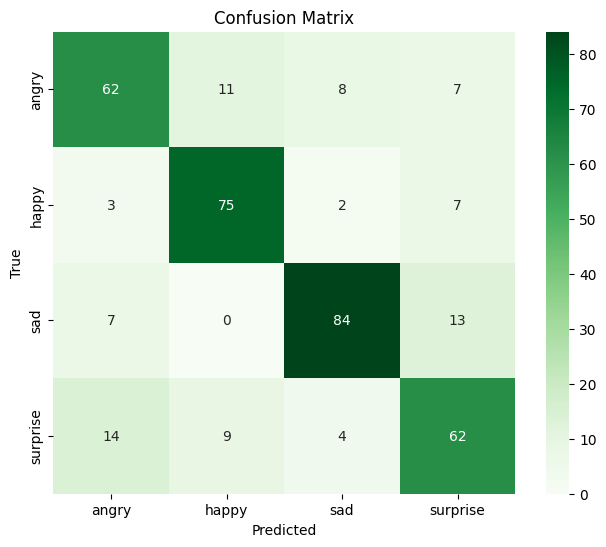



12/12 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       angry       0.72      0.70      0.71        88
       happy       0.79      0.86      0.82        87
         sad       0.86      0.81      0.83       104
    surprise       0.70      0.70      0.70        89

    accuracy                           0.77       368
   macro avg       0.77      0.77      0.77       368
weighted avg       0.77      0.77      0.77       368



12/12 [==============================] - 0s 6ms/step


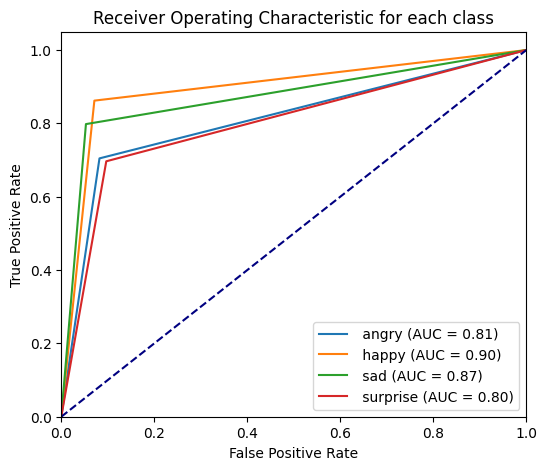

In [ ]:
results()

###**80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

####**Highest Acc of LSTM**

In [ ]:
from keras.layers import LSTM, Dense, Activation, BatchNormalization, Dropout, Flatten, Concatenate
from keras import Input, Model
import tensorflow as tf

inputs = Input(shape=(X_train.shape[1], 1))
lstm_out_1 = LSTM(128, return_sequences=True)(inputs)
lstm_out_1 = Dropout(0.5)(lstm_out_1)
lstm_out_1 = BatchNormalization()(lstm_out_1)

lstm_out_2 = LSTM(128, return_sequences=True)(lstm_out_1)
lstm_out_2 = Dropout(0.5)(lstm_out_2)
lstm_out_2 = BatchNormalization()(lstm_out_2)

context_vector = tf.keras.layers.Attention()([lstm_out_2, lstm_out_2])

flattened = Flatten()(context_vector)

output = Dense(256, activation='relu')(flattened)
output = Dense(128, activation='relu')(output)
output = Dense(64, activation='relu')(output)
output = Dense(4, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=300, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
epochs = 100
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),batch_size=32)

Epoch 1/100
31/31 [==============================] - 11s 67ms/step - loss: 1.3466 - accuracy: 0.3718 - val_loss: 1.3455 - val_accuracy: 0.2980
Epoch 2/100
31/31 [==============================] - 1s 23ms/step - loss: 1.2400 - accuracy: 0.4157 - val_loss: 1.3082 - val_accuracy: 0.4163
Epoch 3/100
31/31 [==============================] - 1s 26ms/step - loss: 1.0817 - accuracy: 0.5056 - val_loss: 1.2015 - val_accuracy: 0.4531
Epoch 4/100
31/31 [==============================] - 1s 25ms/step - loss: 1.0251 - accuracy: 0.5628 - val_loss: 1.1156 - val_accuracy: 0.4694
Epoch 5/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9054 - accuracy: 0.6139 - val_loss: 0.9545 - val_accuracy: 0.6041
Epoch 6/100
31/31 [==============================] - 1s 22ms/step - loss: 0.8801 - accuracy: 0.6547 - val_loss: 0.9077 - val_accuracy: 0.6082
Epoch 7/100
31/31 [==============================] - 1s 19ms/step - loss: 0.8064 - accuracy: 0.6711 - val_loss: 0.9046 - val_accuracy: 0.5878
Epoch

8/8 [==============================] - 1s 4ms/step
Accuracy: 0.7918367346938775
Precision: 0.7925396705384573
Recall: 0.7897291707825831
F1 Score: 0.7908768232253323




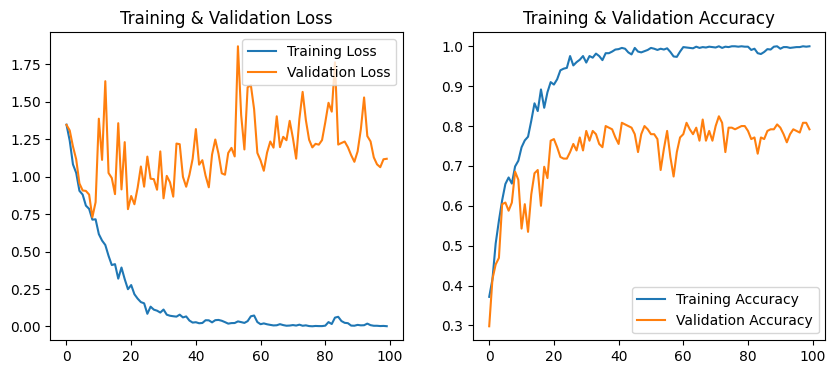



8/8 [==============================] - 0s 5ms/step


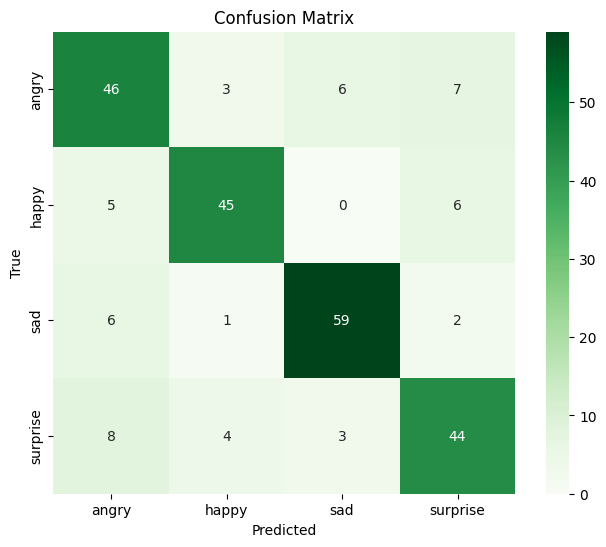



8/8 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       angry       0.71      0.74      0.72        62
       happy       0.85      0.80      0.83        56
         sad       0.87      0.87      0.87        68
    surprise       0.75      0.75      0.75        59

    accuracy                           0.79       245
   macro avg       0.79      0.79      0.79       245
weighted avg       0.79      0.79      0.79       245



8/8 [==============================] - 0s 5ms/step


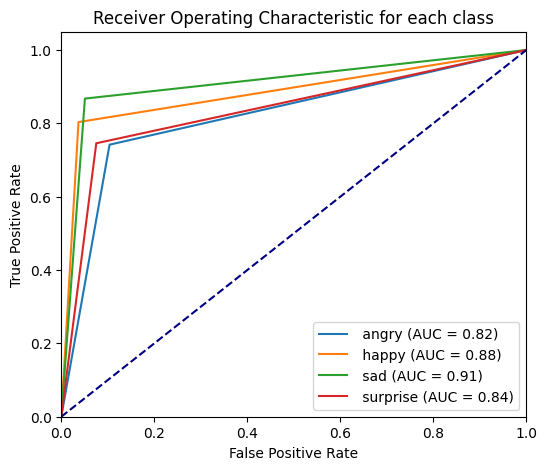

In [ ]:
results()

##**Machine Learning**

###**60-40**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

def model_comparison(X_train, y_train, X_test, y_test, emotions):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
        "Random Forest": RandomForestClassifier(n_estimators=500),
        "Multi-Layer Perceptron": MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400),
        "Support Vector Machine": SVC(probability=True)
    }

    # Reshape input data if necessary
    if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        print(f"Evaluating {name}...")
        y_pred = model.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='macro'))
        print("Recall:", recall_score(y_test, y_pred, average='macro'))
        print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=np.unique(emotions)))

        # ROC curve
        if len(np.unique(y_test)) > 2:
            y_pred_proba = model.predict_proba(X_test)
            n_classes = len(np.unique(y_test))
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            plt.figure(figsize=(6, 5))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()

        print("\n\n")


Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.5816326530612245
Precision: 0.5850736602345842
Recall: 0.5770432082772915
F1 Score: 0.579386213031717


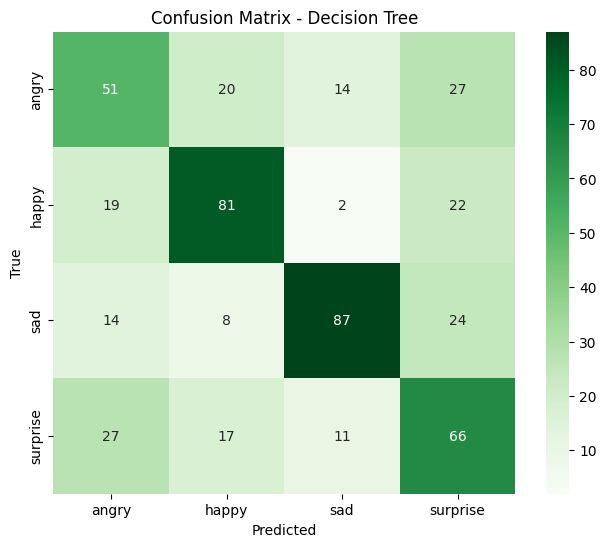

Classification Report:
              precision    recall  f1-score   support

       angry       0.46      0.46      0.46       112
       happy       0.64      0.65      0.65       124
         sad       0.76      0.65      0.70       133
    surprise       0.47      0.55      0.51       121

    accuracy                           0.58       490
   macro avg       0.59      0.58      0.58       490
weighted avg       0.59      0.58      0.59       490



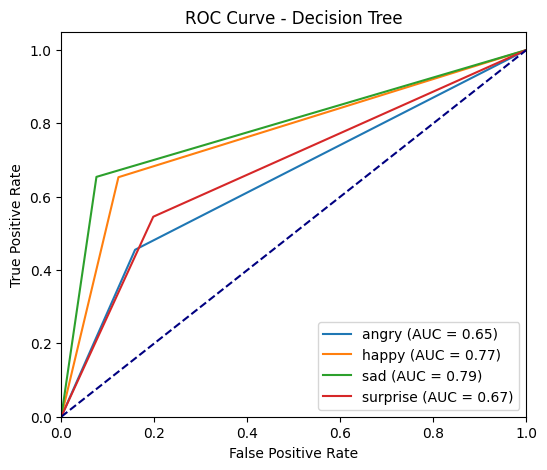




Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy: 0.7387755102040816
Precision: 0.7826002473061296
Recall: 0.7409554820468928
F1 Score: 0.7354637238899534


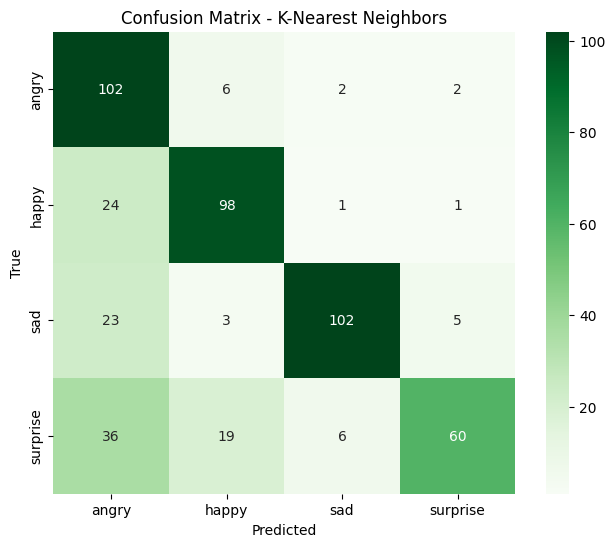

Classification Report:
              precision    recall  f1-score   support

       angry       0.55      0.91      0.69       112
       happy       0.78      0.79      0.78       124
         sad       0.92      0.77      0.84       133
    surprise       0.88      0.50      0.63       121

    accuracy                           0.74       490
   macro avg       0.78      0.74      0.74       490
weighted avg       0.79      0.74      0.74       490



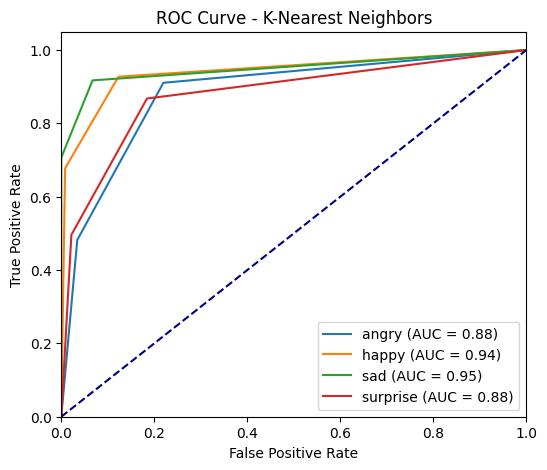




Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.8040816326530612
Precision: 0.8062107926213513
Recall: 0.8025376190409375
F1 Score: 0.8004849272463185


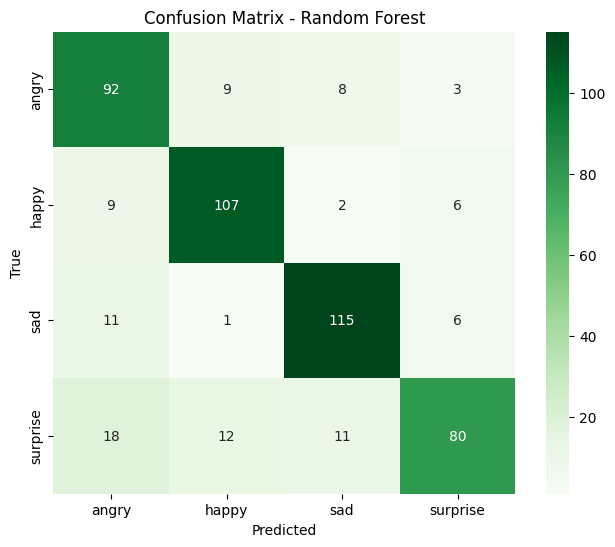

Classification Report:
              precision    recall  f1-score   support

       angry       0.71      0.82      0.76       112
       happy       0.83      0.86      0.85       124
         sad       0.85      0.86      0.86       133
    surprise       0.84      0.66      0.74       121

    accuracy                           0.80       490
   macro avg       0.81      0.80      0.80       490
weighted avg       0.81      0.80      0.80       490



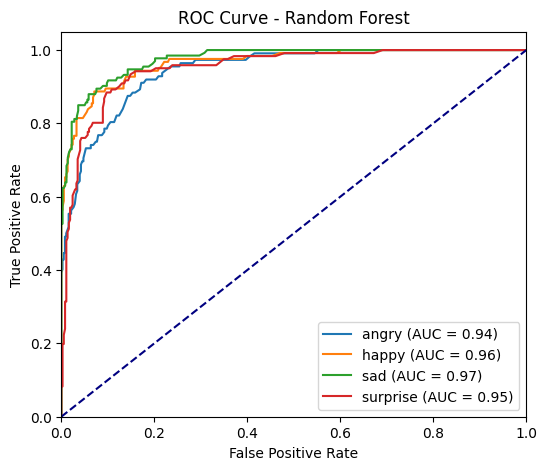




Training Multi-Layer Perceptron...
Evaluating Multi-Layer Perceptron...
Accuracy: 0.8142857142857143
Precision: 0.8134380362354866
Recall: 0.8126471098935021
F1 Score: 0.8121793248273748


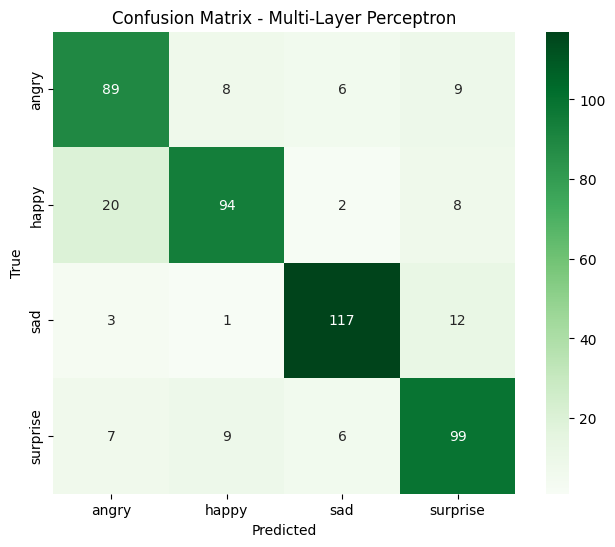

Classification Report:
              precision    recall  f1-score   support

       angry       0.75      0.79      0.77       112
       happy       0.84      0.76      0.80       124
         sad       0.89      0.88      0.89       133
    surprise       0.77      0.82      0.80       121

    accuracy                           0.81       490
   macro avg       0.81      0.81      0.81       490
weighted avg       0.82      0.81      0.81       490



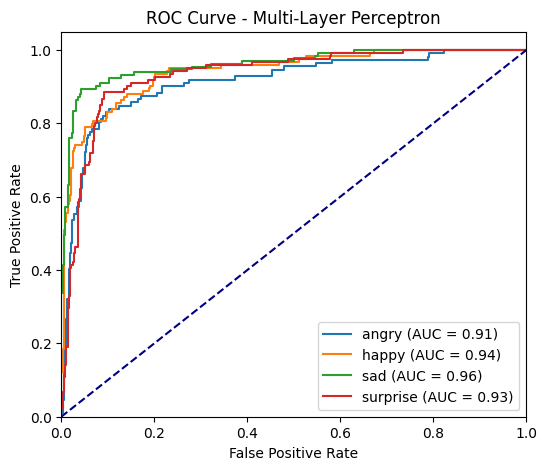




Training Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.6408163265306123
Precision: 0.6264109153579307
Recall: 0.6336630407329975
F1 Score: 0.6249087385217523


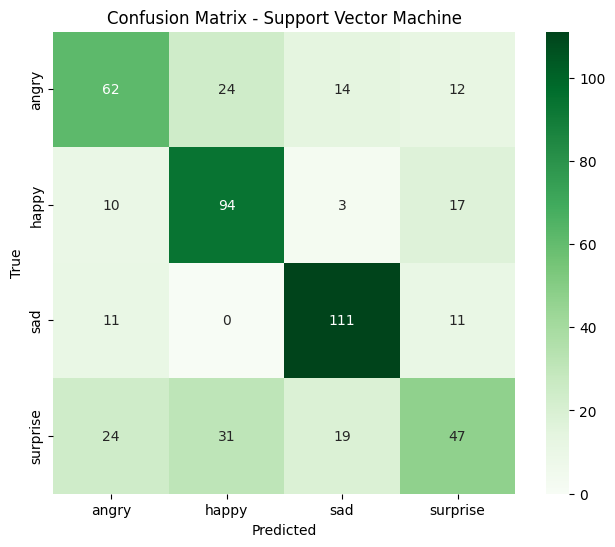

Classification Report:
              precision    recall  f1-score   support

       angry       0.58      0.55      0.57       112
       happy       0.63      0.76      0.69       124
         sad       0.76      0.83      0.79       133
    surprise       0.54      0.39      0.45       121

    accuracy                           0.64       490
   macro avg       0.63      0.63      0.62       490
weighted avg       0.63      0.64      0.63       490



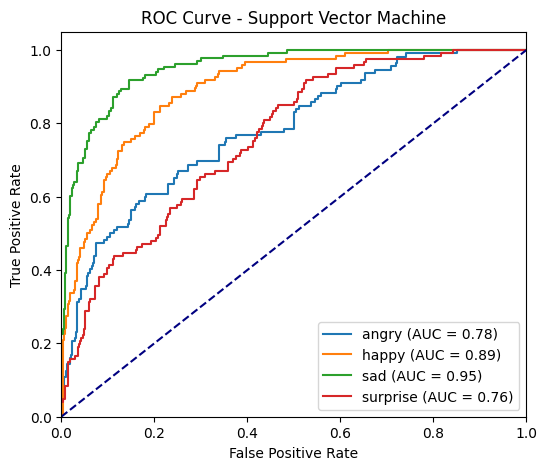

In [ ]:
model_comparison(X_train, y_train, X_test, y_test, emotions)

###**70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

def model_comparison(X_train, y_train, X_test, y_test, emotions):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
        "Random Forest": RandomForestClassifier(n_estimators=500),
        "Multi-Layer Perceptron": MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400),
        "Support Vector Machine": SVC(probability=True)
    }

    # Reshape input data if necessary
    if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        print(f"Evaluating {name}...")
        y_pred = model.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='macro'))
        print("Recall:", recall_score(y_test, y_pred, average='macro'))
        print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=np.unique(emotions)))

        # ROC curve
        if len(np.unique(y_test)) > 2:
            y_pred_proba = model.predict_proba(X_test)
            n_classes = len(np.unique(y_test))
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            plt.figure(figsize=(6, 5))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()

        print("\n\n")


Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.5543478260869565
Precision: 0.5502767391735746
Recall: 0.5479957534393799
F1 Score: 0.5487223988821728


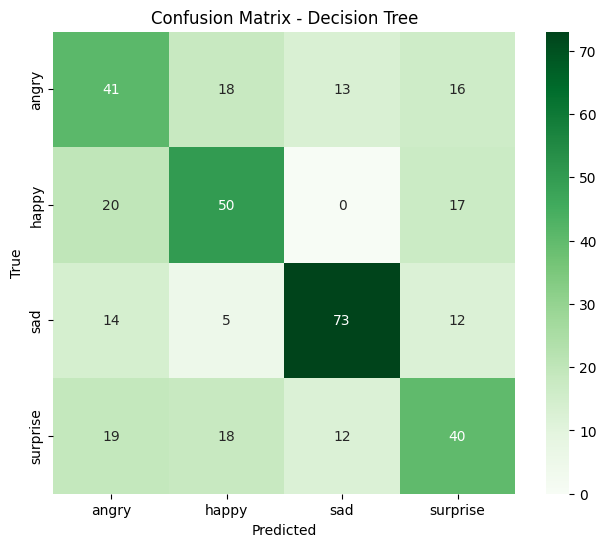

Classification Report:
              precision    recall  f1-score   support

       angry       0.44      0.47      0.45        88
       happy       0.55      0.57      0.56        87
         sad       0.74      0.70      0.72       104
    surprise       0.47      0.45      0.46        89

    accuracy                           0.55       368
   macro avg       0.55      0.55      0.55       368
weighted avg       0.56      0.55      0.56       368



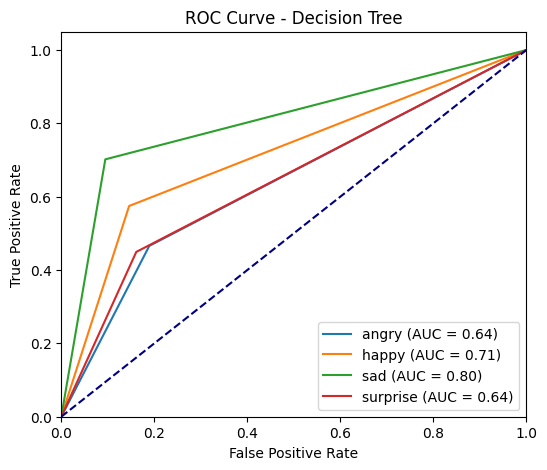




Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy: 0.7527173913043478
Precision: 0.7863903888082721
Recall: 0.7533185286236429
F1 Score: 0.747550825763009


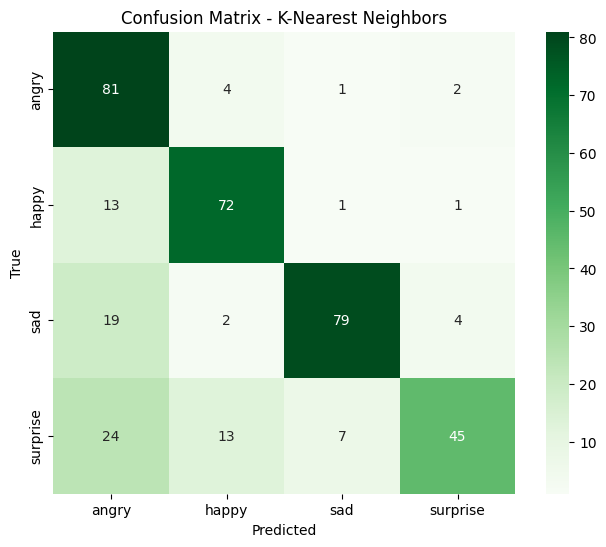

Classification Report:
              precision    recall  f1-score   support

       angry       0.59      0.92      0.72        88
       happy       0.79      0.83      0.81        87
         sad       0.90      0.76      0.82       104
    surprise       0.87      0.51      0.64        89

    accuracy                           0.75       368
   macro avg       0.79      0.75      0.75       368
weighted avg       0.79      0.75      0.75       368



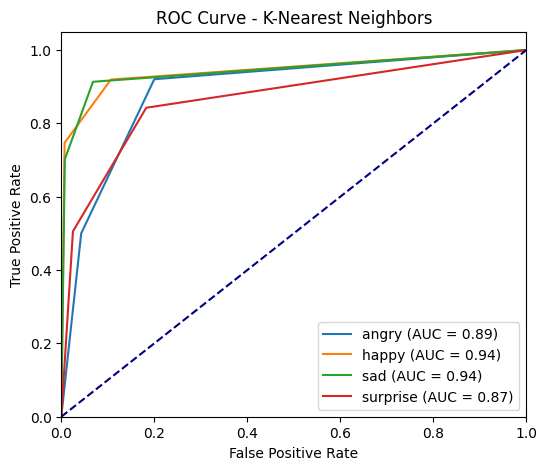




Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.8152173913043478
Precision: 0.8124898462350763
Recall: 0.8117894269942895
F1 Score: 0.8096166445304376


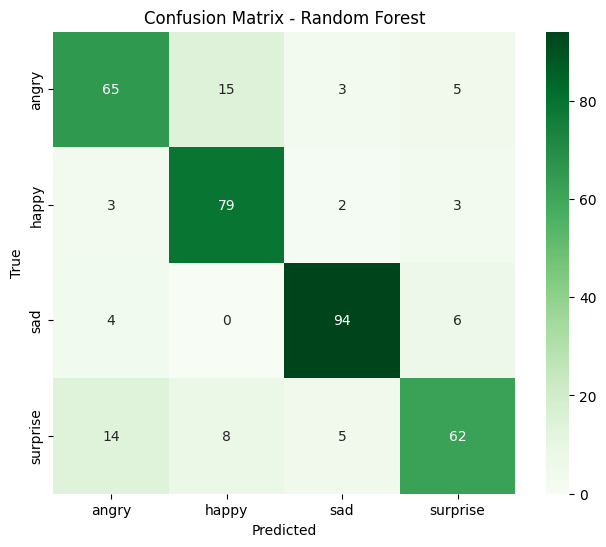

Classification Report:
              precision    recall  f1-score   support

       angry       0.76      0.74      0.75        88
       happy       0.77      0.91      0.84        87
         sad       0.90      0.90      0.90       104
    surprise       0.82      0.70      0.75        89

    accuracy                           0.82       368
   macro avg       0.81      0.81      0.81       368
weighted avg       0.82      0.82      0.81       368



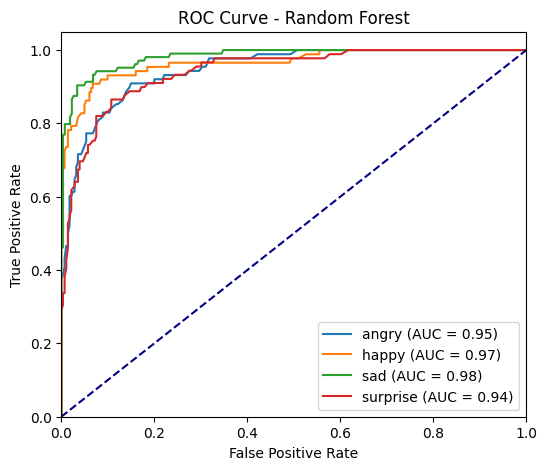




Training Multi-Layer Perceptron...
Evaluating Multi-Layer Perceptron...
Accuracy: 0.7934782608695652
Precision: 0.7908696538120003
Recall: 0.7894317075472636
F1 Score: 0.78776793927656


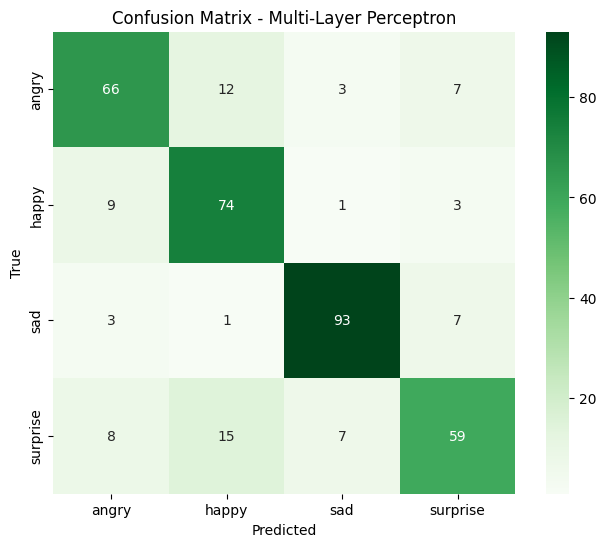

Classification Report:
              precision    recall  f1-score   support

       angry       0.77      0.75      0.76        88
       happy       0.73      0.85      0.78        87
         sad       0.89      0.89      0.89       104
    surprise       0.78      0.66      0.72        89

    accuracy                           0.79       368
   macro avg       0.79      0.79      0.79       368
weighted avg       0.80      0.79      0.79       368



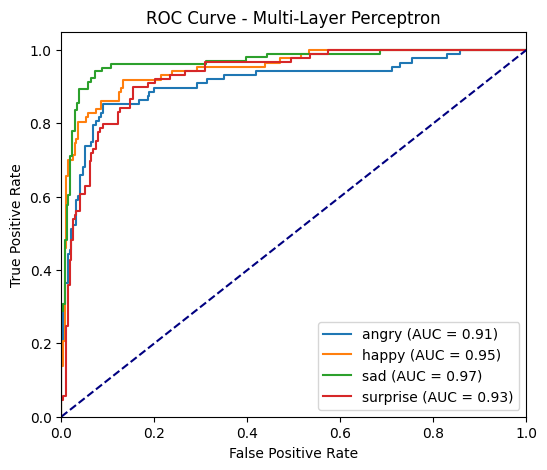




Training Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.6630434782608695
Precision: 0.6512027716177635
Recall: 0.6544811736113557
F1 Score: 0.6448383254725008


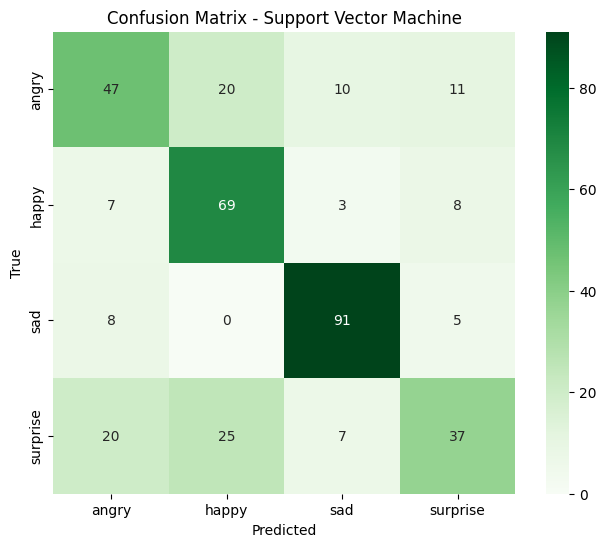

Classification Report:
              precision    recall  f1-score   support

       angry       0.57      0.53      0.55        88
       happy       0.61      0.79      0.69        87
         sad       0.82      0.88      0.85       104
    surprise       0.61      0.42      0.49        89

    accuracy                           0.66       368
   macro avg       0.65      0.65      0.64       368
weighted avg       0.66      0.66      0.65       368



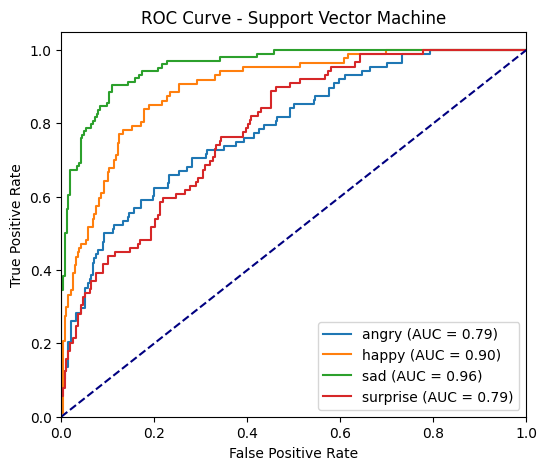

In [ ]:
model_comparison(X_train, y_train, X_test, y_test, emotions)

###**80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

def model_comparison(X_train, y_train, X_test, y_test, emotions):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
        "Random Forest": RandomForestClassifier(n_estimators=500),
        "Multi-Layer Perceptron": MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400),
        "Support Vector Machine": SVC(probability=True)
    }

    # Reshape input data if necessary
    if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        print(f"Evaluating {name}...")
        y_pred = model.predict(X_test)

        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='macro'))
        print("Recall:", recall_score(y_test, y_pred, average='macro'))
        print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=np.unique(emotions)))

        # ROC curve
        if len(np.unique(y_test)) > 2:
            y_pred_proba = model.predict_proba(X_test)
            n_classes = len(np.unique(y_test))
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            plt.figure(figsize=(6, 5))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()

        print("\n\n")


Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.6204081632653061
Precision: 0.6360797889186973
Recall: 0.6203571026551682
F1 Score: 0.6249032655108382


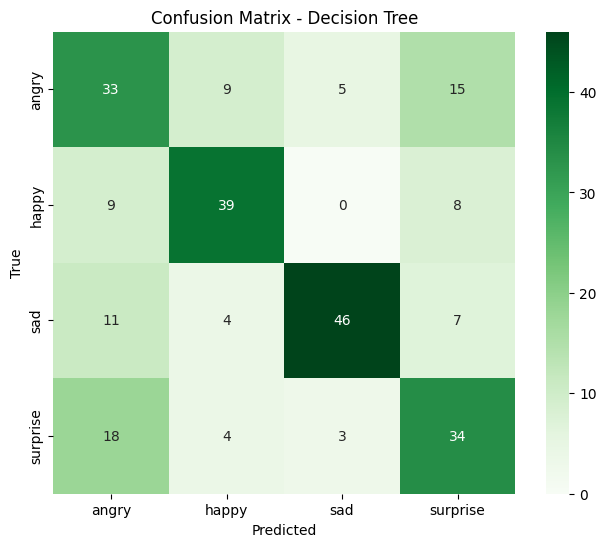

Classification Report:
              precision    recall  f1-score   support

       angry       0.46      0.53      0.50        62
       happy       0.70      0.70      0.70        56
         sad       0.85      0.68      0.75        68
    surprise       0.53      0.58      0.55        59

    accuracy                           0.62       245
   macro avg       0.64      0.62      0.62       245
weighted avg       0.64      0.62      0.63       245



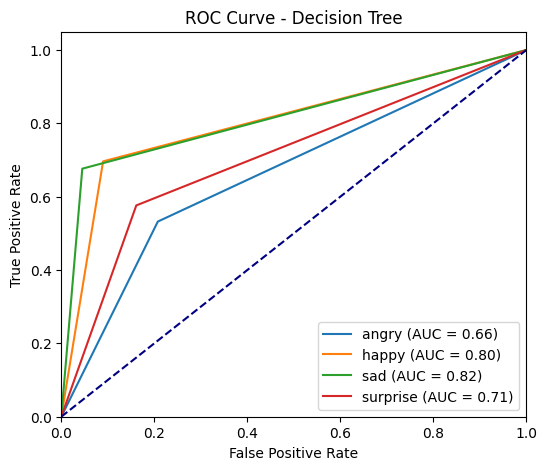




Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy: 0.8
Precision: 0.8377339154744842
Recall: 0.7974478063505337
F1 Score: 0.7984438311138528


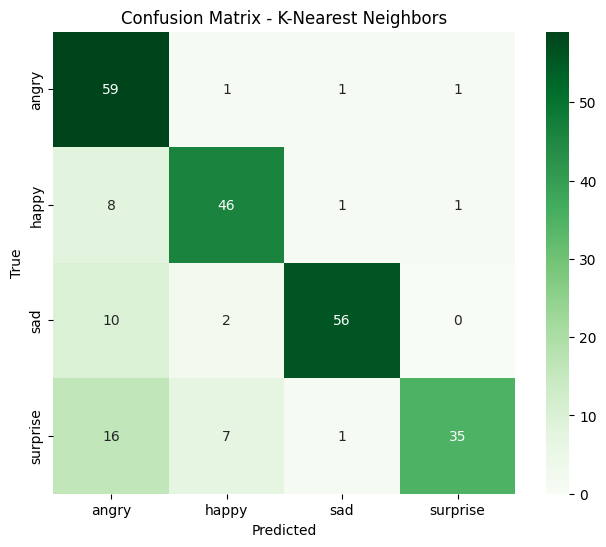

Classification Report:
              precision    recall  f1-score   support

       angry       0.63      0.95      0.76        62
       happy       0.82      0.82      0.82        56
         sad       0.95      0.82      0.88        68
    surprise       0.95      0.59      0.73        59

    accuracy                           0.80       245
   macro avg       0.84      0.80      0.80       245
weighted avg       0.84      0.80      0.80       245



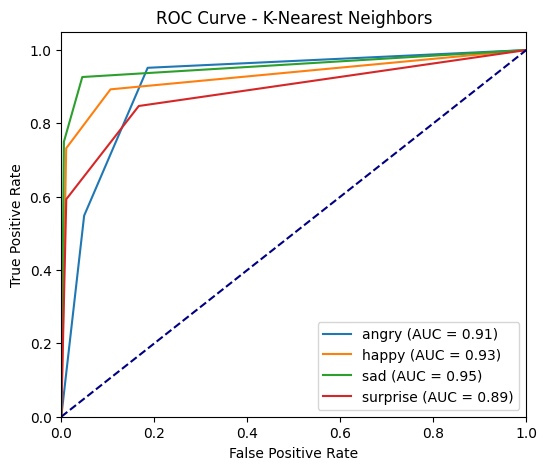




Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.8367346938775511
Precision: 0.835666795279592
Recall: 0.8357595703672392
F1 Score: 0.8344187312691249


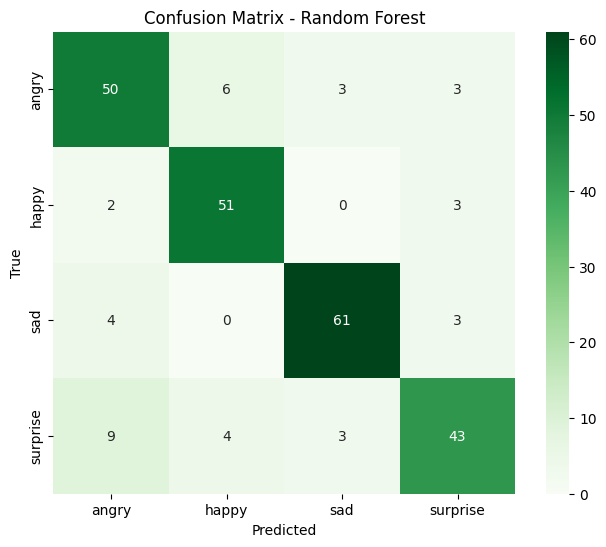

Classification Report:
              precision    recall  f1-score   support

       angry       0.77      0.81      0.79        62
       happy       0.84      0.91      0.87        56
         sad       0.91      0.90      0.90        68
    surprise       0.83      0.73      0.77        59

    accuracy                           0.84       245
   macro avg       0.84      0.84      0.83       245
weighted avg       0.84      0.84      0.84       245



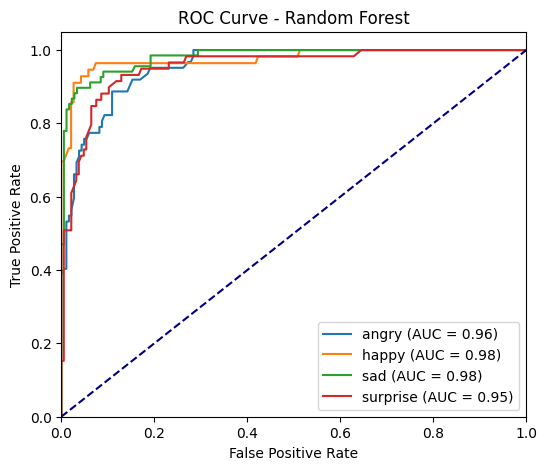




Training Multi-Layer Perceptron...
Evaluating Multi-Layer Perceptron...
Accuracy: 0.8204081632653061
Precision: 0.8211353733412556
Recall: 0.8182582149863773
F1 Score: 0.8189749363123976


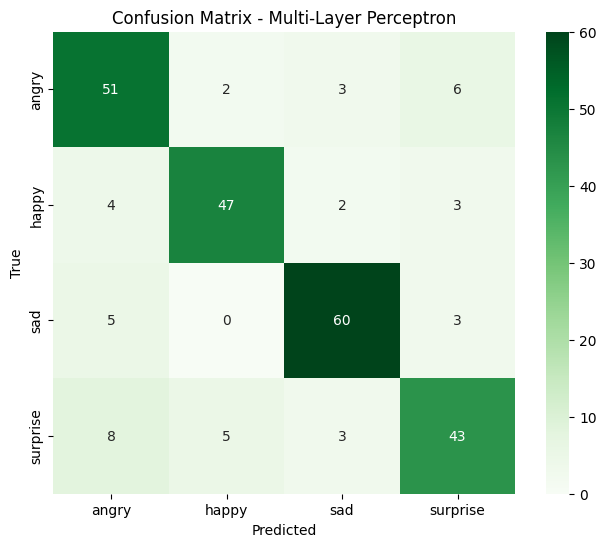

Classification Report:
              precision    recall  f1-score   support

       angry       0.75      0.82      0.78        62
       happy       0.87      0.84      0.85        56
         sad       0.88      0.88      0.88        68
    surprise       0.78      0.73      0.75        59

    accuracy                           0.82       245
   macro avg       0.82      0.82      0.82       245
weighted avg       0.82      0.82      0.82       245



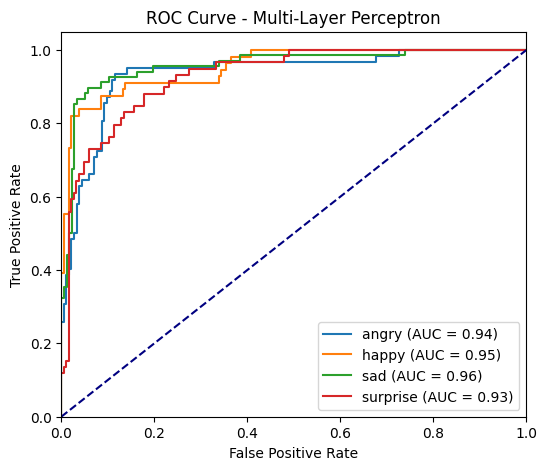




Training Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.6775510204081633
Precision: 0.6744889152438881
Recall: 0.6728558563939518
F1 Score: 0.6606769779183571


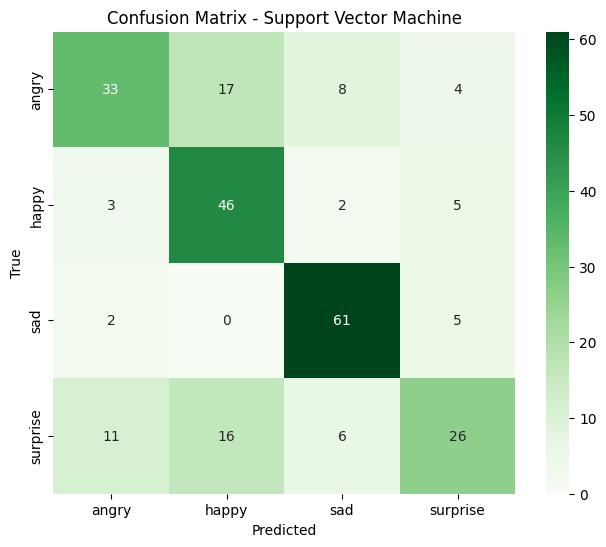

Classification Report:
              precision    recall  f1-score   support

       angry       0.67      0.53      0.59        62
       happy       0.58      0.82      0.68        56
         sad       0.79      0.90      0.84        68
    surprise       0.65      0.44      0.53        59

    accuracy                           0.68       245
   macro avg       0.67      0.67      0.66       245
weighted avg       0.68      0.68      0.67       245



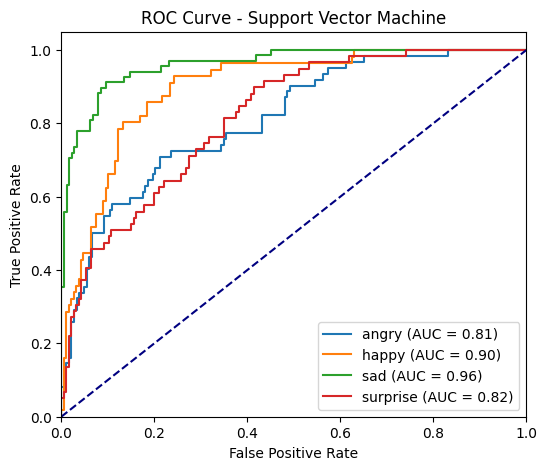

In [ ]:
model_comparison(X_train, y_train, X_test, y_test, emotions)

##**Ensemble Learning**

###**60-40**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Evaluating AdaBoost_XGBoost_GBM...
Accuracy: 0.7571428571428571
Precision: 0.7548023043280033
Recall: 0.7528678129441172
F1 Score: 0.7486087778830237


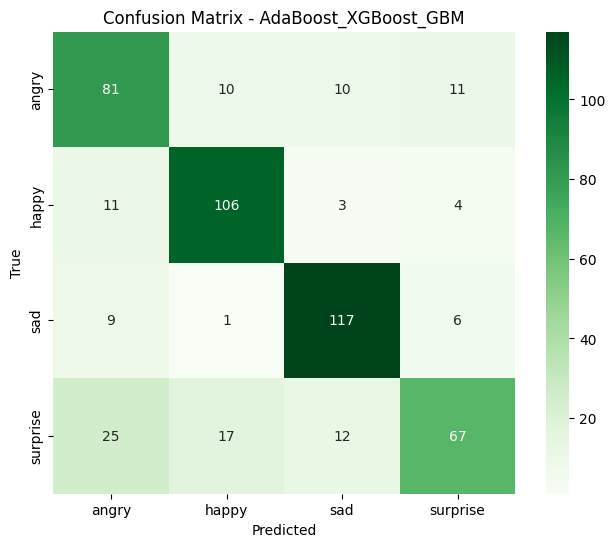

Classification Report:
              precision    recall  f1-score   support

       angry       0.64      0.72      0.68       112
       happy       0.79      0.85      0.82       124
         sad       0.82      0.88      0.85       133
    surprise       0.76      0.55      0.64       121

    accuracy                           0.76       490
   macro avg       0.75      0.75      0.75       490
weighted avg       0.76      0.76      0.75       490




Evaluating AdaBoost_GBM_RF...
Accuracy: 0.7673469387755102
Precision: 0.7692598654439002
Recall: 0.764421749438245
F1 Score: 0.761607950258923


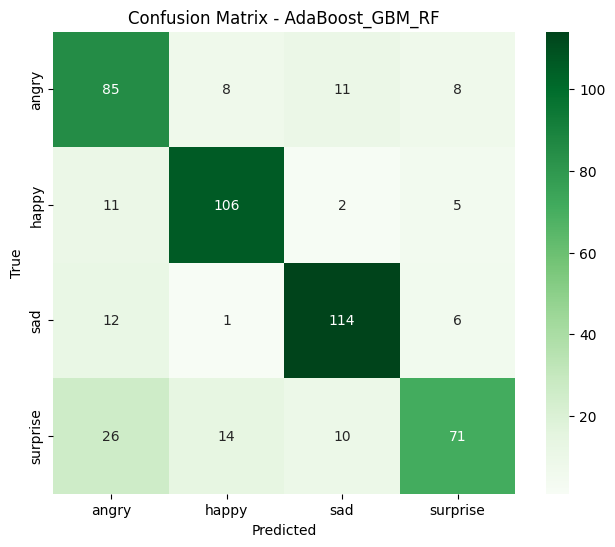

Classification Report:
              precision    recall  f1-score   support

       angry       0.63      0.76      0.69       112
       happy       0.82      0.85      0.84       124
         sad       0.83      0.86      0.84       133
    surprise       0.79      0.59      0.67       121

    accuracy                           0.77       490
   macro avg       0.77      0.76      0.76       490
weighted avg       0.77      0.77      0.77       490




Evaluating AdaBoost_XGB_RF...
Accuracy: 0.7755102040816326
Precision: 0.7749119723843383
Recall: 0.7714312837378704
F1 Score: 0.7672970076832795


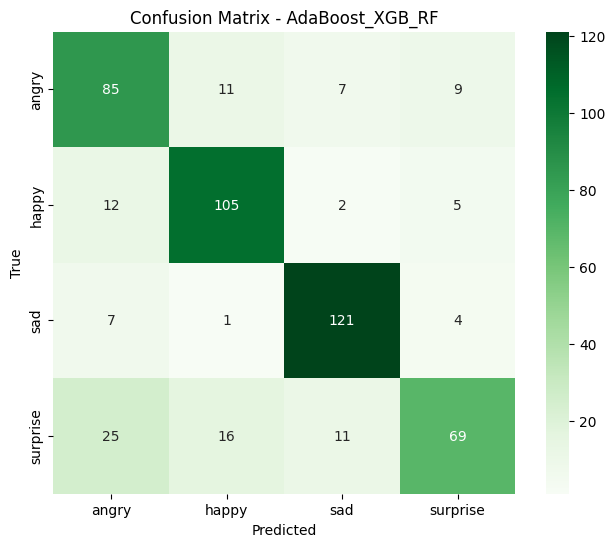

Classification Report:
              precision    recall  f1-score   support

       angry       0.66      0.76      0.71       112
       happy       0.79      0.85      0.82       124
         sad       0.86      0.91      0.88       133
    surprise       0.79      0.57      0.66       121

    accuracy                           0.78       490
   macro avg       0.77      0.77      0.77       490
weighted avg       0.78      0.78      0.77       490




Evaluating RF_DT_MLP...
Accuracy: 0.8285714285714286
Precision: 0.8345986626236112
Recall: 0.8277926324909849
F1 Score: 0.8277357016090743


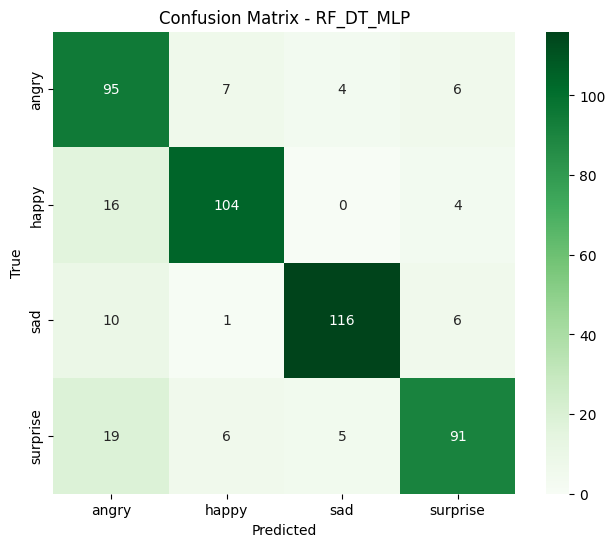

Classification Report:
              precision    recall  f1-score   support

       angry       0.68      0.85      0.75       112
       happy       0.88      0.84      0.86       124
         sad       0.93      0.87      0.90       133
    surprise       0.85      0.75      0.80       121

    accuracy                           0.83       490
   macro avg       0.83      0.83      0.83       490
weighted avg       0.84      0.83      0.83       490




Evaluating RF_DT_KNN...
Accuracy: 0.7918367346938775
Precision: 0.8098556409285962
Recall: 0.7925827548743893
F1 Score: 0.7919278617270102


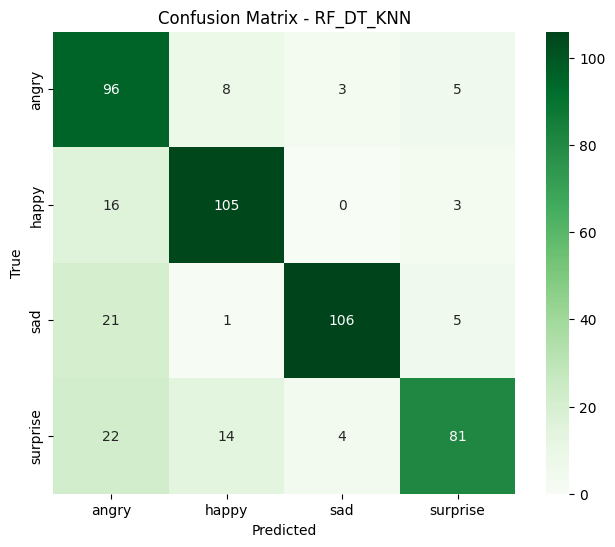

Classification Report:
              precision    recall  f1-score   support

       angry       0.62      0.86      0.72       112
       happy       0.82      0.85      0.83       124
         sad       0.94      0.80      0.86       133
    surprise       0.86      0.67      0.75       121

    accuracy                           0.79       490
   macro avg       0.81      0.79      0.79       490
weighted avg       0.82      0.79      0.80       490




Evaluating RF_SVM_MLP...
Accuracy: 0.7959183673469388
Precision: 0.7962090571997211
Recall: 0.7931497715897315
F1 Score: 0.7913395000839722


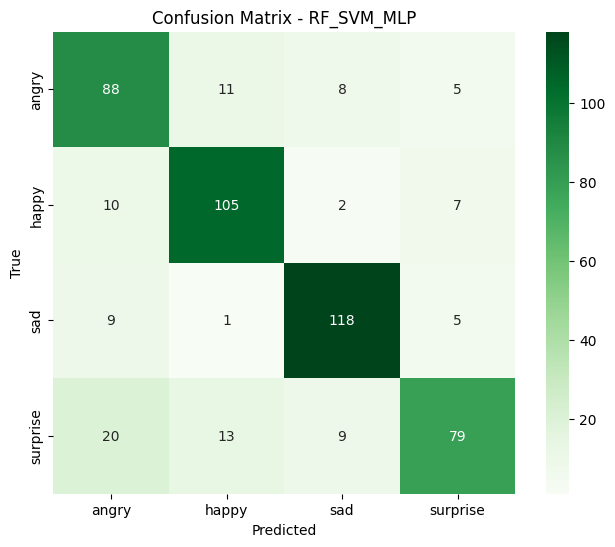

Classification Report:
              precision    recall  f1-score   support

       angry       0.69      0.79      0.74       112
       happy       0.81      0.85      0.83       124
         sad       0.86      0.89      0.87       133
    surprise       0.82      0.65      0.73       121

    accuracy                           0.80       490
   macro avg       0.80      0.79      0.79       490
weighted avg       0.80      0.80      0.79       490




Evaluating DT_MLP_KNN...
Accuracy: 0.7836734693877551
Precision: 0.8098890795830155
Recall: 0.7849390851662614
F1 Score: 0.7842341687107203


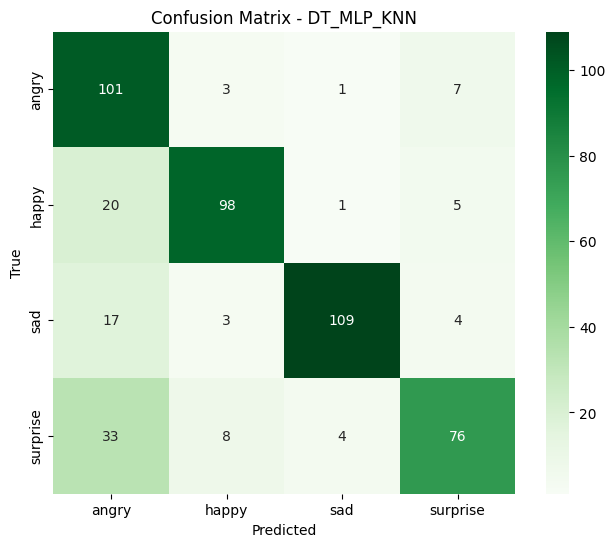

Classification Report:
              precision    recall  f1-score   support

       angry       0.59      0.90      0.71       112
       happy       0.88      0.79      0.83       124
         sad       0.95      0.82      0.88       133
    surprise       0.83      0.63      0.71       121

    accuracy                           0.78       490
   macro avg       0.81      0.78      0.78       490
weighted avg       0.82      0.78      0.79       490






In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ensemble_models = [
    ('AdaBoost_XGBoost_GBM', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('XGBoost', xgb.XGBClassifier()), ('GBM', GradientBoostingClassifier())])),
    ('AdaBoost_GBM_RF', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), ('RF', RandomForestClassifier(n_estimators=500))])),
    ('AdaBoost_XGB_RF', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('XGBoost', xgb.XGBClassifier()), ('RF', RandomForestClassifier(n_estimators=500))])),
    ('RF_DT_MLP', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('DT', DecisionTreeClassifier()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400))])),
    ('RF_DT_KNN', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('DT', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier(n_neighbors=2))])),
    ('RF_SVM_MLP', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('SVM', SVC()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400))])),
    ('DT_MLP_KNN', VotingClassifier(estimators=[('DT', DecisionTreeClassifier()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)), ('KNN', KNeighborsClassifier(n_neighbors=2))]))
]

if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

for name, model in ensemble_models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=np.unique(emotions)))

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(6, 5))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

    print("\n\n")


###**70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Evaluating AdaBoost_XGBoost_GBM...
Accuracy: 0.7663043478260869
Precision: 0.7584644795509281
Recall: 0.7613113671811851
F1 Score: 0.7579296840499766


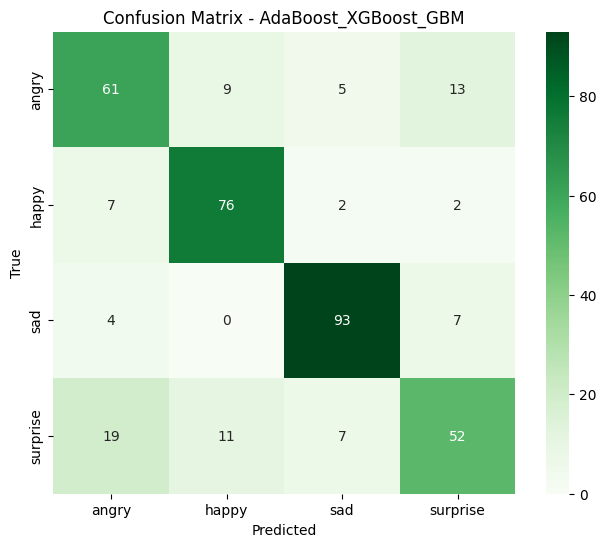

Classification Report:
              precision    recall  f1-score   support

       angry       0.67      0.69      0.68        88
       happy       0.79      0.87      0.83        87
         sad       0.87      0.89      0.88       104
    surprise       0.70      0.58      0.64        89

    accuracy                           0.77       368
   macro avg       0.76      0.76      0.76       368
weighted avg       0.76      0.77      0.76       368




Evaluating AdaBoost_GBM_RF...
Accuracy: 0.7853260869565217
Precision: 0.7799773755656109
Recall: 0.7817008358101927
F1 Score: 0.7772877965511463


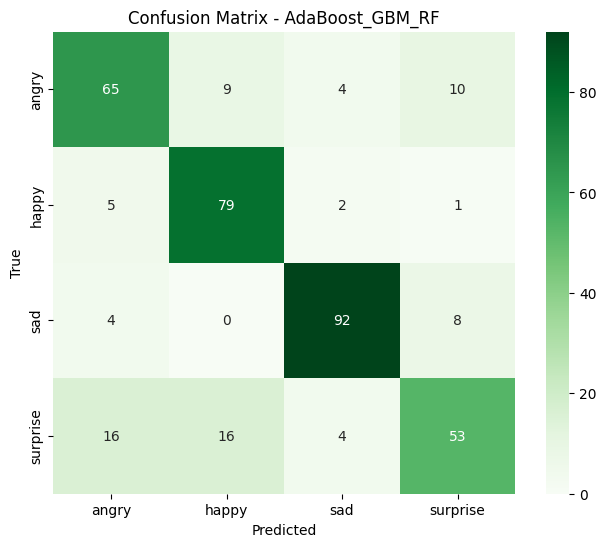

Classification Report:
              precision    recall  f1-score   support

       angry       0.72      0.74      0.73        88
       happy       0.76      0.91      0.83        87
         sad       0.90      0.88      0.89       104
    surprise       0.74      0.60      0.66        89

    accuracy                           0.79       368
   macro avg       0.78      0.78      0.78       368
weighted avg       0.79      0.79      0.78       368




Evaluating AdaBoost_XGB_RF...
Accuracy: 0.7989130434782609
Precision: 0.7994694541569541
Recall: 0.7939945926796954
F1 Score: 0.7911497810608088


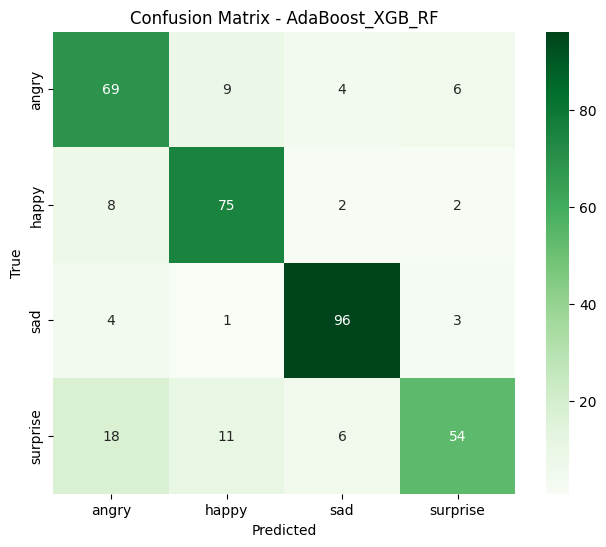

Classification Report:
              precision    recall  f1-score   support

       angry       0.70      0.78      0.74        88
       happy       0.78      0.86      0.82        87
         sad       0.89      0.92      0.91       104
    surprise       0.83      0.61      0.70        89

    accuracy                           0.80       368
   macro avg       0.80      0.79      0.79       368
weighted avg       0.80      0.80      0.80       368




Evaluating RF_DT_MLP...
Accuracy: 0.7934782608695652
Precision: 0.8023676235777069
Recall: 0.7883935772351116
F1 Score: 0.7891865722193299


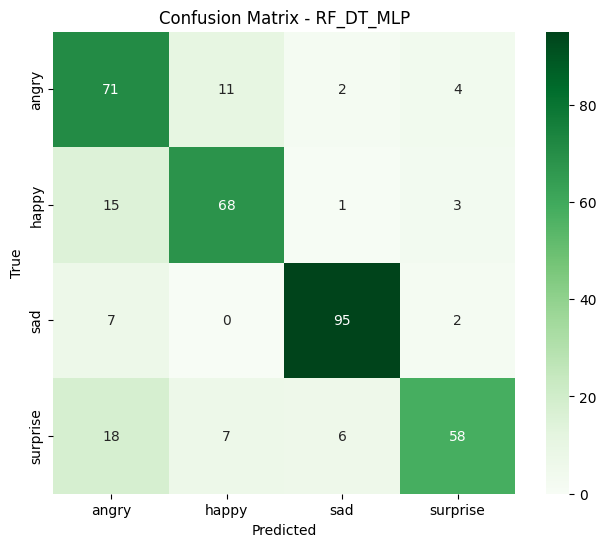

Classification Report:
              precision    recall  f1-score   support

       angry       0.64      0.81      0.71        88
       happy       0.79      0.78      0.79        87
         sad       0.91      0.91      0.91       104
    surprise       0.87      0.65      0.74        89

    accuracy                           0.79       368
   macro avg       0.80      0.79      0.79       368
weighted avg       0.81      0.79      0.79       368




Evaluating RF_DT_KNN...
Accuracy: 0.7907608695652174
Precision: 0.8080086032388664
Recall: 0.788530572165791
F1 Score: 0.7865830610635693


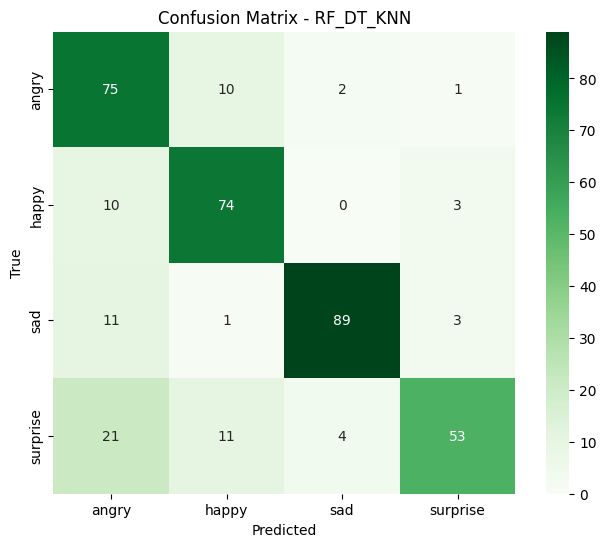

Classification Report:
              precision    recall  f1-score   support

       angry       0.64      0.85      0.73        88
       happy       0.77      0.85      0.81        87
         sad       0.94      0.86      0.89       104
    surprise       0.88      0.60      0.71        89

    accuracy                           0.79       368
   macro avg       0.81      0.79      0.79       368
weighted avg       0.81      0.79      0.79       368




Evaluating RF_SVM_MLP...
Accuracy: 0.8152173913043478
Precision: 0.8143478086950238
Recall: 0.8111259865667071
F1 Score: 0.8106354688922413


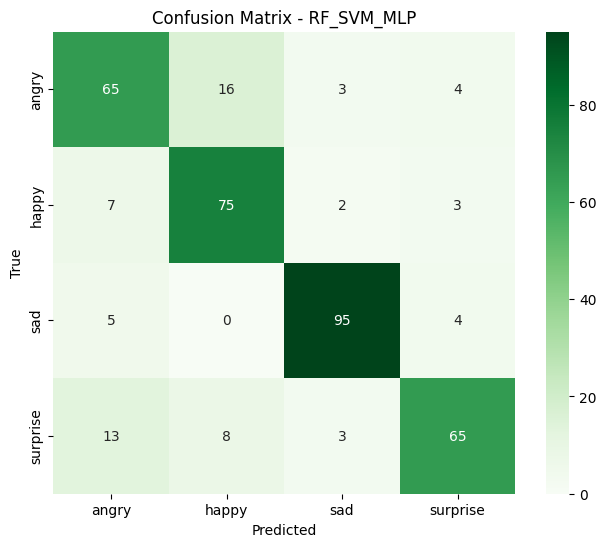

Classification Report:
              precision    recall  f1-score   support

       angry       0.72      0.74      0.73        88
       happy       0.76      0.86      0.81        87
         sad       0.92      0.91      0.92       104
    surprise       0.86      0.73      0.79        89

    accuracy                           0.82       368
   macro avg       0.81      0.81      0.81       368
weighted avg       0.82      0.82      0.82       368




Evaluating DT_MLP_KNN...
Accuracy: 0.7690217391304348
Precision: 0.8030211630048357
Recall: 0.7683581674040798
F1 Score: 0.766904788450437


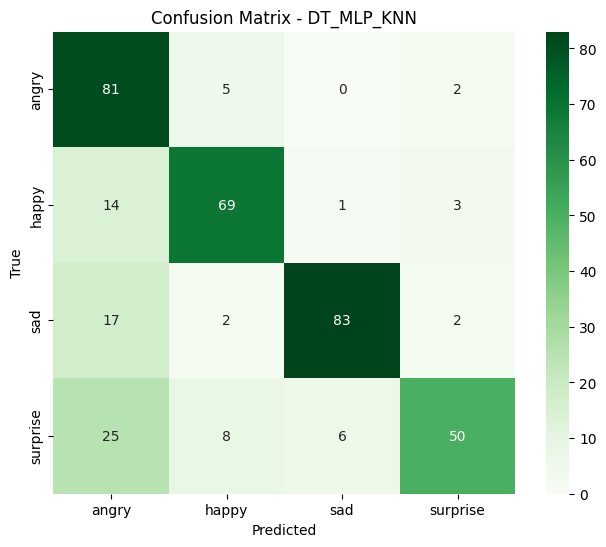

Classification Report:
              precision    recall  f1-score   support

       angry       0.59      0.92      0.72        88
       happy       0.82      0.79      0.81        87
         sad       0.92      0.80      0.86       104
    surprise       0.88      0.56      0.68        89

    accuracy                           0.77       368
   macro avg       0.80      0.77      0.77       368
weighted avg       0.81      0.77      0.77       368






In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ensemble_models = [
    ('AdaBoost_XGBoost_GBM', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('XGBoost', xgb.XGBClassifier()), ('GBM', GradientBoostingClassifier())])),
    ('AdaBoost_GBM_RF', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), ('RF', RandomForestClassifier(n_estimators=500))])),
    ('AdaBoost_XGB_RF', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('XGBoost', xgb.XGBClassifier()), ('RF', RandomForestClassifier(n_estimators=500))])),
    ('RF_DT_MLP', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('DT', DecisionTreeClassifier()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400))])),
    ('RF_DT_KNN', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('DT', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier(n_neighbors=2))])),
    ('RF_SVM_MLP', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('SVM', SVC()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400))])),
    ('DT_MLP_KNN', VotingClassifier(estimators=[('DT', DecisionTreeClassifier()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)), ('KNN', KNeighborsClassifier(n_neighbors=2))]))
]

if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

for name, model in ensemble_models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=np.unique(emotions)))

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(6, 5))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

    print("\n\n")


###**80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Evaluating AdaBoost_XGBoost_GBM...
Accuracy: 0.7877551020408163
Precision: 0.7856399853068857
Recall: 0.784966385405994
F1 Score: 0.7806035449656125


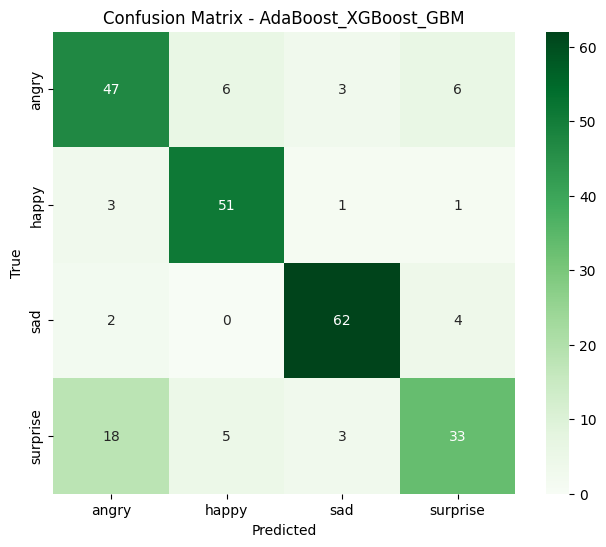

Classification Report:
              precision    recall  f1-score   support

       angry       0.67      0.76      0.71        62
       happy       0.82      0.91      0.86        56
         sad       0.90      0.91      0.91        68
    surprise       0.75      0.56      0.64        59

    accuracy                           0.79       245
   macro avg       0.79      0.78      0.78       245
weighted avg       0.79      0.79      0.78       245




Evaluating AdaBoost_GBM_RF...
Accuracy: 0.7836734693877551
Precision: 0.782090387258083
Recall: 0.78190500503099
F1 Score: 0.7776135250848307


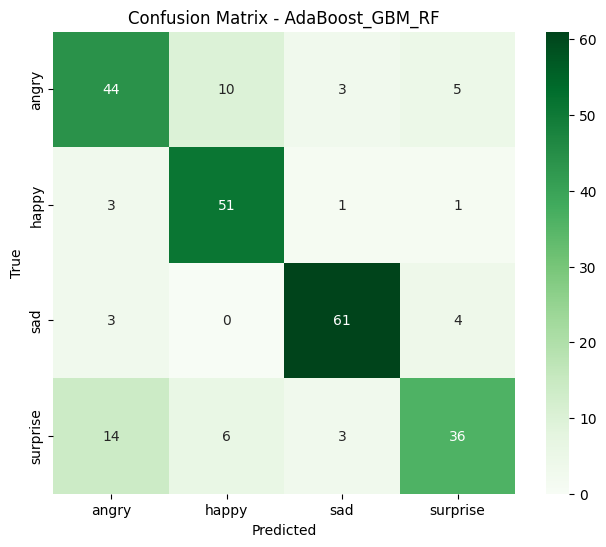

Classification Report:
              precision    recall  f1-score   support

       angry       0.69      0.71      0.70        62
       happy       0.76      0.91      0.83        56
         sad       0.90      0.90      0.90        68
    surprise       0.78      0.61      0.69        59

    accuracy                           0.78       245
   macro avg       0.78      0.78      0.78       245
weighted avg       0.79      0.78      0.78       245




Evaluating AdaBoost_XGB_RF...
Accuracy: 0.8448979591836735
Precision: 0.842007034280874
Recall: 0.8435445391934795
F1 Score: 0.8418041549953315


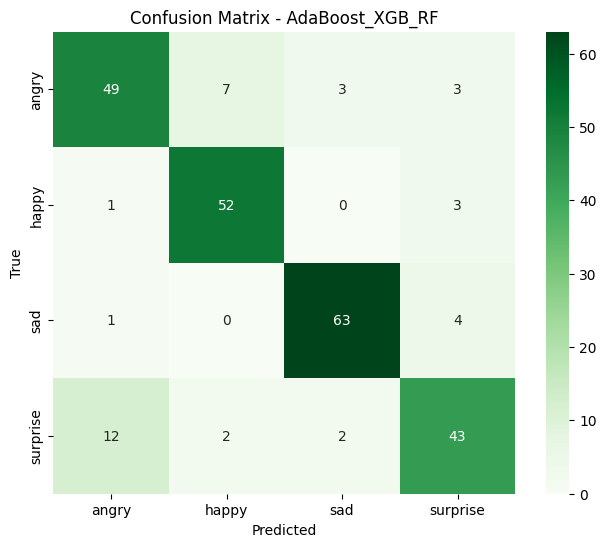

Classification Report:
              precision    recall  f1-score   support

       angry       0.78      0.79      0.78        62
       happy       0.85      0.93      0.89        56
         sad       0.93      0.93      0.93        68
    surprise       0.81      0.73      0.77        59

    accuracy                           0.84       245
   macro avg       0.84      0.84      0.84       245
weighted avg       0.84      0.84      0.84       245




Evaluating RF_DT_MLP...
Accuracy: 0.8163265306122449
Precision: 0.8258978803151735
Recall: 0.8142479244294765
F1 Score: 0.8163775495011192


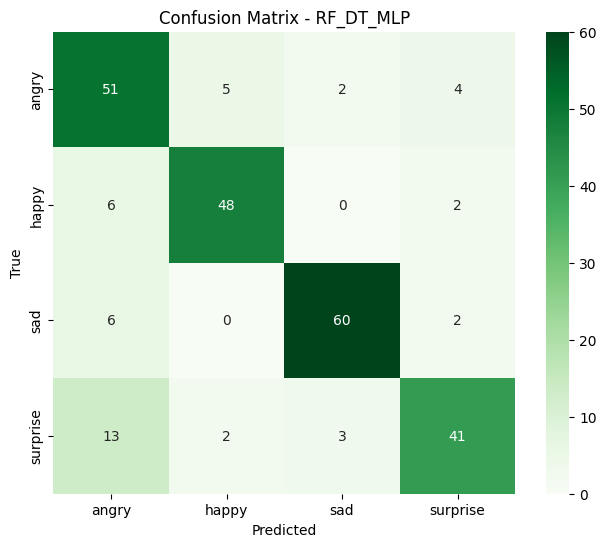

Classification Report:
              precision    recall  f1-score   support

       angry       0.67      0.82      0.74        62
       happy       0.87      0.86      0.86        56
         sad       0.92      0.88      0.90        68
    surprise       0.84      0.69      0.76        59

    accuracy                           0.82       245
   macro avg       0.83      0.81      0.82       245
weighted avg       0.83      0.82      0.82       245




Evaluating RF_DT_KNN...
Accuracy: 0.8122448979591836
Precision: 0.8395246170825594
Recall: 0.8118658138487762
F1 Score: 0.814917853097159


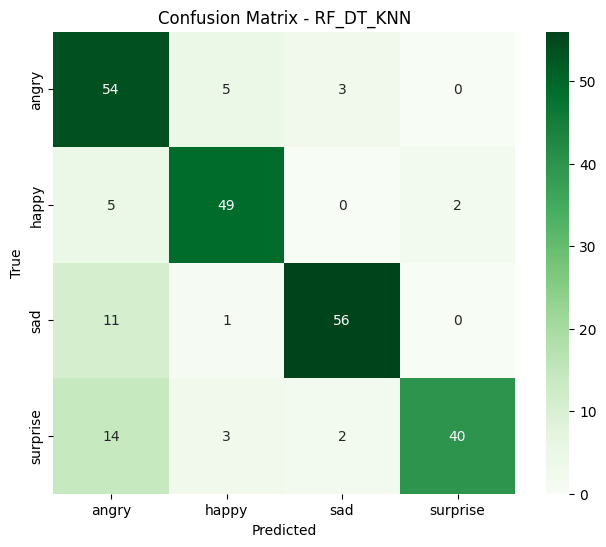

Classification Report:
              precision    recall  f1-score   support

       angry       0.64      0.87      0.74        62
       happy       0.84      0.88      0.86        56
         sad       0.92      0.82      0.87        68
    surprise       0.95      0.68      0.79        59

    accuracy                           0.81       245
   macro avg       0.84      0.81      0.81       245
weighted avg       0.84      0.81      0.82       245




Evaluating RF_SVM_MLP...
Accuracy: 0.8448979591836735
Precision: 0.8461839481555333
Recall: 0.8437495692645565
F1 Score: 0.841477036237


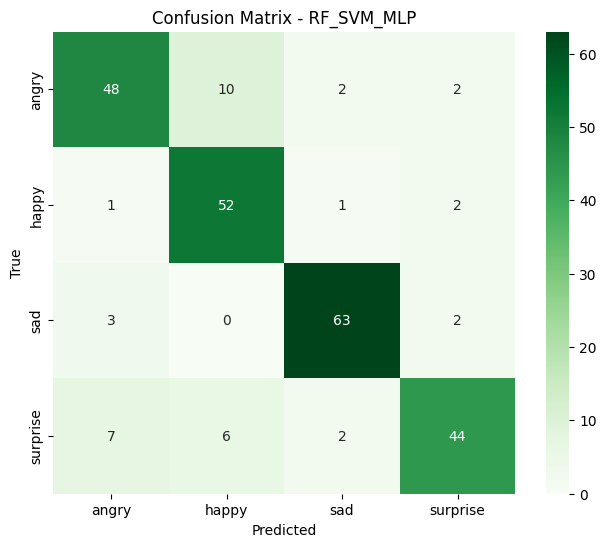

Classification Report:
              precision    recall  f1-score   support

       angry       0.81      0.77      0.79        62
       happy       0.76      0.93      0.84        56
         sad       0.93      0.93      0.93        68
    surprise       0.88      0.75      0.81        59

    accuracy                           0.84       245
   macro avg       0.85      0.84      0.84       245
weighted avg       0.85      0.84      0.84       245




Evaluating DT_MLP_KNN...
Accuracy: 0.8408163265306122
Precision: 0.8731840712604965
Recall: 0.8386990526117499
F1 Score: 0.8442195497659073


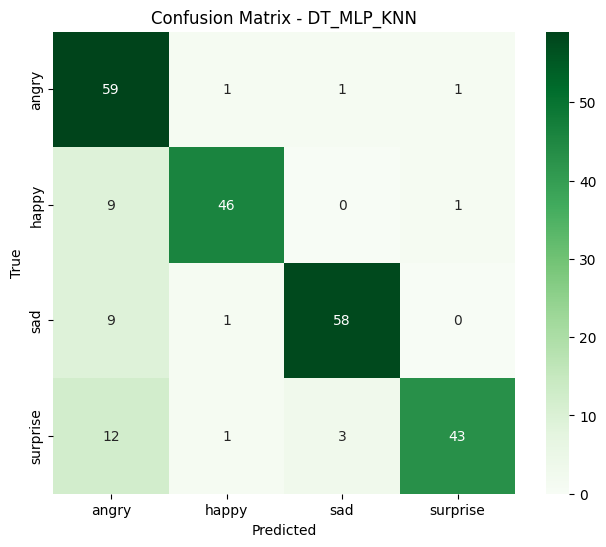

Classification Report:
              precision    recall  f1-score   support

       angry       0.66      0.95      0.78        62
       happy       0.94      0.82      0.88        56
         sad       0.94      0.85      0.89        68
    surprise       0.96      0.73      0.83        59

    accuracy                           0.84       245
   macro avg       0.87      0.84      0.84       245
weighted avg       0.87      0.84      0.84       245






In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ensemble_models = [
    ('AdaBoost_XGBoost_GBM', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('XGBoost', xgb.XGBClassifier()), ('GBM', GradientBoostingClassifier())])),
    ('AdaBoost_GBM_RF', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('GBM', GradientBoostingClassifier()), ('RF', RandomForestClassifier(n_estimators=500))])),
    ('AdaBoost_XGB_RF', VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), ('XGBoost', xgb.XGBClassifier()), ('RF', RandomForestClassifier(n_estimators=500))])),
    ('RF_DT_MLP', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('DT', DecisionTreeClassifier()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400))])),
    ('RF_DT_KNN', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('DT', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier(n_neighbors=2))])),
    ('RF_SVM_MLP', VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=500)), ('SVM', SVC()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400))])),
    ('DT_MLP_KNN', VotingClassifier(estimators=[('DT', DecisionTreeClassifier()), ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)), ('KNN', KNeighborsClassifier(n_neighbors=2))]))
]

if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

for name, model in ensemble_models:
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=np.unique(emotions)))

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(6, 5))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

    print("\n\n")


##**Stacking Classifier**

###**60-40**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Training Stacking Classifier...
Evaluating Stacking Classifier...
Accuracy: 0.8367346938775511
Precision: 0.8348964394554699
Recall: 0.834713374679033
F1 Score: 0.8342869504773127


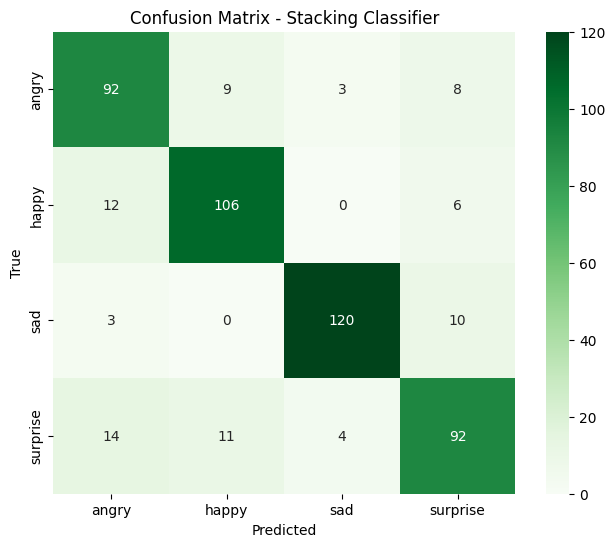

Classification Report:
              precision    recall  f1-score   support

       angry       0.76      0.82      0.79       112
       happy       0.84      0.85      0.85       124
         sad       0.94      0.90      0.92       133
    surprise       0.79      0.76      0.78       121

    accuracy                           0.84       490
   macro avg       0.83      0.83      0.83       490
weighted avg       0.84      0.84      0.84       490



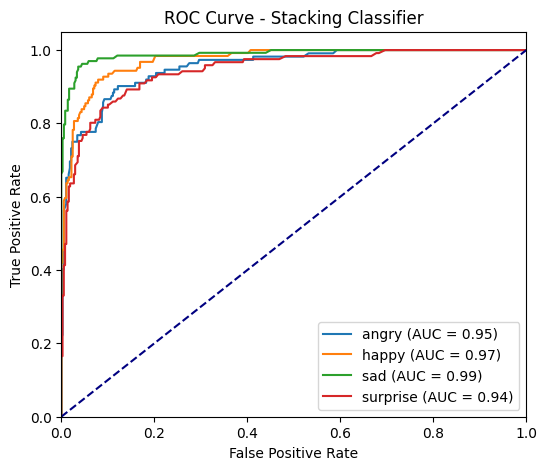

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_models = [
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, learning_rate=1.0)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)),
    ('GBM', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
    ('RF', RandomForestClassifier(n_estimators=500)),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('SVM', SVC()),
    ('LR', LogisticRegression(max_iter=10000)),
    ('GNB', GaussianNB())
]

estimators = [(name, model) for name, model in base_models]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=500))

print("Training Stacking Classifier...")
stacking_model.fit(X_train, y_train)

print("Evaluating Stacking Classifier...")
y_pred_stacking = stacking_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking, average='macro'))
print("Recall:", recall_score(y_test, y_pred_stacking, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_stacking, average='macro'))

cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Stacking Classifier')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_stacking, target_names=np.unique(emotions)))

if hasattr(stacking_model, "predict_proba"):
    y_pred_proba_stacking = stacking_model.predict_proba(X_test)
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba_stacking[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Stacking Classifier')
    plt.legend(loc="lower right")
    plt.show()


###**70-30**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Training Stacking Classifier...
Evaluating Stacking Classifier...
Accuracy: 0.9061224489795918
Precision: 0.9079737466834241
Recall: 0.9060024706985035
F1 Score: 0.9062176676550375


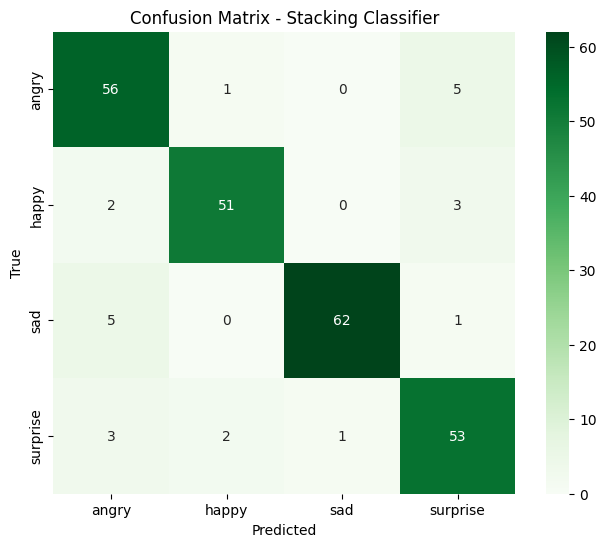

Classification Report:
              precision    recall  f1-score   support

       angry       0.85      0.90      0.88        62
       happy       0.94      0.91      0.93        56
         sad       0.98      0.91      0.95        68
    surprise       0.85      0.90      0.88        59

    accuracy                           0.91       245
   macro avg       0.91      0.91      0.91       245
weighted avg       0.91      0.91      0.91       245



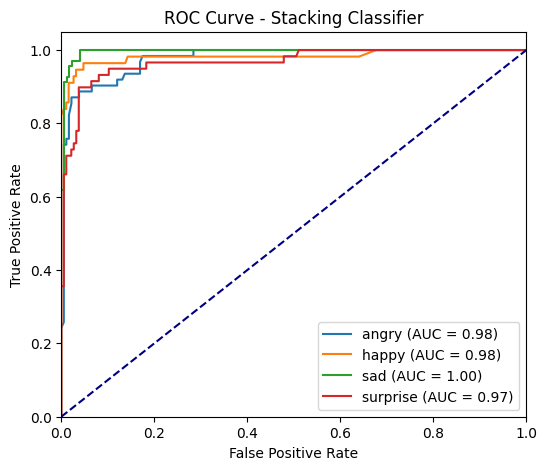

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_models = [
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, learning_rate=1.0)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)),
    ('GBM', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
    ('RF', RandomForestClassifier(n_estimators=500)),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('SVM', SVC()),
    ('LR', LogisticRegression(max_iter=10000)),
    ('GNB', GaussianNB())
]

estimators = [(name, model) for name, model in base_models]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=500))

print("Training Stacking Classifier...")
stacking_model.fit(X_train, y_train)

print("Evaluating Stacking Classifier...")
y_pred_stacking = stacking_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking, average='macro'))
print("Recall:", recall_score(y_test, y_pred_stacking, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_stacking, average='macro'))

cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Stacking Classifier')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_stacking, target_names=np.unique(emotions)))

if hasattr(stacking_model, "predict_proba"):
    y_pred_proba_stacking = stacking_model.predict_proba(X_test)
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba_stacking[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Stacking Classifier')
    plt.legend(loc="lower right")
    plt.show()


###**80-20**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Training Stacking Classifier...
Evaluating Stacking Classifier...
Accuracy: 0.9061224489795918
Precision: 0.9064316134539246
Recall: 0.9057431679615531
F1 Score: 0.905027873876584


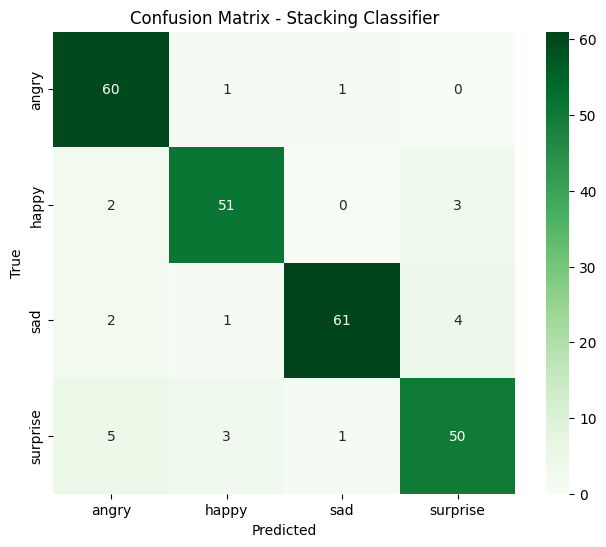

Classification Report:
              precision    recall  f1-score   support

       angry       0.87      0.97      0.92        62
       happy       0.91      0.91      0.91        56
         sad       0.97      0.90      0.93        68
    surprise       0.88      0.85      0.86        59

    accuracy                           0.91       245
   macro avg       0.91      0.91      0.91       245
weighted avg       0.91      0.91      0.91       245



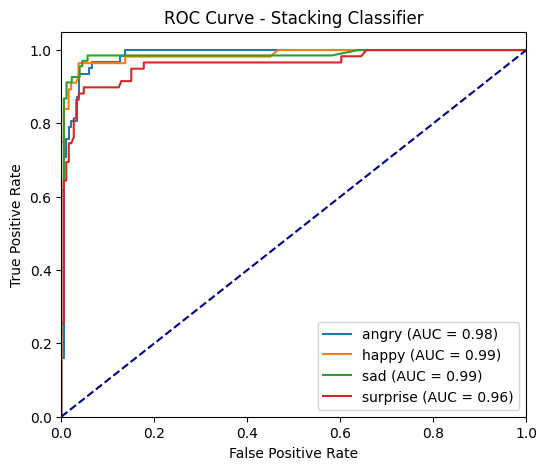

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

base_models = [
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, learning_rate=1.0)),
    ('XGBoost', xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)),
    ('GBM', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
    ('RF', RandomForestClassifier(n_estimators=500)),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('SVM', SVC()),
    ('LR', LogisticRegression(max_iter=10000)),
    ('GNB', GaussianNB())
]

estimators = [(name, model) for name, model in base_models]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=500))

print("Training Stacking Classifier...")
stacking_model.fit(X_train, y_train)

print("Evaluating Stacking Classifier...")
y_pred_stacking = stacking_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking, average='macro'))
print("Recall:", recall_score(y_test, y_pred_stacking, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_stacking, average='macro'))

cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', square=True, xticklabels=np.unique(emotions), yticklabels=np.unique(emotions))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Stacking Classifier')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_stacking, target_names=np.unique(emotions)))

if hasattr(stacking_model, "predict_proba"):
    y_pred_proba_stacking = stacking_model.predict_proba(X_test)
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba_stacking[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{emotions[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Stacking Classifier')
    plt.legend(loc="lower right")
    plt.show()
